<br><br>
<img src='https://www.riotgames.com/darkroom/1000/fab68f870f6da8998086165e608ea621:659056e32b0511d7f8525348809721ff/tft.jpg' width="700px">  
<br>

# Team Fight Tactics Challengers games analysis

Put your team-building skills to the test in Teamfight Tactics, the ultimate PvP strategy game from the studio behind League of Legends.

The game centers around eight players who construct teams to fight one another and be the last player standing. The battlefield consists of hexagons, where players can strategically place units on the hexagons on their side of the game board between rounds. During each round, a short battle automatically commences, with two players matched randomly for that round, or else paired against computer-controlled enemies. In the rounds against computer-controlled enemies, each enemy has a chance to drop gold, units, or items that the player can use. Health lost from losing a round is calculated with a combination of set damage per round and how many units an opponent had still alive.


**Set**
Dragonlands 	June 8, 2022 	Dragons

## **Objective** of this notebook to analysis the best strategy to use for Team Fight Tactics.

8 players FFA in one game.

**Target Label**: *placement*
1 is best. Lower is better.

In [332]:
# %pip install git+https://github.com/tensorflow/docs

import requests
import os.path
import asyncio
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from riotwatcher import TftWatcher, ApiError

from utils.configuration import settings
from utils.utils import *
from tft.api import *

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(10, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'


In [333]:
API_KEY = settings.api_key
ASSETS_DIR = settings.assets_dir
SERVER = 'na1'  # euw1 na1 kr oc1
LEAGUE='challengers'
MAX_COUNT = settings.max_count
LATEST_RELEASE = '12.12.450.4196' # '12.12.450.4196'

TARGETNAME = 'placement'

In [334]:
raw_df = pd.read_pickle(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_matches.pickle'))

In [335]:
raw_df

,match_id,placement,augment0,augment1,augment2,Set7_Bruiser,Set7_Cavalier,Set7_Dragonmancer,Set7_Evoker,Set7_Guild,...,TFT7_Senna_item1,TFT7_Senna_item2,TFT7_Skarner_item2,TFT7_Vladimir_item0,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Vladimir_item1,TFT7_Vladimir_item2
0,NA1_4357324934,3,TFT7_Augment_PandorasBench,TFT6_Augment_ItemGrabBag1,TFT6_Augment_JeweledLotus,0.0,3.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NA1_4357324934,5,TFT6_Augment_TrueTwos,TFT6_Augment_SecondWind1,TFT6_Augment_CelestialBlessing2,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NA1_4357324934,7,TFT6_Augment_RichGetRicher,TFT6_Augment_ThrillOfTheHunt1,TFT6_Augment_PortableForge,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NA1_4357324934,4,TFT7_Augment_BruiserPersonalTraining,TFT6_Augment_SecondWind1,TFT6_Augment_PortableForge,1.0,1.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NA1_4357324934,2,TFT6_Augment_PortableForge,TFT7_Augment_JadeEmblem,TFT7_Augment_PandorasBench,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,NA1_4355410655,1,TFT7_Augment_JadeEmblem,TFT6_Augment_ThrillOfTheHunt1,TFT6_Augment_ComponentGrabBag,NaN,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11140,NA1_4355410655,2,TFT6_Augment_CelestialBlessing1,TFT6_Augment_Weakspot,TFT7_Augment_AssassinEmblem,2.0,NaN,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11141,NA1_4355410655,6,TFT6_Augment_TinyTitans,TFT7_Augment_WarriorTrait,TFT6_Augment_Ascension,1.0,1.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11142,NA1_4355410655,3,TFT6_Augment_Electrocharge1,TFT7_Augment_BestFriends1,TFT6_Augment_ComponentGrabBag,NaN,0.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
 
    return df

In [337]:
raw_df = reduce_mem_usage(raw_df)

Mem. usage decreased to 18.93 Mb (16.6% reduction)


In [338]:
raw_df[raw_df['match_id'].duplicated()]

,match_id,placement,augment0,augment1,augment2,Set7_Bruiser,Set7_Cavalier,Set7_Dragonmancer,Set7_Evoker,Set7_Guild,...,TFT7_Senna_item1,TFT7_Senna_item2,TFT7_Skarner_item2,TFT7_Vladimir_item0,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Vladimir_item1,TFT7_Vladimir_item2
1,NA1_4357324934,5,TFT6_Augment_TrueTwos,TFT6_Augment_SecondWind1,TFT6_Augment_CelestialBlessing2,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NA1_4357324934,7,TFT6_Augment_RichGetRicher,TFT6_Augment_ThrillOfTheHunt1,TFT6_Augment_PortableForge,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NA1_4357324934,4,TFT7_Augment_BruiserPersonalTraining,TFT6_Augment_SecondWind1,TFT6_Augment_PortableForge,1.0,1.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NA1_4357324934,2,TFT6_Augment_PortableForge,TFT7_Augment_JadeEmblem,TFT7_Augment_PandorasBench,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NA1_4357324934,8,TFT7_Augment_UrfsGrabBag1,TFT7_Augment_AxiomArc1,TFT7_Augment_AxiomArc2,1.0,NaN,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,NA1_4355410655,1,TFT7_Augment_JadeEmblem,TFT6_Augment_ThrillOfTheHunt1,TFT6_Augment_ComponentGrabBag,NaN,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11140,NA1_4355410655,2,TFT6_Augment_CelestialBlessing1,TFT6_Augment_Weakspot,TFT7_Augment_AssassinEmblem,2.0,NaN,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11141,NA1_4355410655,6,TFT6_Augment_TinyTitans,TFT7_Augment_WarriorTrait,TFT6_Augment_Ascension,1.0,1.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11142,NA1_4355410655,3,TFT6_Augment_Electrocharge1,TFT7_Augment_BestFriends1,TFT6_Augment_ComponentGrabBag,NaN,0.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
def check_NA(df):
    missing_val = df.isnull().sum()
    print(missing_val[missing_val > 0])

In [340]:
# Check NA
check_NA(raw_df)

augment1                      3
augment2                     32
Set7_Bruiser               4497
Set7_Cavalier              7189
Set7_Dragonmancer          5289
                          ...  
TFT7_AurelionSol_item0    11100
TFT7_AurelionSol_item1    11102
TFT7_AurelionSol_item2    11105
TFT7_Vladimir_item1       11105
TFT7_Vladimir_item2       11119
Length: 264, dtype: int64


In [341]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("object"):
        df[name] = df[name].fillna("None")
    return df

In [342]:
raw_df = impute(raw_df)

In [343]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

In [344]:
def check_categorical_cols(df):
    print('Values along with Count in the Categorical Columns','\n')
    for i in categorical_cols:
        print(i)
        print(df[i].value_counts(),'\n')  

In [345]:
check_categorical_cols(raw_df)

Values along with Count in the Categorical Columns 

match_id
NA1_4357324934    8
NA1_4354254542    8
NA1_4355865761    8
NA1_4355752624    8
NA1_4355563801    8
                 ..
NA1_4355463248    8
NA1_4355211592    8
NA1_4355085317    8
NA1_4354958870    8
NA1_4355410655    8
Name: match_id, Length: 1393, dtype: int64 

augment0
TFT6_Augment_PortableForge     508
TFT7_Augment_UrfsGrabBag1      342
TFT6_Augment_SecondWind2       340
TFT6_Augment_SecondWind1       297
TFT6_Augment_ItemGrabBag1      277
                              ... 
TFT6_Augment_FuturePeepers2      2
TFT7_Augment_WarriorEmblem       2
TFT6_Augment_Distancing3         2
TFT6_Augment_Diversify2          2
TFT7_Augment_AstralTrait2        1
Name: augment0, Length: 186, dtype: int64 

augment1
TFT6_Augment_SecondWind1                 520
TFT6_Augment_Weakspot                    458
TFT6_Augment_TinyTitans                  417
TFT6_Augment_ThrillOfTheHunt1            332
TFT6_Augment_PortableForge               327
 

In [346]:
# raw_df.arrival_day = pd.to_numeric(raw_df.arrival_day, errors='coerce').astype('int64')
# raw_df[TARGETNAME] = raw_df[TARGETNAME].astype(bool)

In [347]:
raw_df.describe()

,placement,Set7_Bruiser,Set7_Cavalier,Set7_Dragonmancer,Set7_Evoker,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mirage,Set7_Ragewing,...,TFT7_Diana,TFT7_Ezreal,TFT7_Illaoi,TFT7_Varus,TFT7_Taric,TFT7_Elise,TFT7_Vladimir,TFT7_Nidalee,TFT7_Senna,TFT7_AurelionSol
count,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,...,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000
mean,4.500000,0.513729,0.315955,0.429917,0.251884,1.073223,0.440506,0.025485,0.224874,0.420585,...,0.194185,0.074121,0.152279,0.042355,0.084889,0.070172,0.044060,0.063711,0.017678,0.005474
std,2.291391,0.693549,0.714494,0.781142,0.442915,1.229708,0.757300,0.157599,0.747515,0.623201,...,0.646946,0.402895,0.580470,0.339456,0.442077,0.375495,0.320045,0.424795,0.185036,0.088191
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.250000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,4.000000,4.000000,3.000000,3.000000,6.000000,4.000000,1.000000,4.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000


In [348]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 267 entries, match_id to TFT7_Vladimir_item2
dtypes: float32(87), int8(1), object(179)
memory usage: 18.9+ MB


2022-06-30 23:05:45,621 [WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


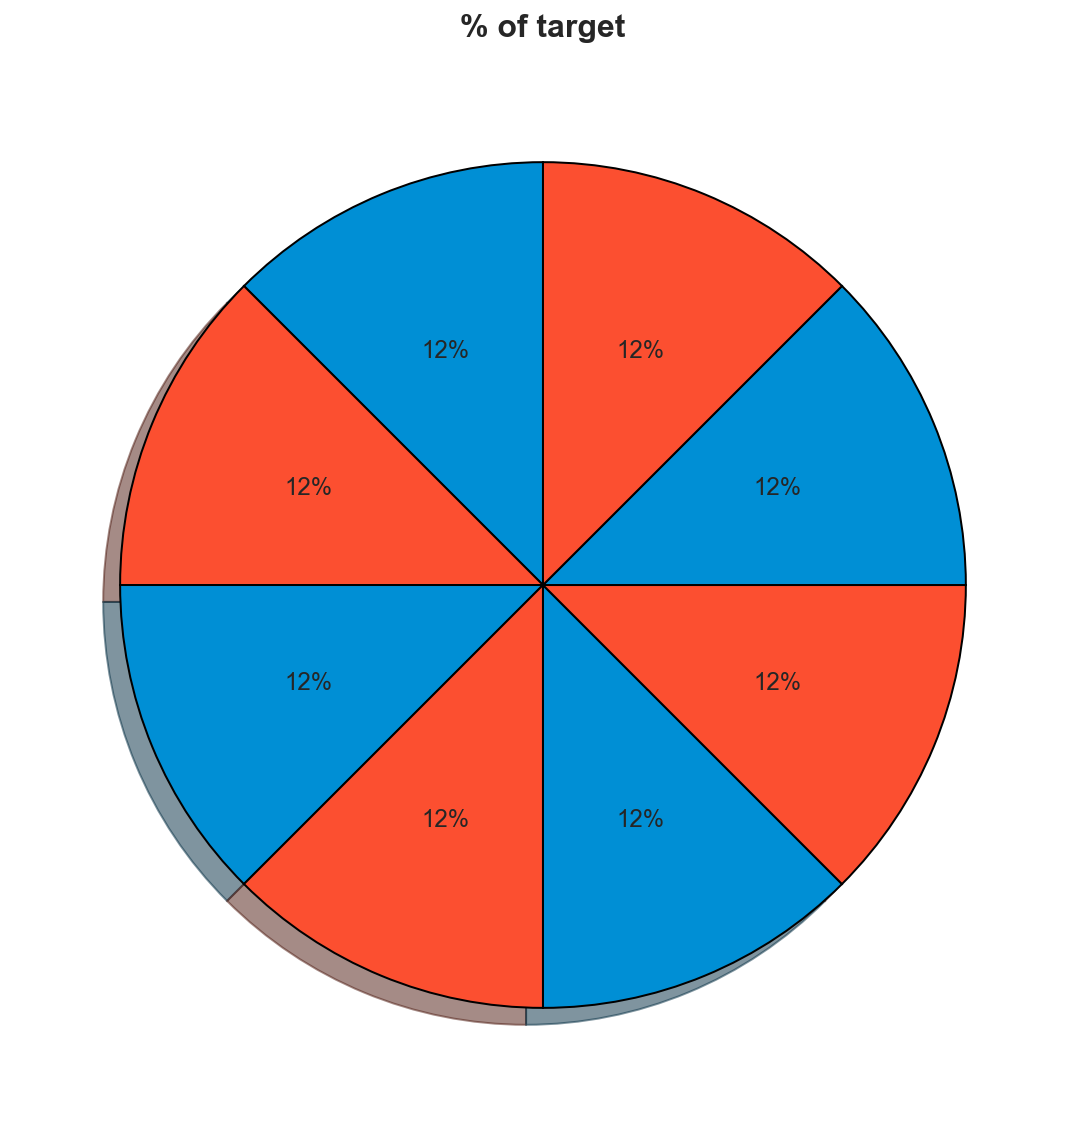

In [349]:
target_count = raw_df[TARGETNAME].value_counts().to_frame().T

colors = ['#008fd5', '#fc4f30']
plt.figure(figsize=(8,8))
plt.title('% of target')
plt.tight_layout()
plt.pie(list(target_count.iloc[0].values), startangle=90, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.f%%', shadow=True)
plt.legend(loc='best', fontsize='medium')
plt.show()

To X, y

In [350]:
match_id_df = raw_df['match_id']
X = raw_df.drop(['match_id'], axis=1)
# X = raw_df.copy()

In [351]:
y = X.pop(TARGETNAME)

In [352]:
X.fillna('', inplace=True)

In [353]:
X.dtypes

augment0                   object
augment1                   object
augment2                   object
Set7_Bruiser              float32
Set7_Cavalier             float32
                           ...   
TFT7_AurelionSol_item0     object
TFT7_AurelionSol_item1     object
TFT7_AurelionSol_item2     object
TFT7_Vladimir_item1        object
TFT7_Vladimir_item2        object
Length: 265, dtype: object

In [354]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [355]:
X[numeric_cols] = X[numeric_cols].applymap(np.int64)

In [356]:
matches_df = X.copy()
matches_df[TARGETNAME] = y

In [357]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 265 entries, augment0 to TFT7_Vladimir_item2
dtypes: int64(87), object(178)
memory usage: 22.5+ MB


In [358]:
X

,augment0,augment1,augment2,Set7_Bruiser,Set7_Cavalier,Set7_Dragonmancer,Set7_Evoker,Set7_Guild,Set7_Jade,Set7_Legend,...,TFT7_Senna_item1,TFT7_Senna_item2,TFT7_Skarner_item2,TFT7_Vladimir_item0,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Vladimir_item1,TFT7_Vladimir_item2
0,TFT7_Augment_PandorasBench,TFT6_Augment_ItemGrabBag1,TFT6_Augment_JeweledLotus,0,3,1,0,1,0,1,...,None,None,None,None,0,None,None,None,None,None
1,TFT6_Augment_TrueTwos,TFT6_Augment_SecondWind1,TFT6_Augment_CelestialBlessing2,0,0,0,1,1,0,0,...,None,None,None,None,0,None,None,None,None,None
2,TFT6_Augment_RichGetRicher,TFT6_Augment_ThrillOfTheHunt1,TFT6_Augment_PortableForge,2,0,0,0,0,0,0,...,None,None,None,None,0,None,None,None,None,None
3,TFT7_Augment_BruiserPersonalTraining,TFT6_Augment_SecondWind1,TFT6_Augment_PortableForge,1,1,0,0,3,0,0,...,None,None,None,None,0,None,None,None,None,None
4,TFT6_Augment_PortableForge,TFT7_Augment_JadeEmblem,TFT7_Augment_PandorasBench,0,0,0,1,0,1,0,...,None,None,None,None,0,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,TFT7_Augment_JadeEmblem,TFT6_Augment_ThrillOfTheHunt1,TFT6_Augment_ComponentGrabBag,0,0,0,1,1,3,0,...,None,None,None,None,0,None,None,None,None,None
11140,TFT6_Augment_CelestialBlessing1,TFT6_Augment_Weakspot,TFT7_Augment_AssassinEmblem,2,0,0,0,1,0,0,...,None,None,None,None,0,None,None,None,None,None
11141,TFT6_Augment_TinyTitans,TFT7_Augment_WarriorTrait,TFT6_Augment_Ascension,1,1,0,0,3,0,0,...,None,None,None,None,0,None,None,None,None,None
11142,TFT6_Augment_Electrocharge1,TFT7_Augment_BestFriends1,TFT6_Augment_ComponentGrabBag,0,0,2,0,0,1,0,...,None,None,None,None,0,None,None,None,None,None


# Traits

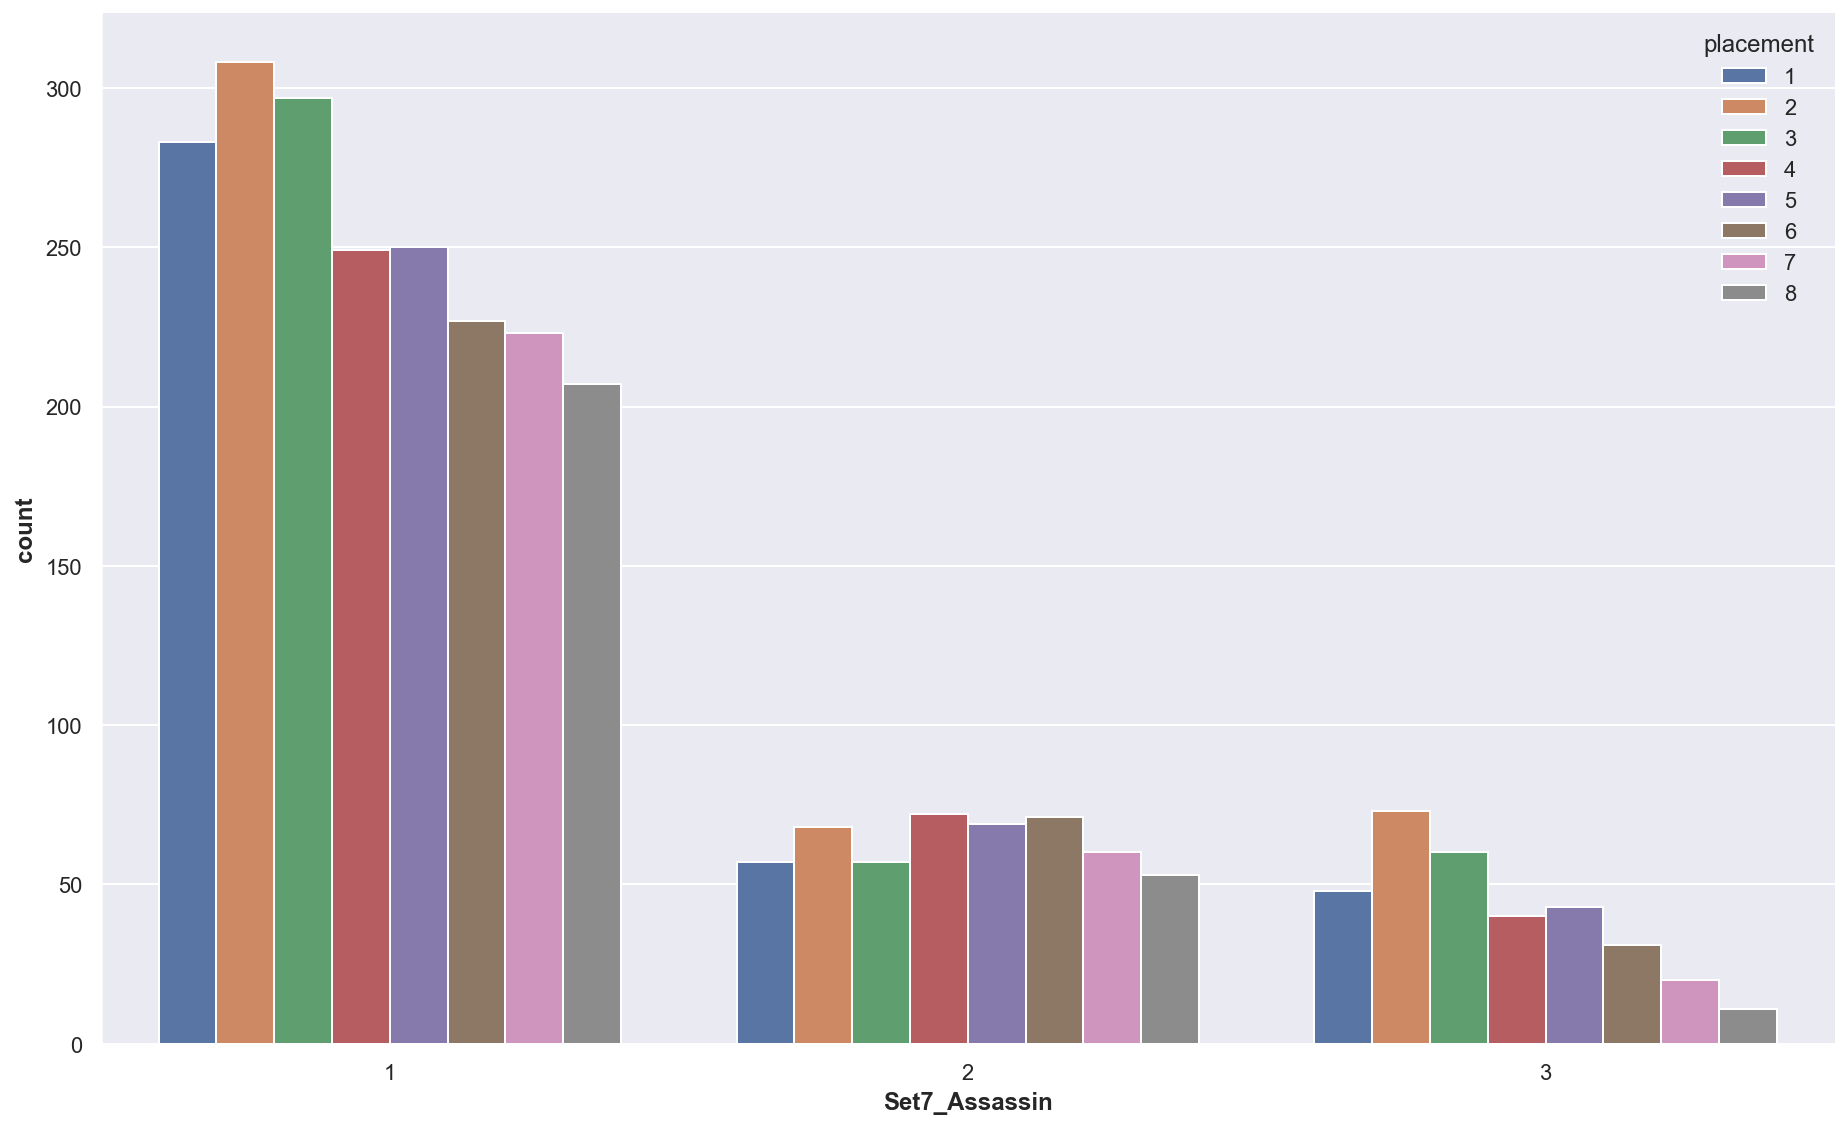

In [359]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Assassin']>0], x='Set7_Assassin', hue=TARGETNAME)
sns.despine()

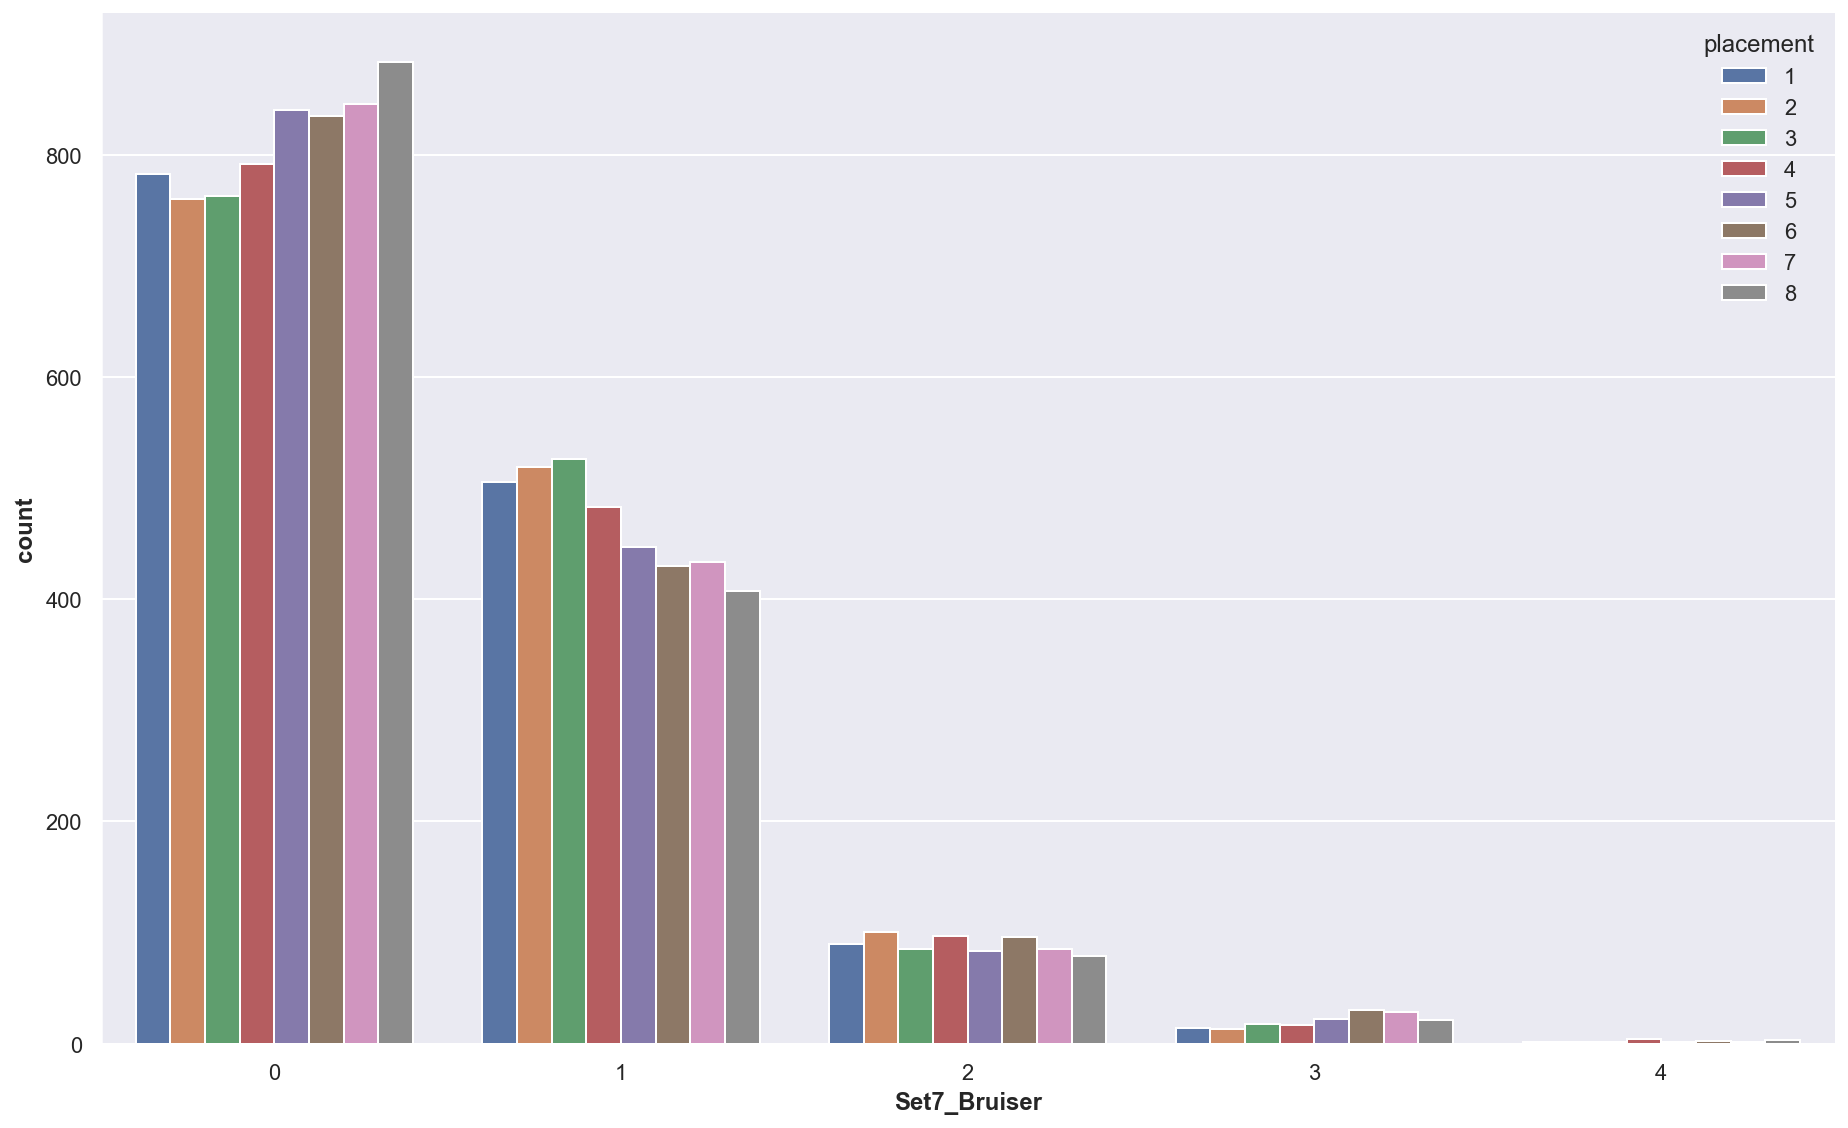

In [360]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Bruiser']>=0], x='Set7_Bruiser', hue=TARGETNAME)
sns.despine()

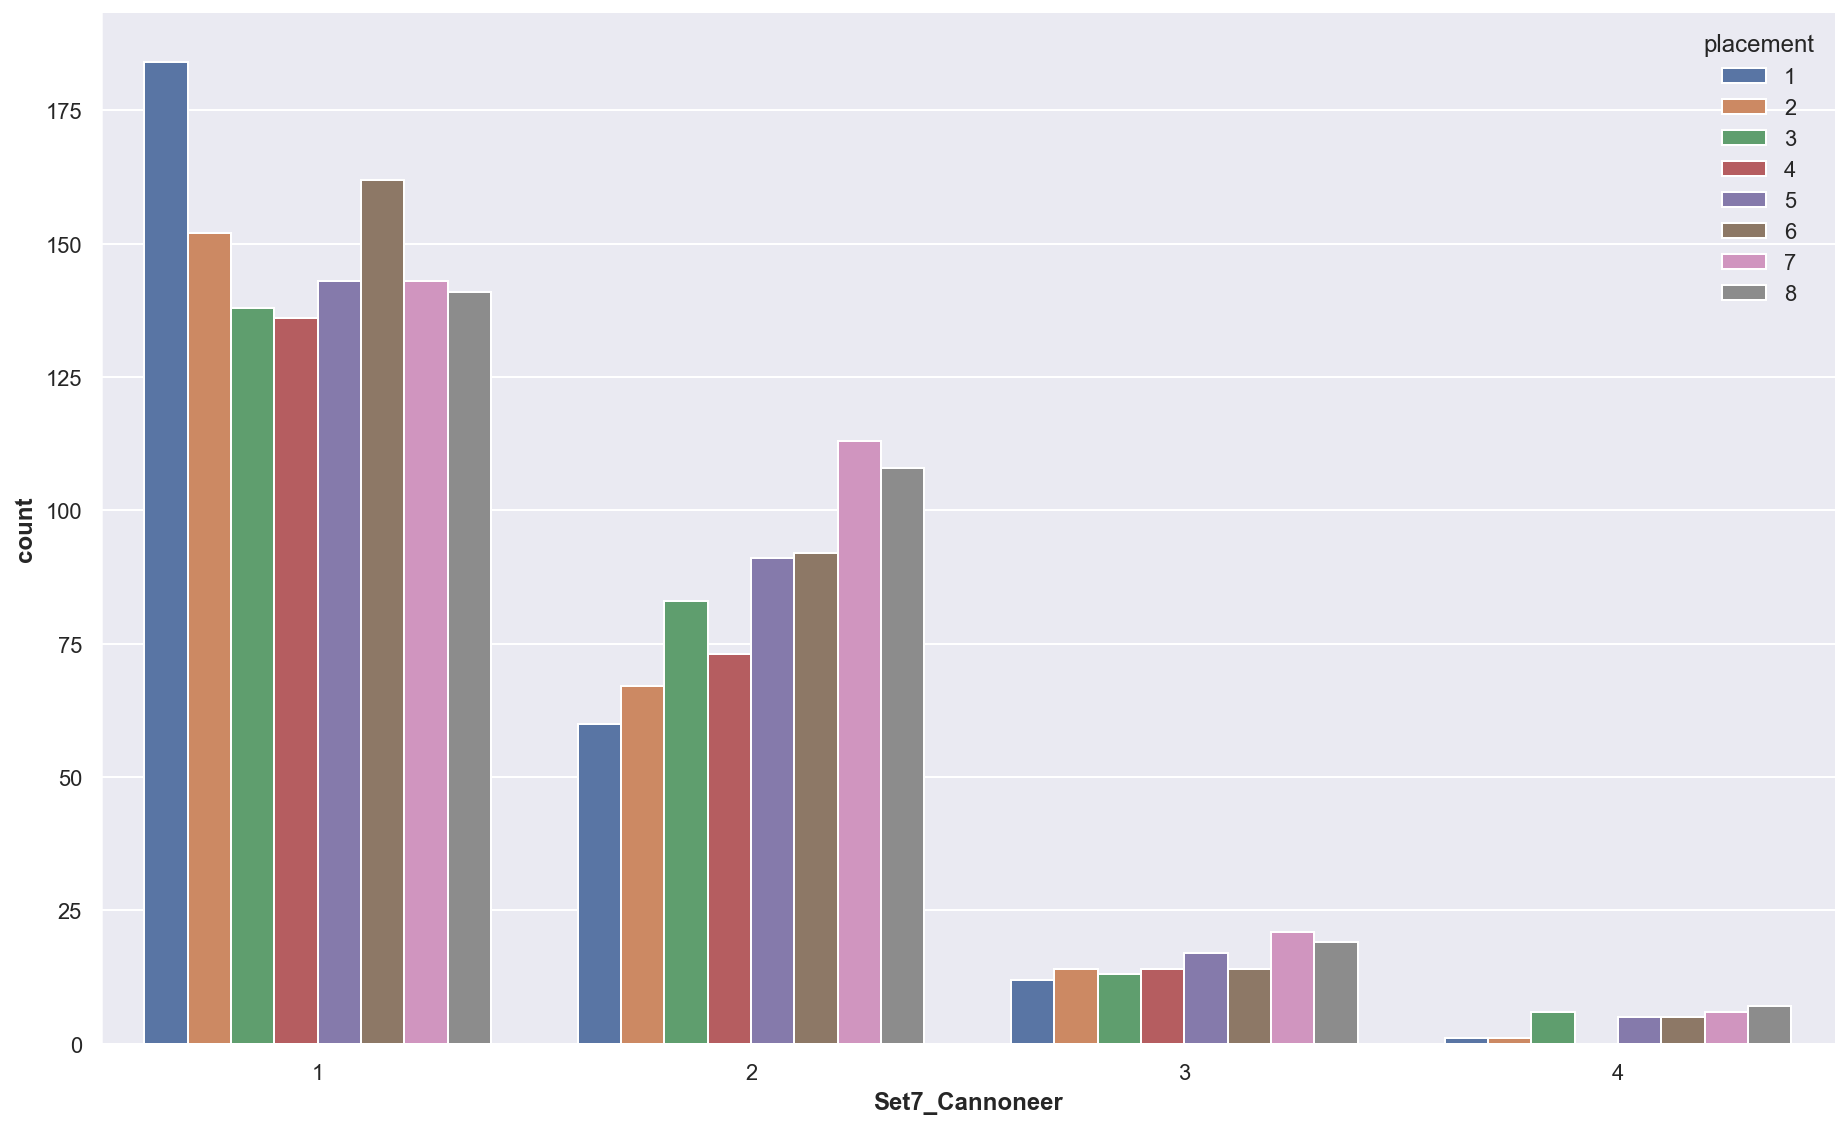

In [361]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cannoneer']>0], x='Set7_Cannoneer', hue=TARGETNAME)
sns.despine()

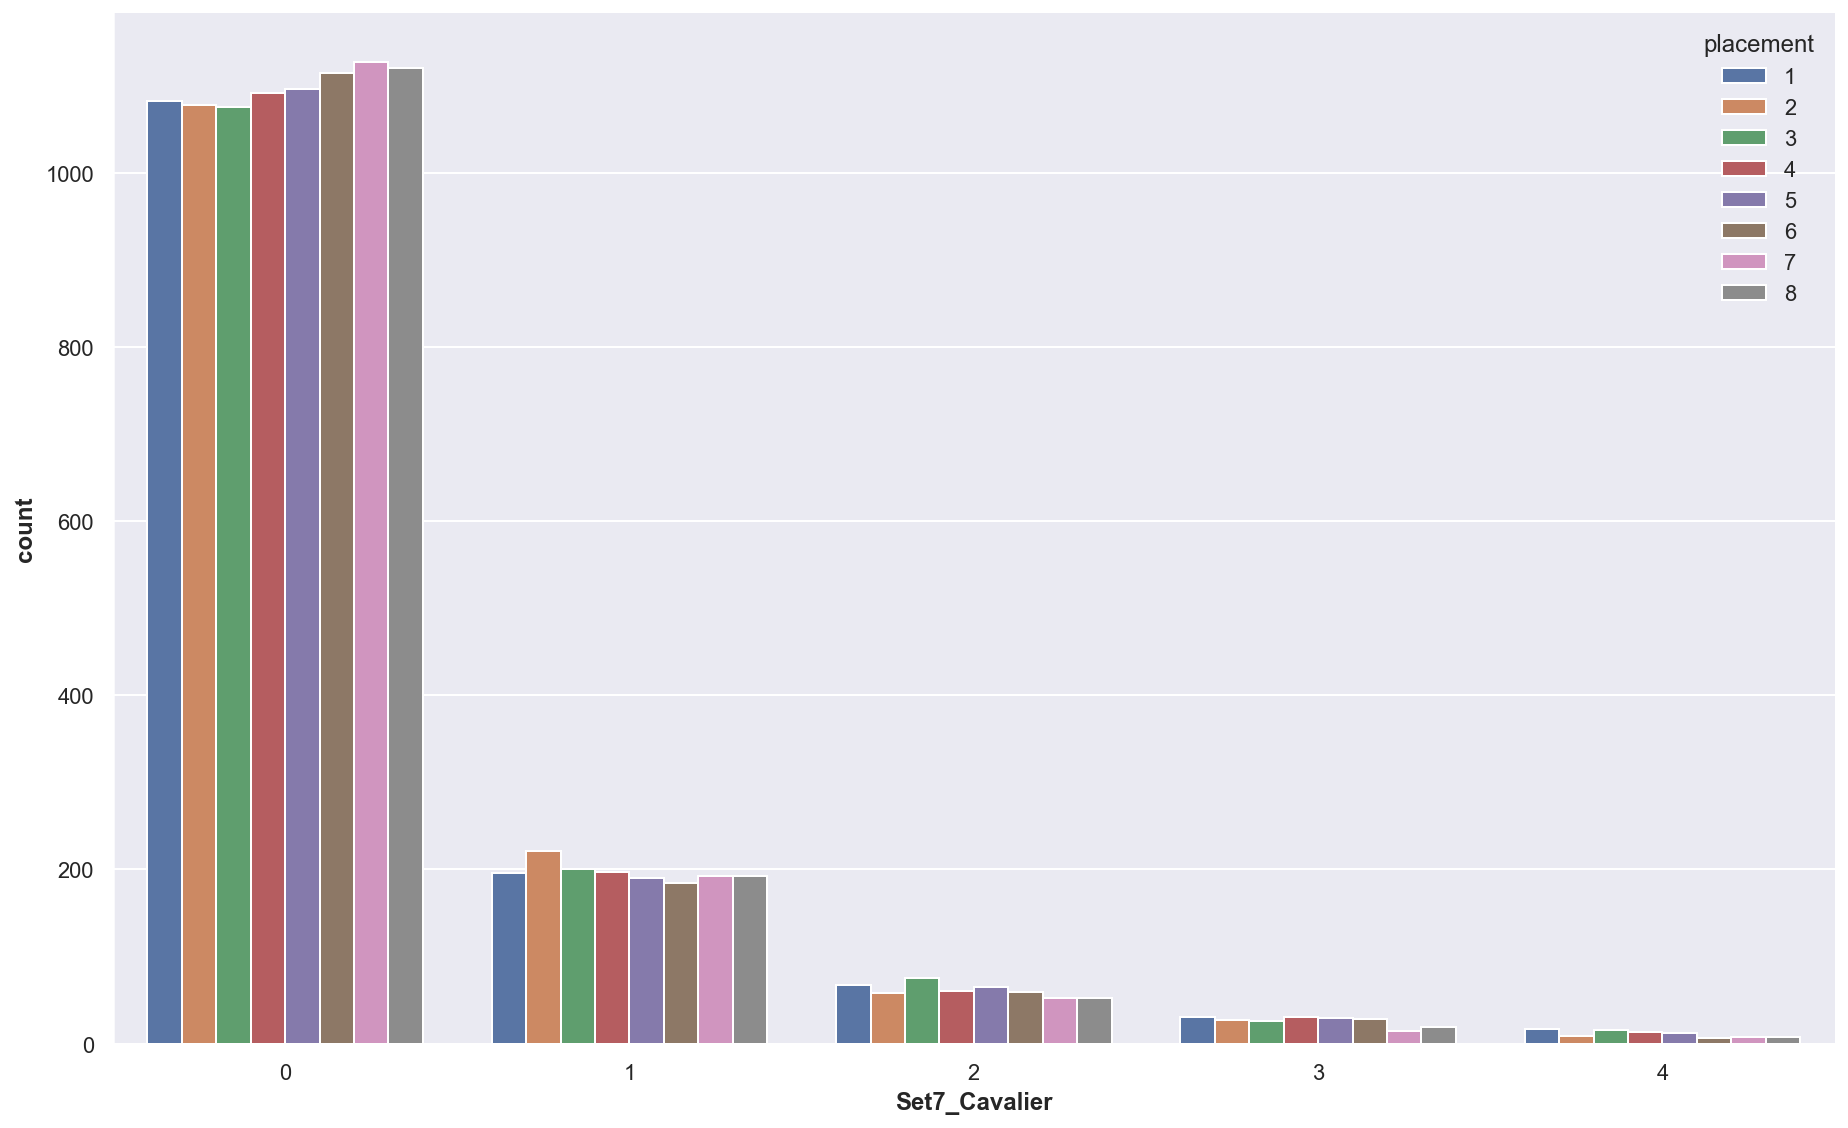

In [362]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cavalier']>=0], x='Set7_Cavalier', hue=TARGETNAME)
sns.despine()

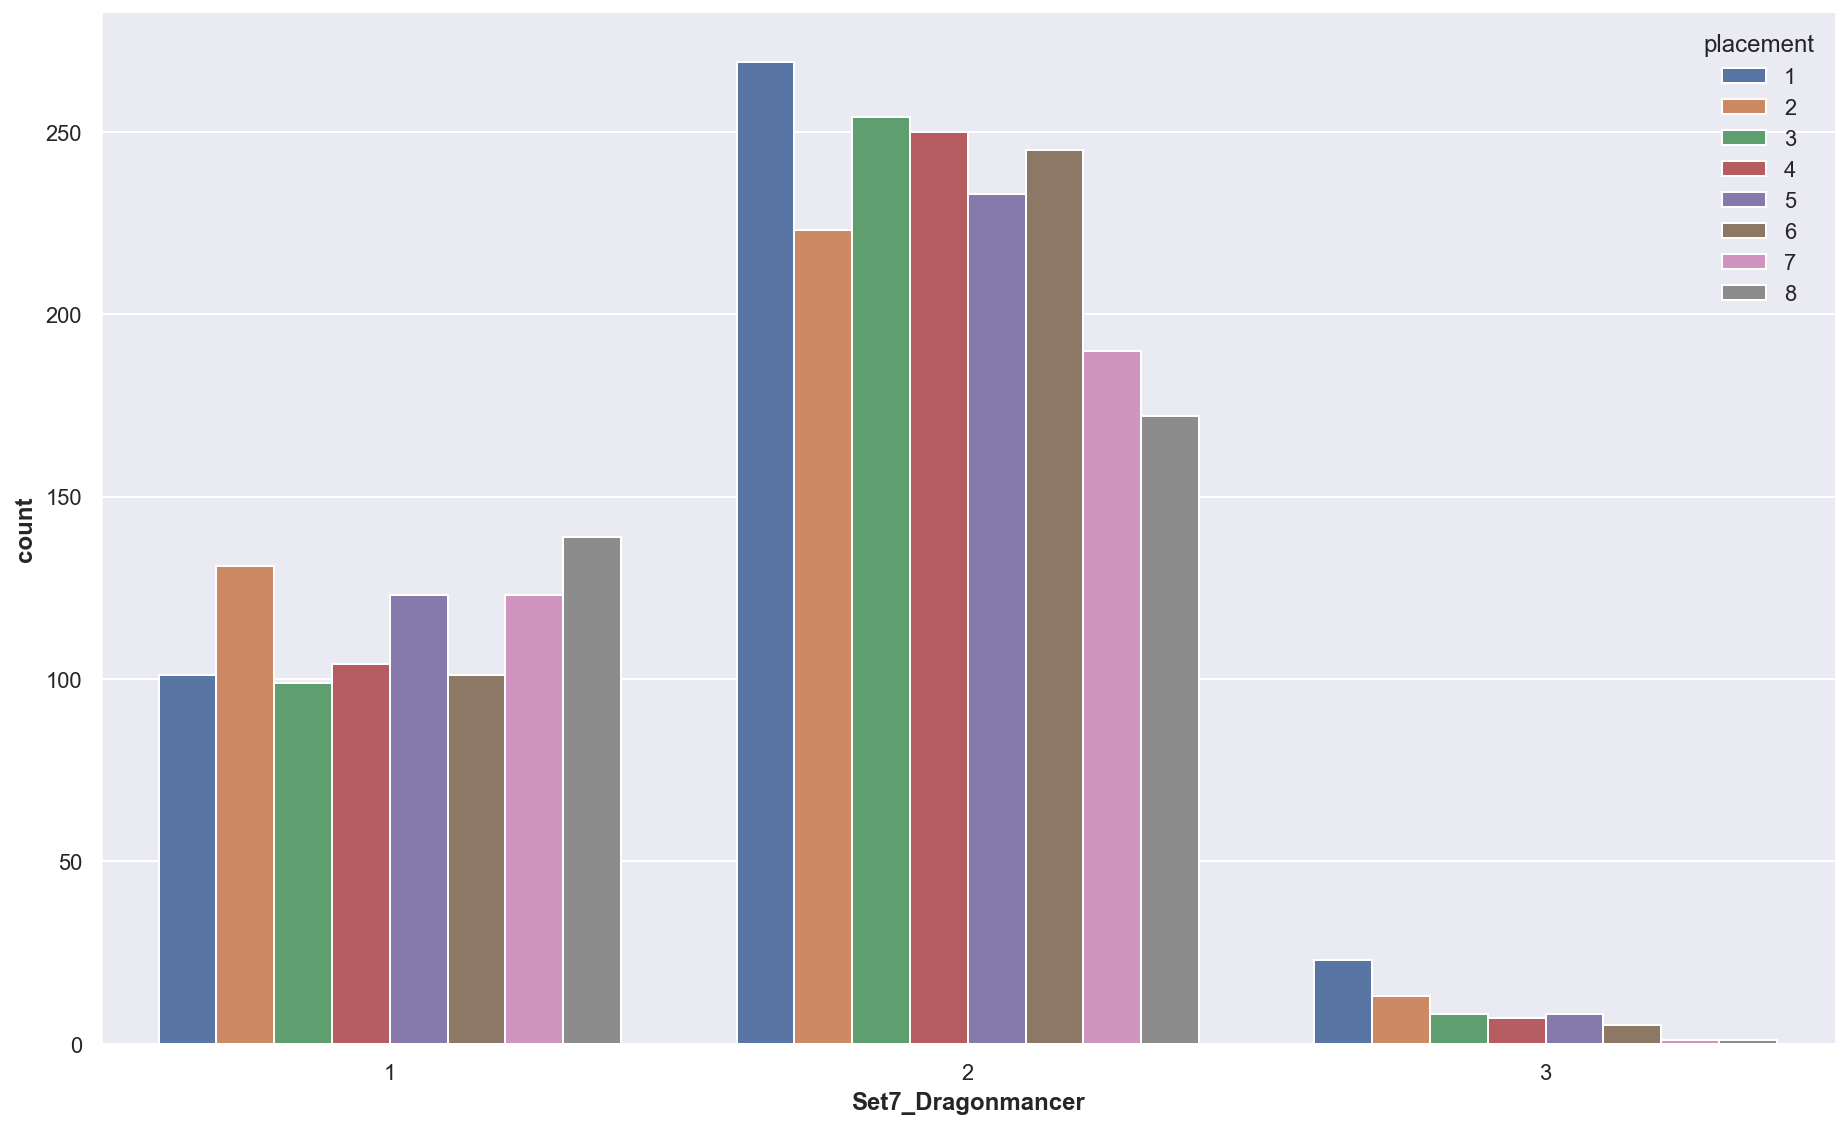

In [363]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragonmancer']>0], x='Set7_Dragonmancer', hue=TARGETNAME)
sns.despine()

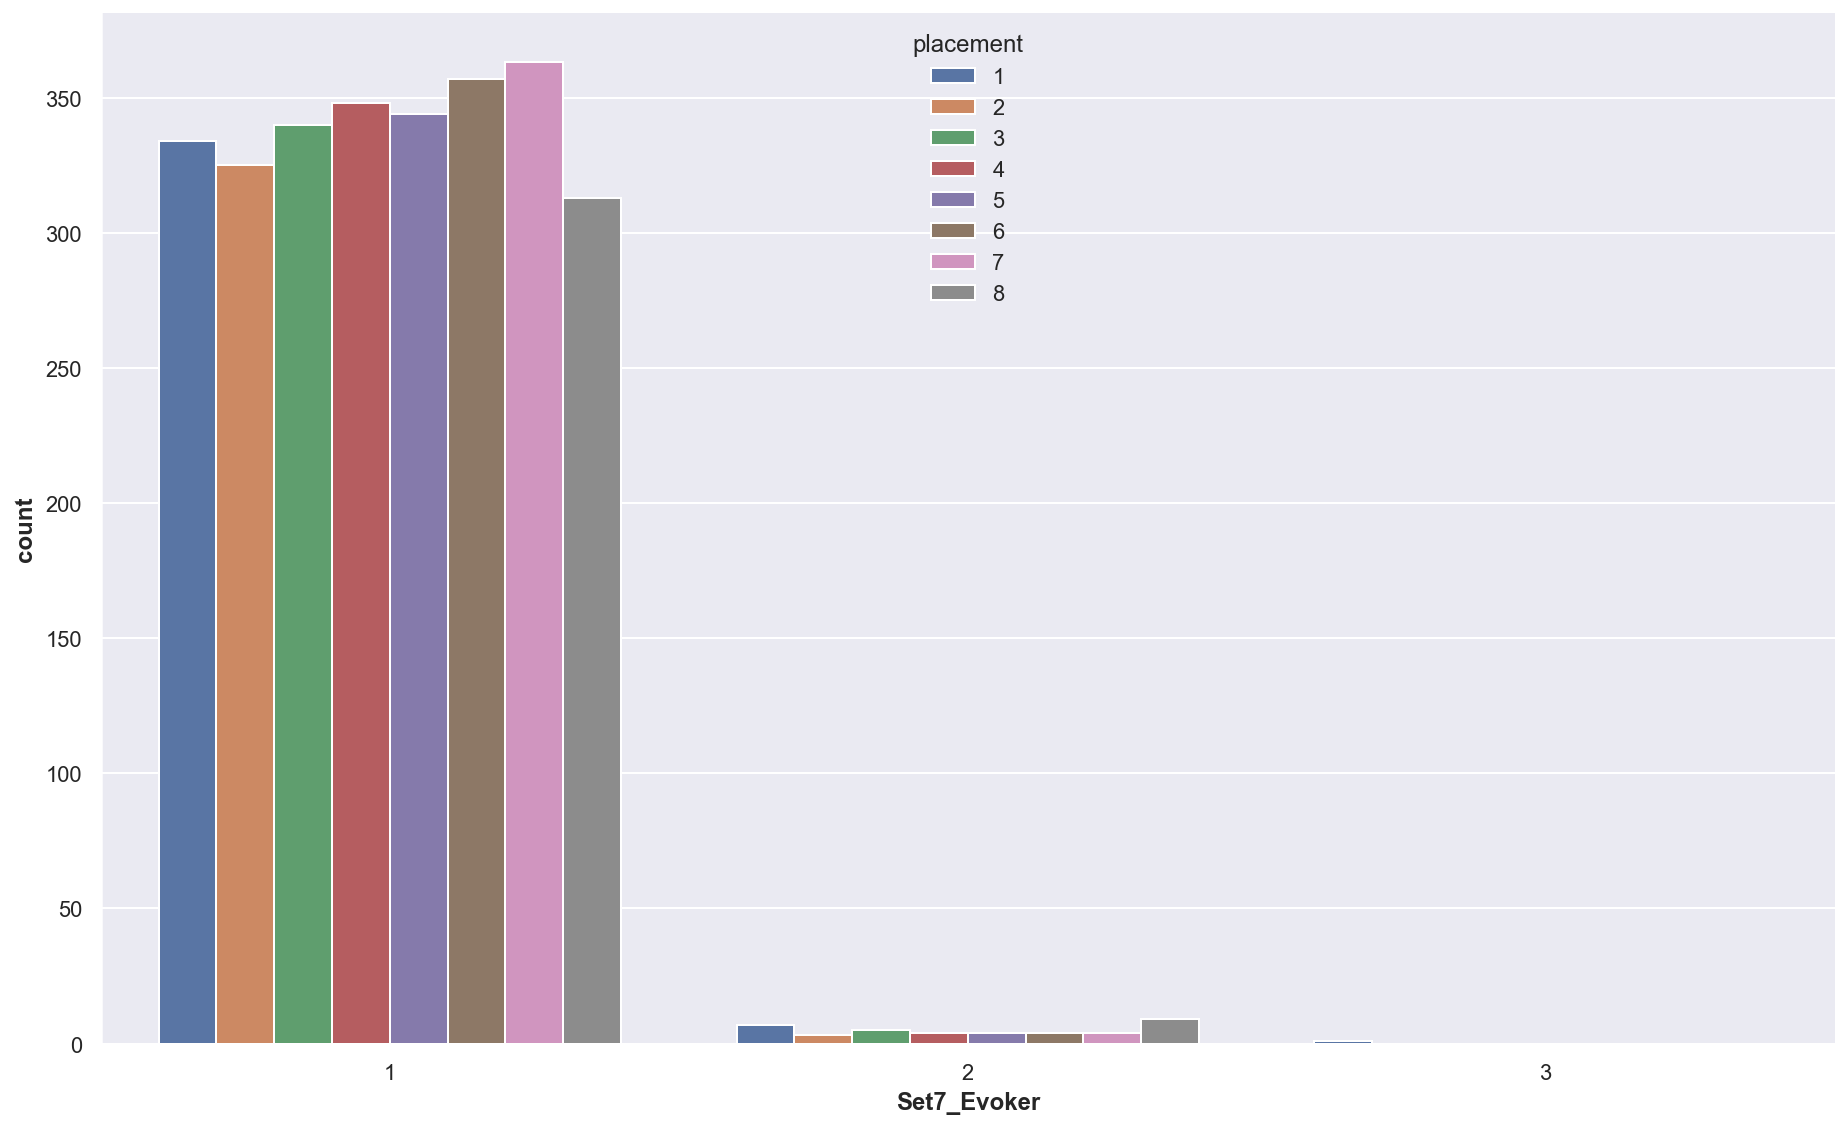

In [364]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Evoker']>0], x='Set7_Evoker', hue=TARGETNAME)
sns.despine()

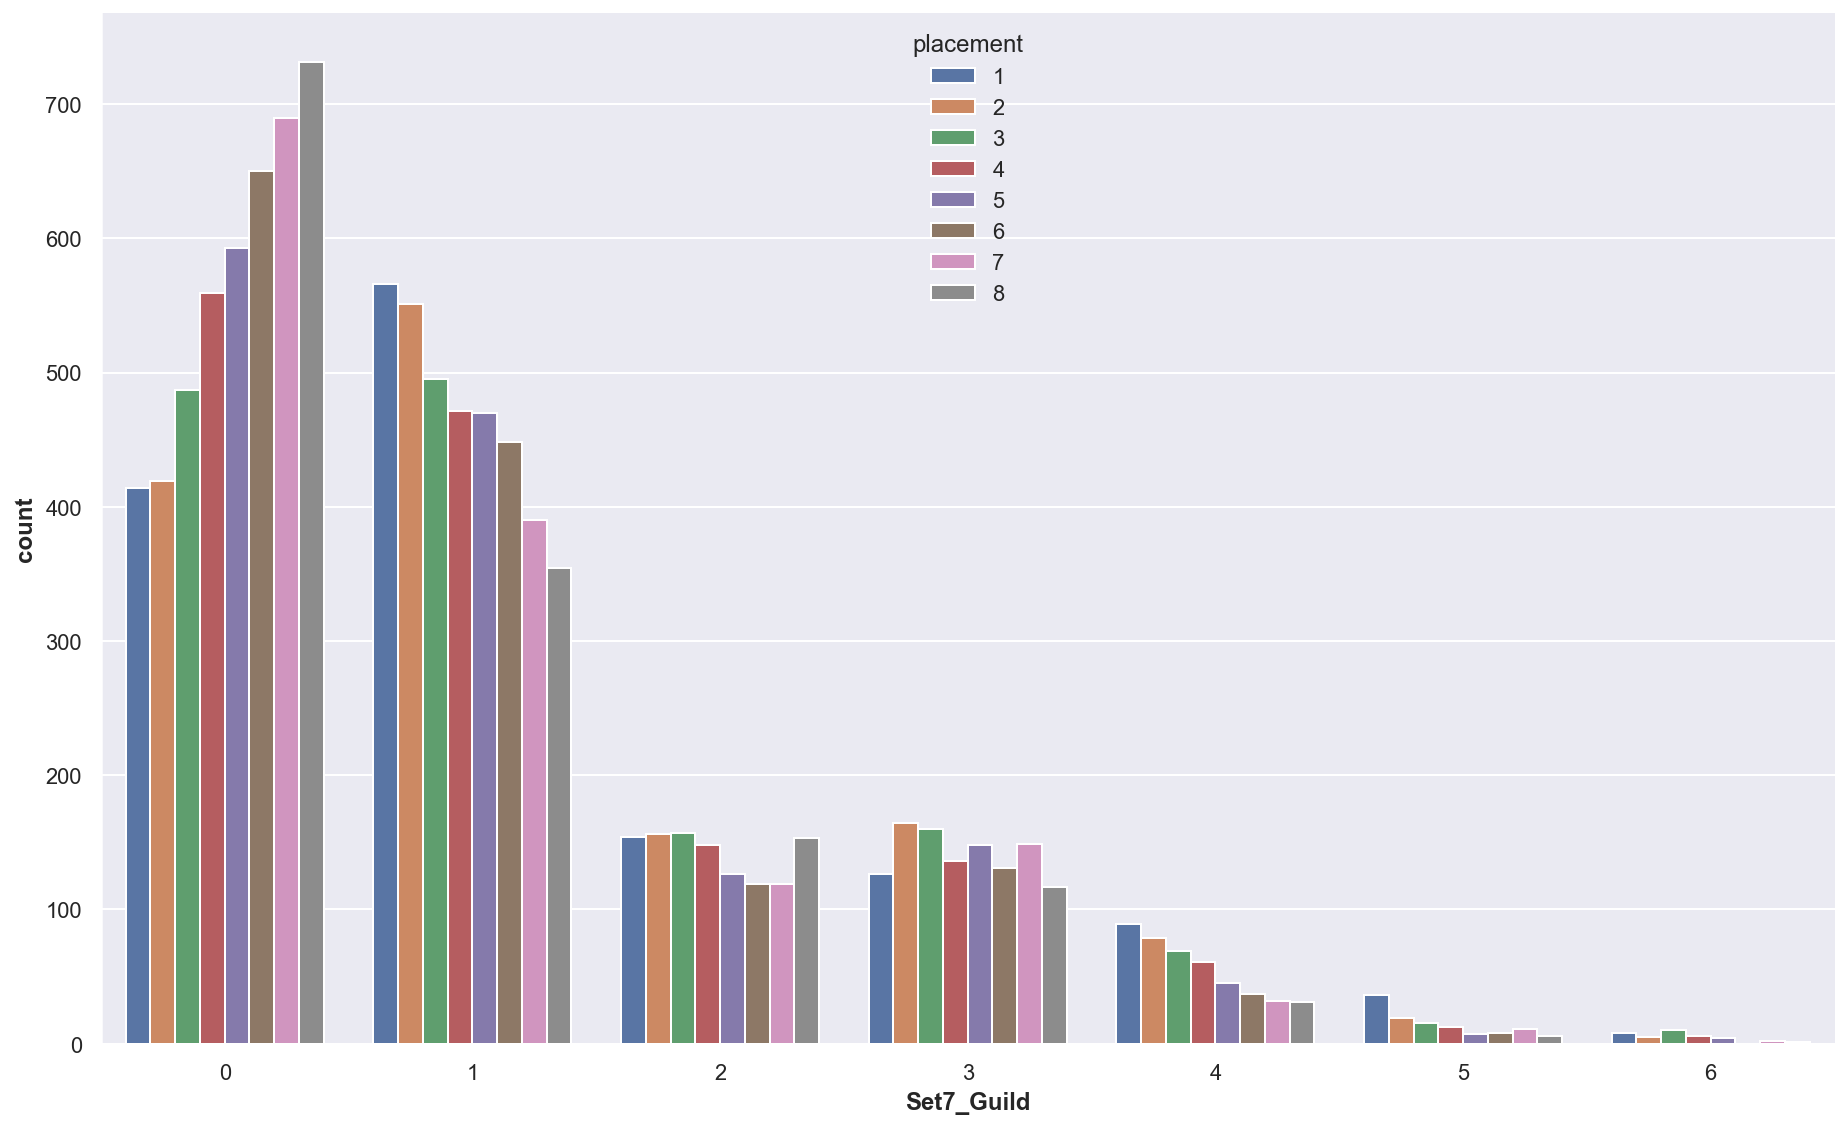

In [365]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='Set7_Guild', hue=TARGETNAME)
sns.despine()

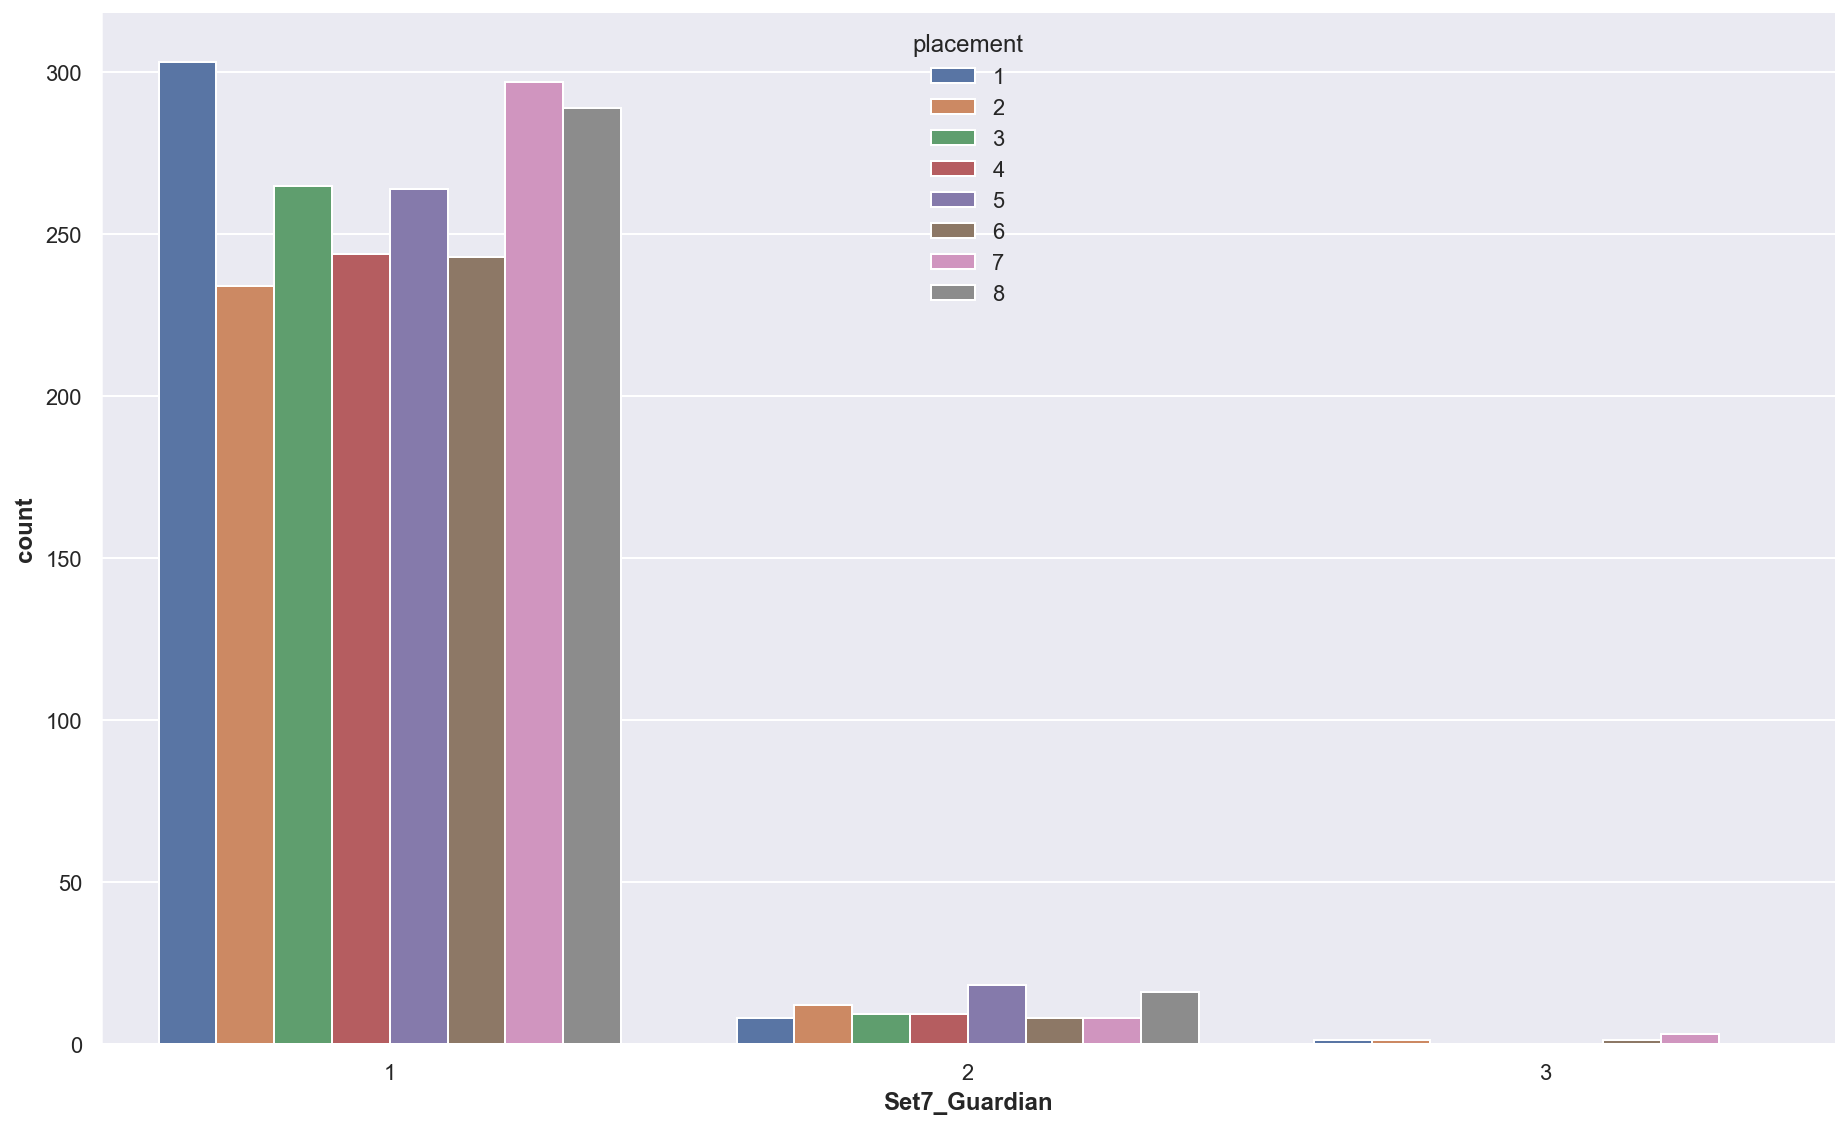

In [366]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Guardian']>0], x='Set7_Guardian', hue=TARGETNAME)
sns.despine()

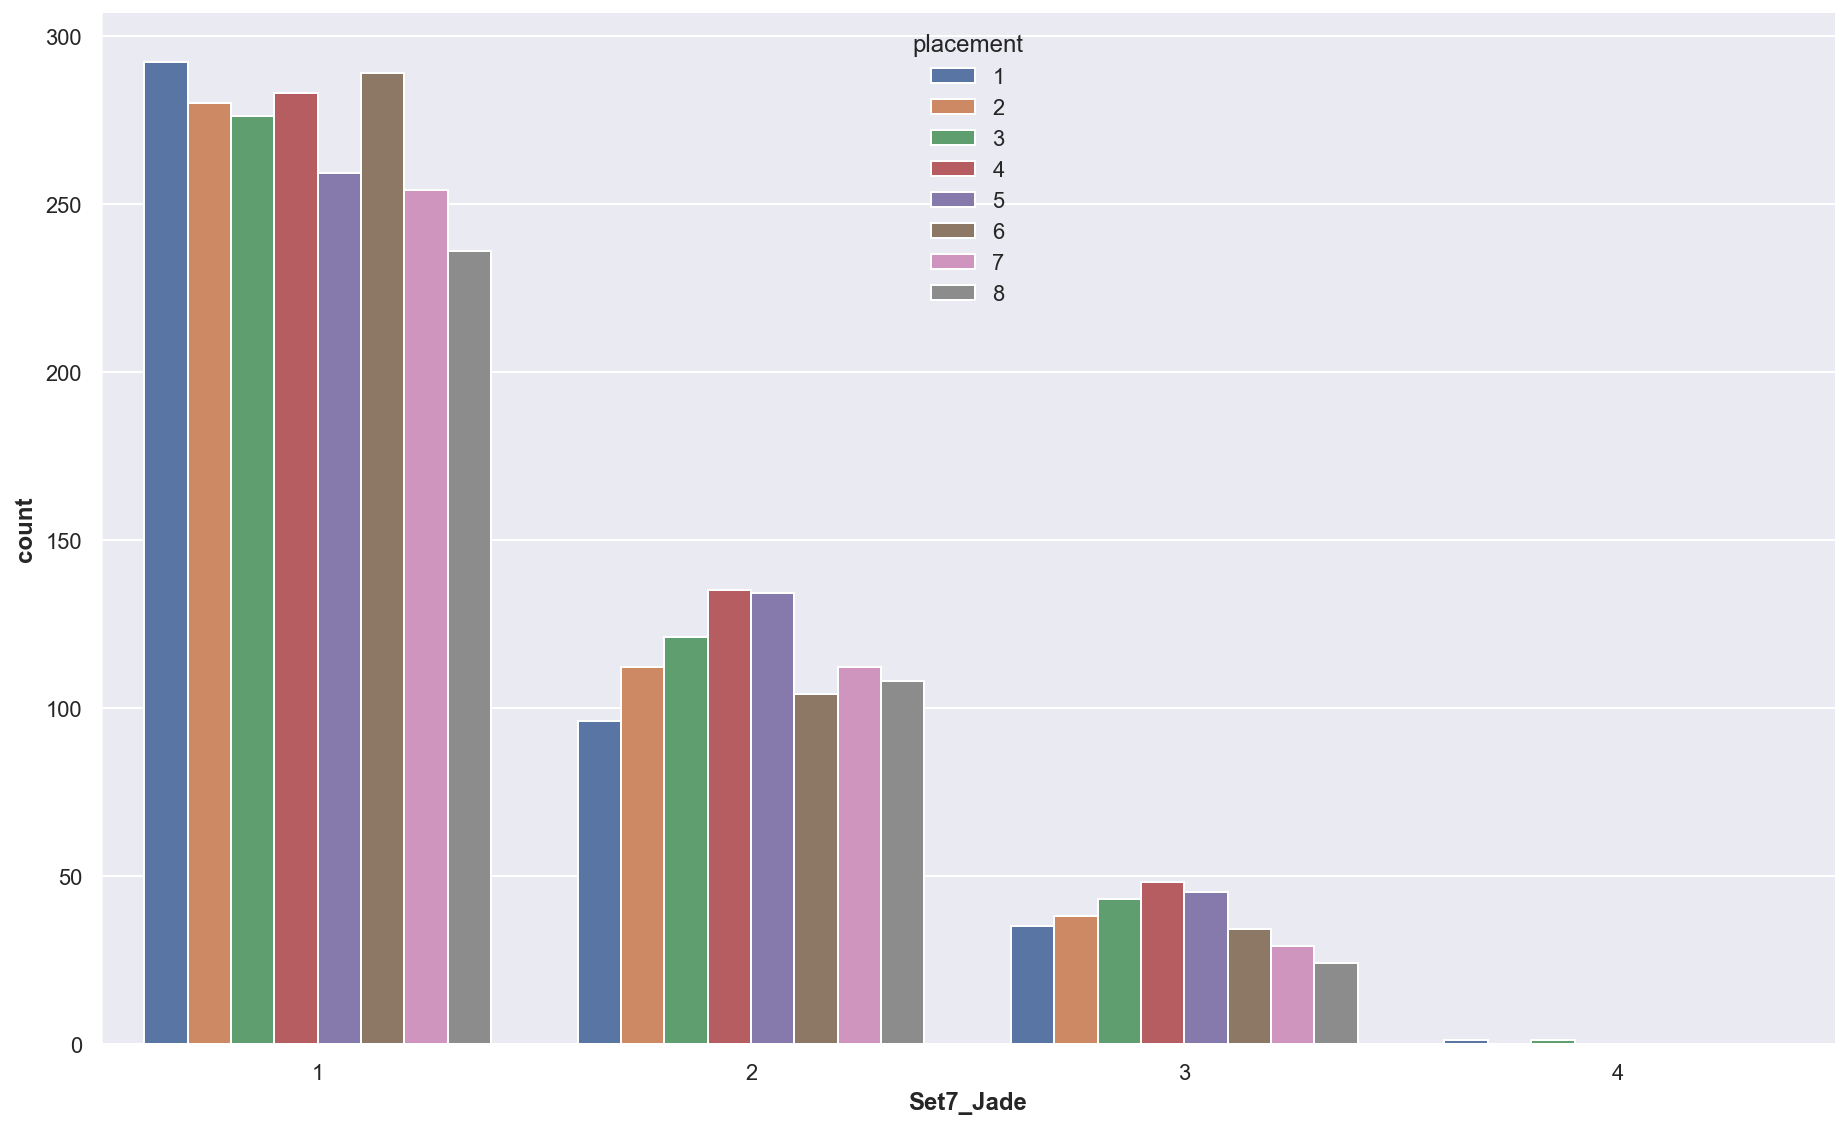

In [367]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Jade']>0], x='Set7_Jade', hue=TARGETNAME)
sns.despine()

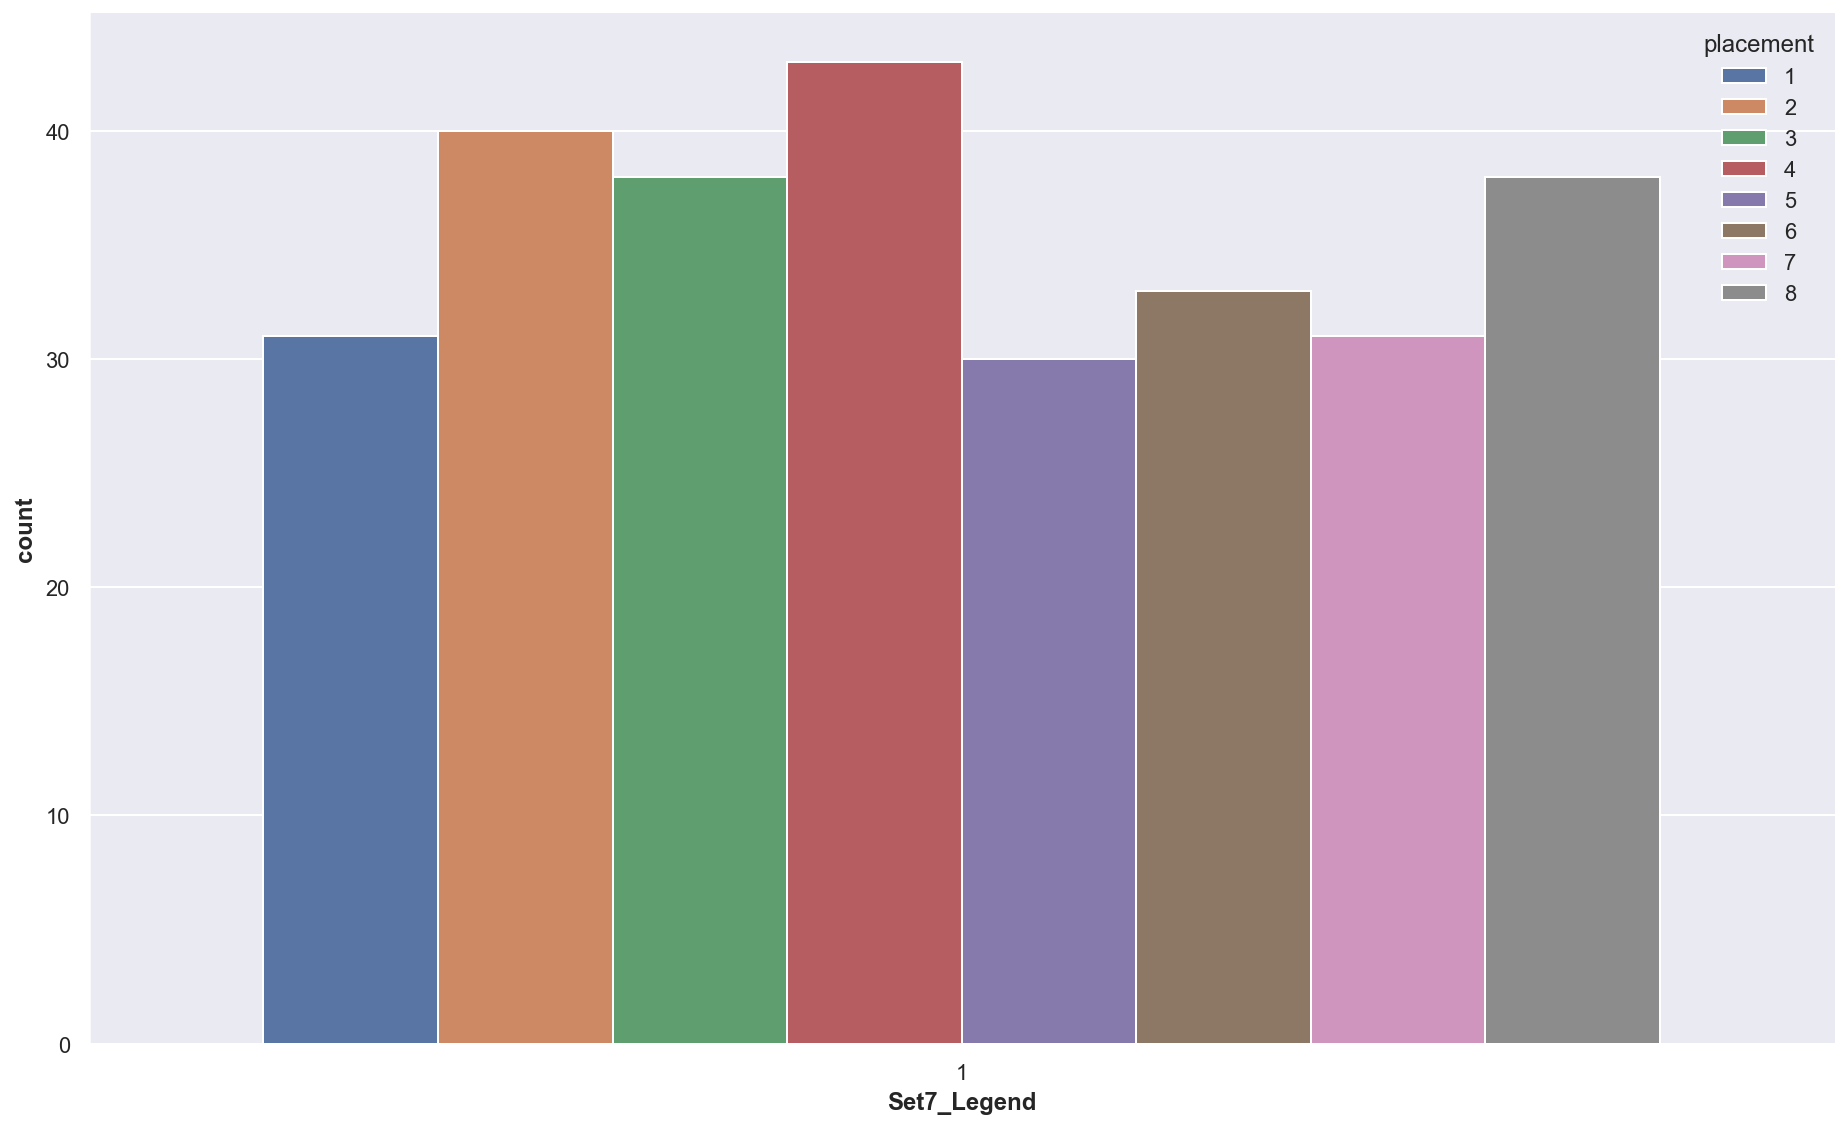

In [368]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Legend']>0], x='Set7_Legend', hue=TARGETNAME)
sns.despine()

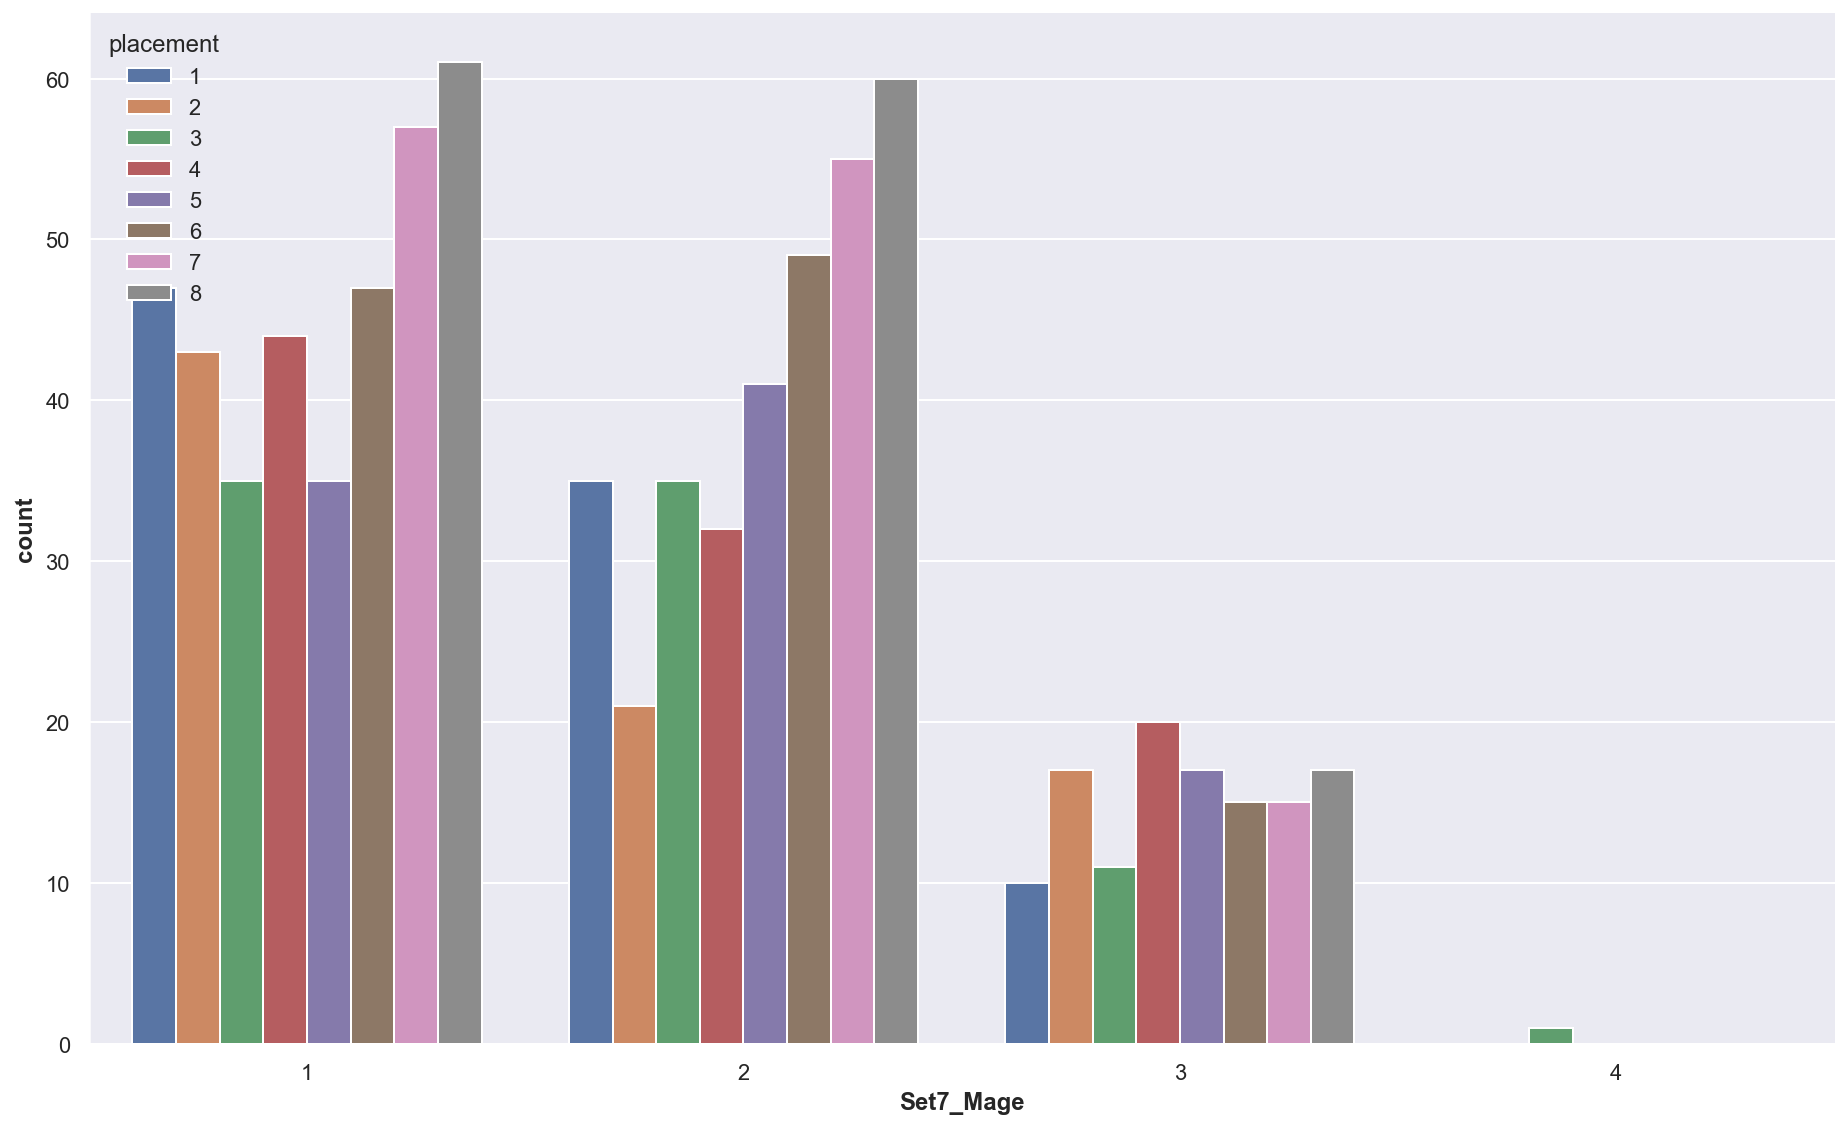

In [369]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='Set7_Mage', hue=TARGETNAME)
sns.despine()

Need Zoe for Mages

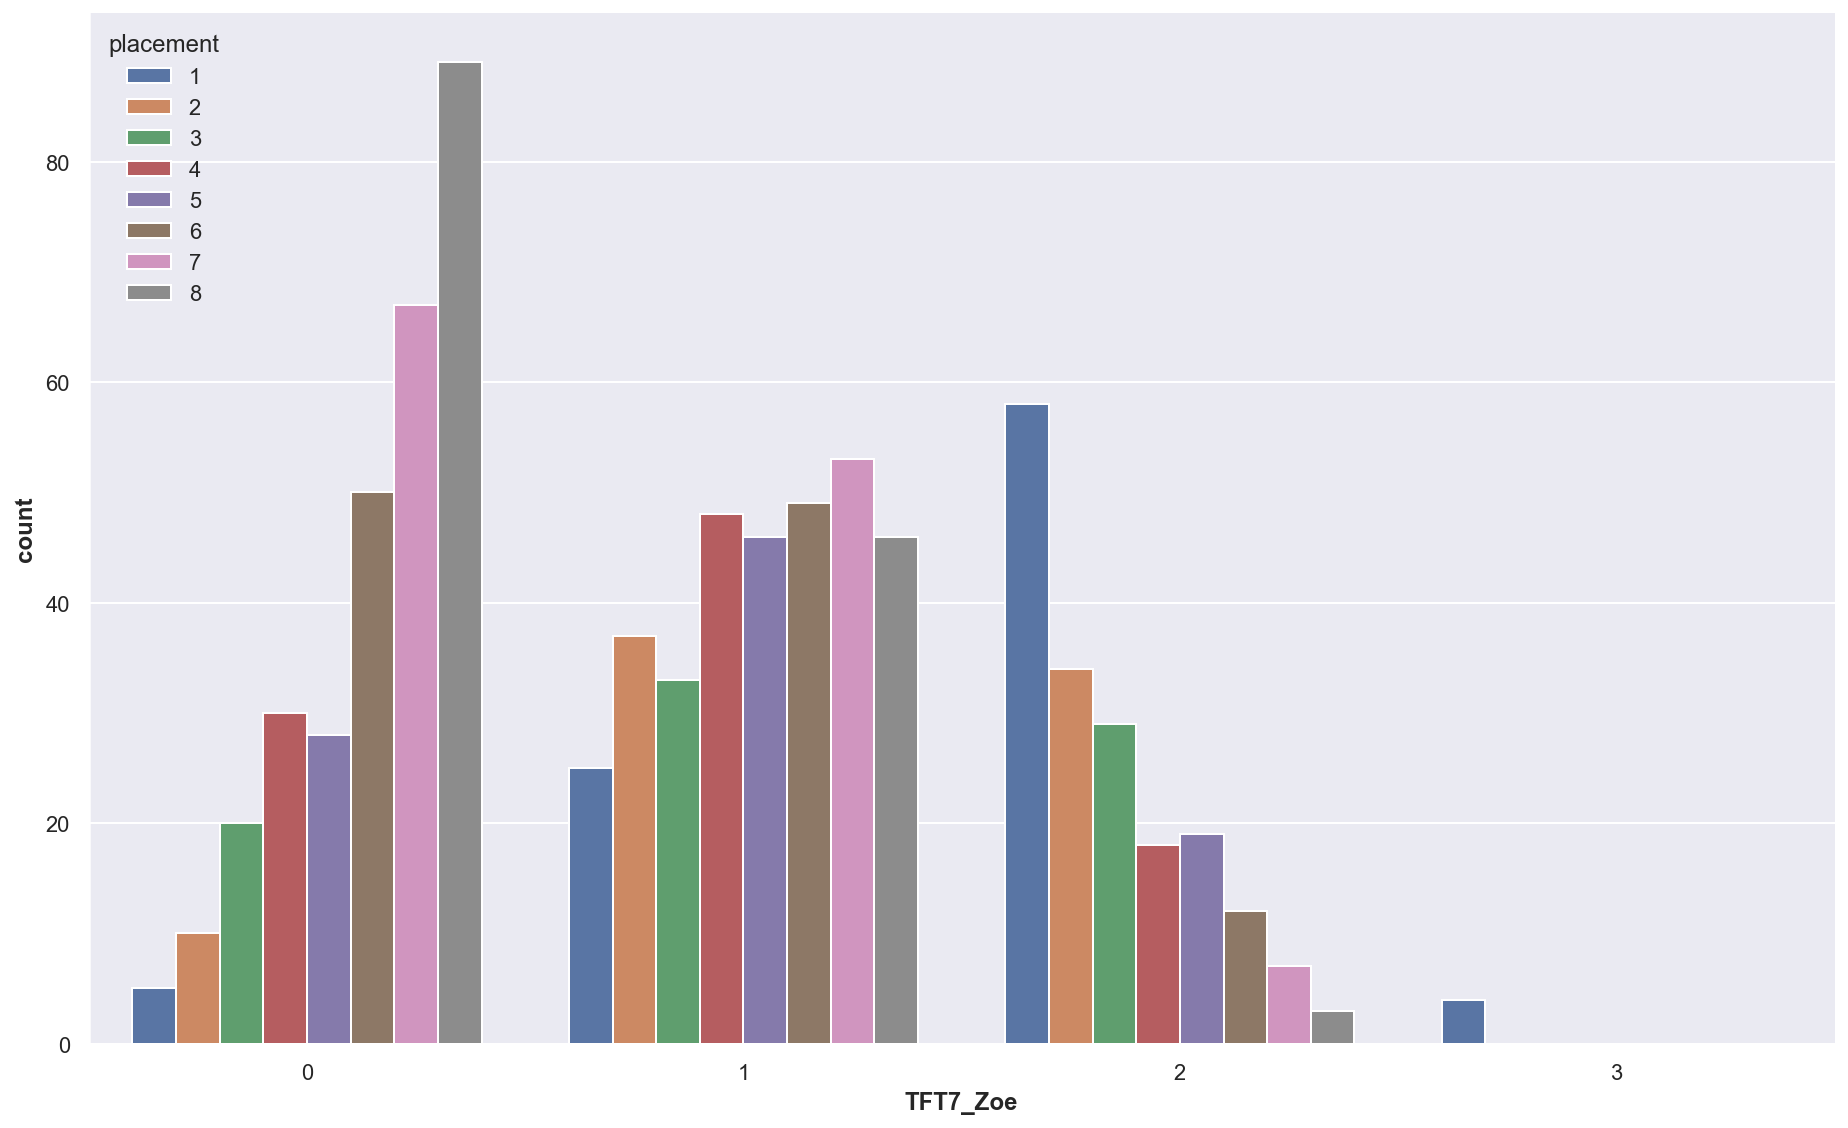

In [370]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='TFT7_Zoe', hue=TARGETNAME)
sns.despine()

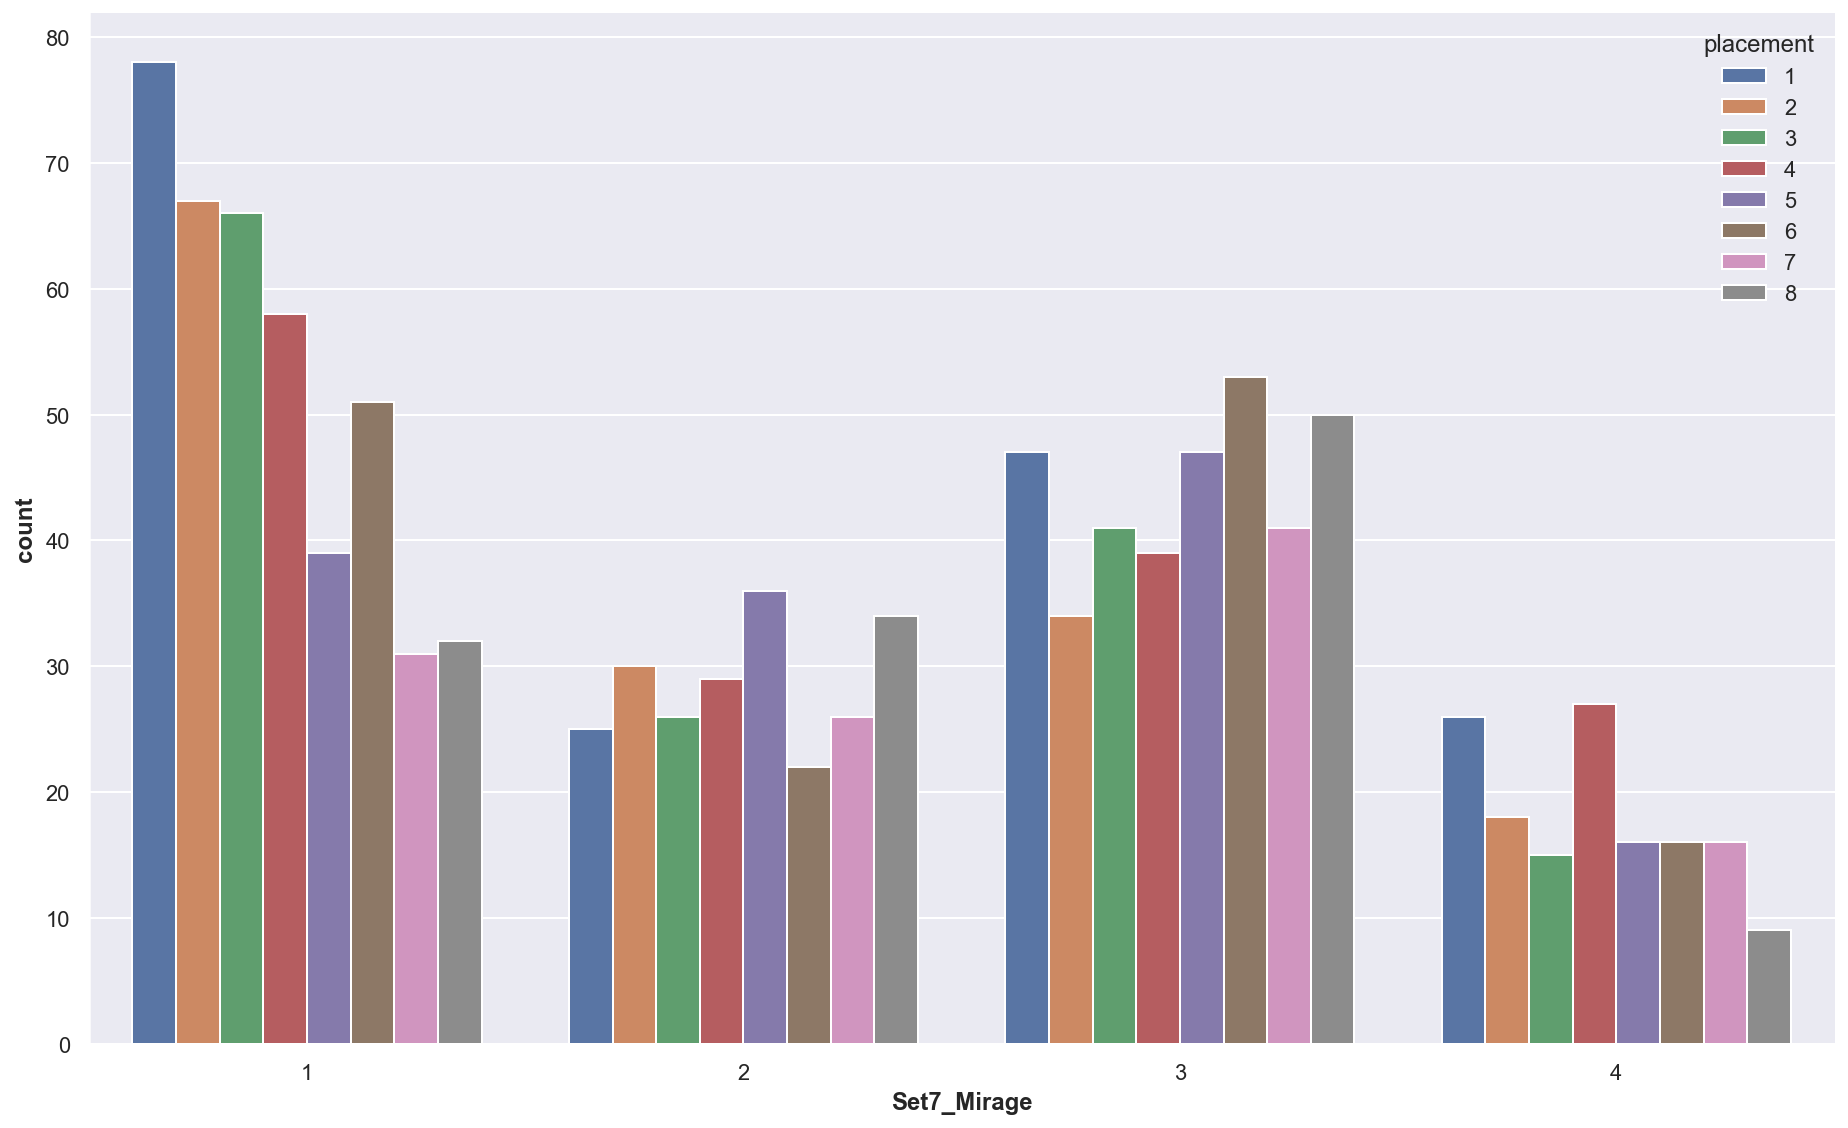

In [371]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mirage']>0], x='Set7_Mirage', hue=TARGETNAME)
sns.despine()

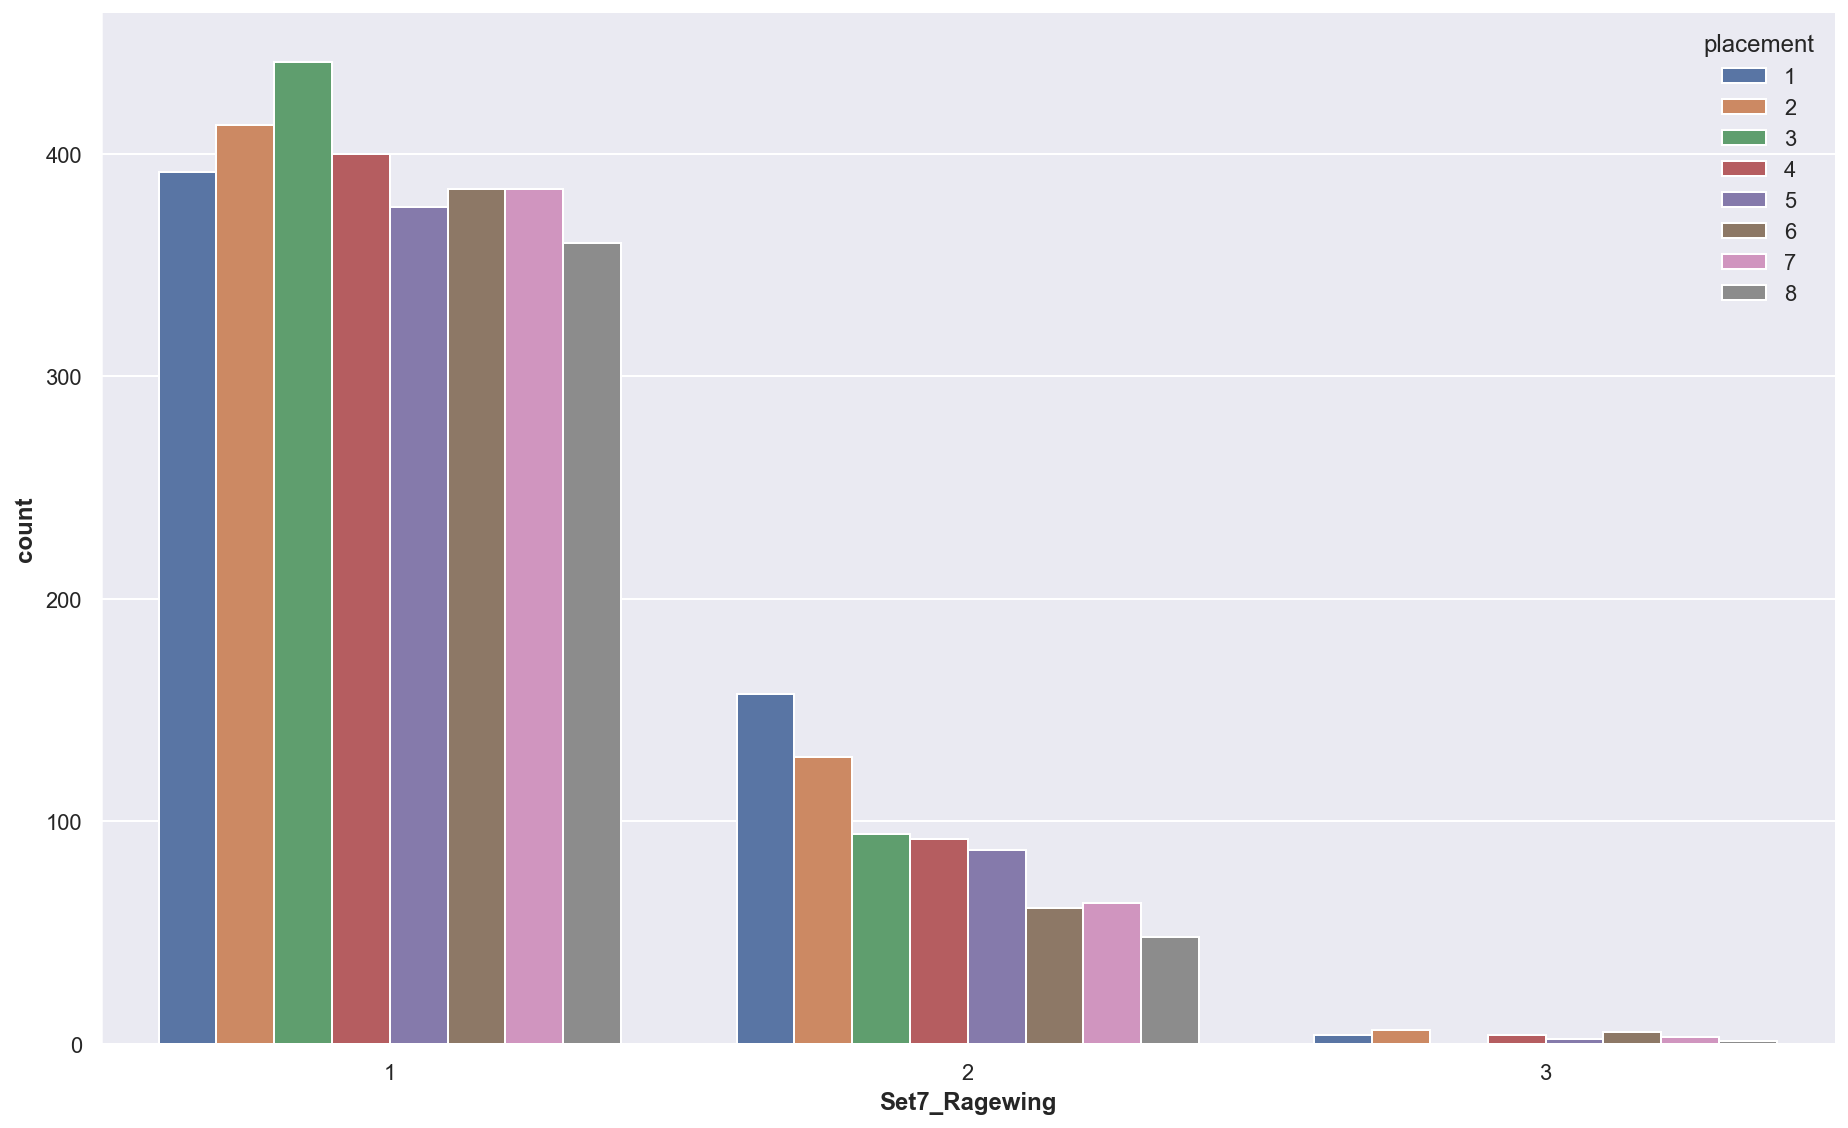

In [372]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Ragewing']>0], x='Set7_Ragewing', hue=TARGETNAME)
sns.despine()

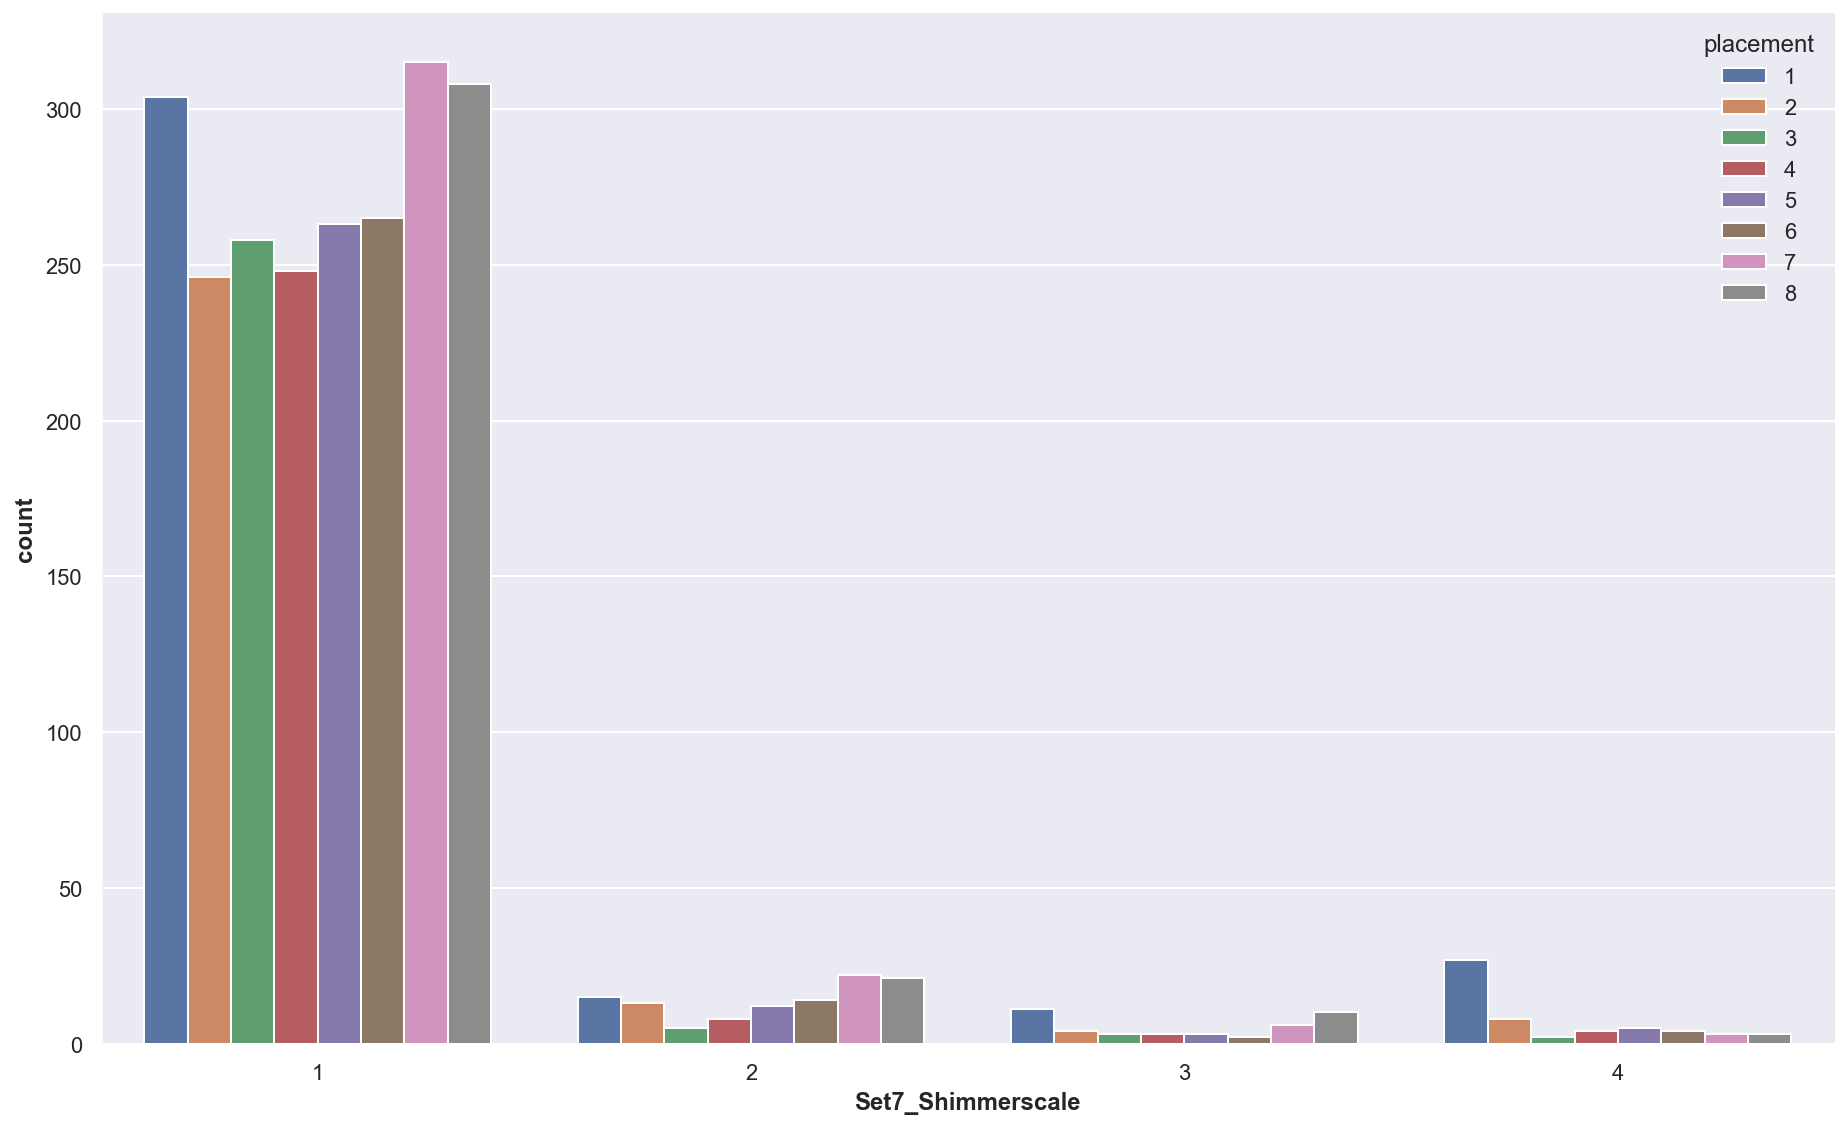

In [373]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shimmerscale']>0], x='Set7_Shimmerscale', hue=TARGETNAME)
sns.despine()

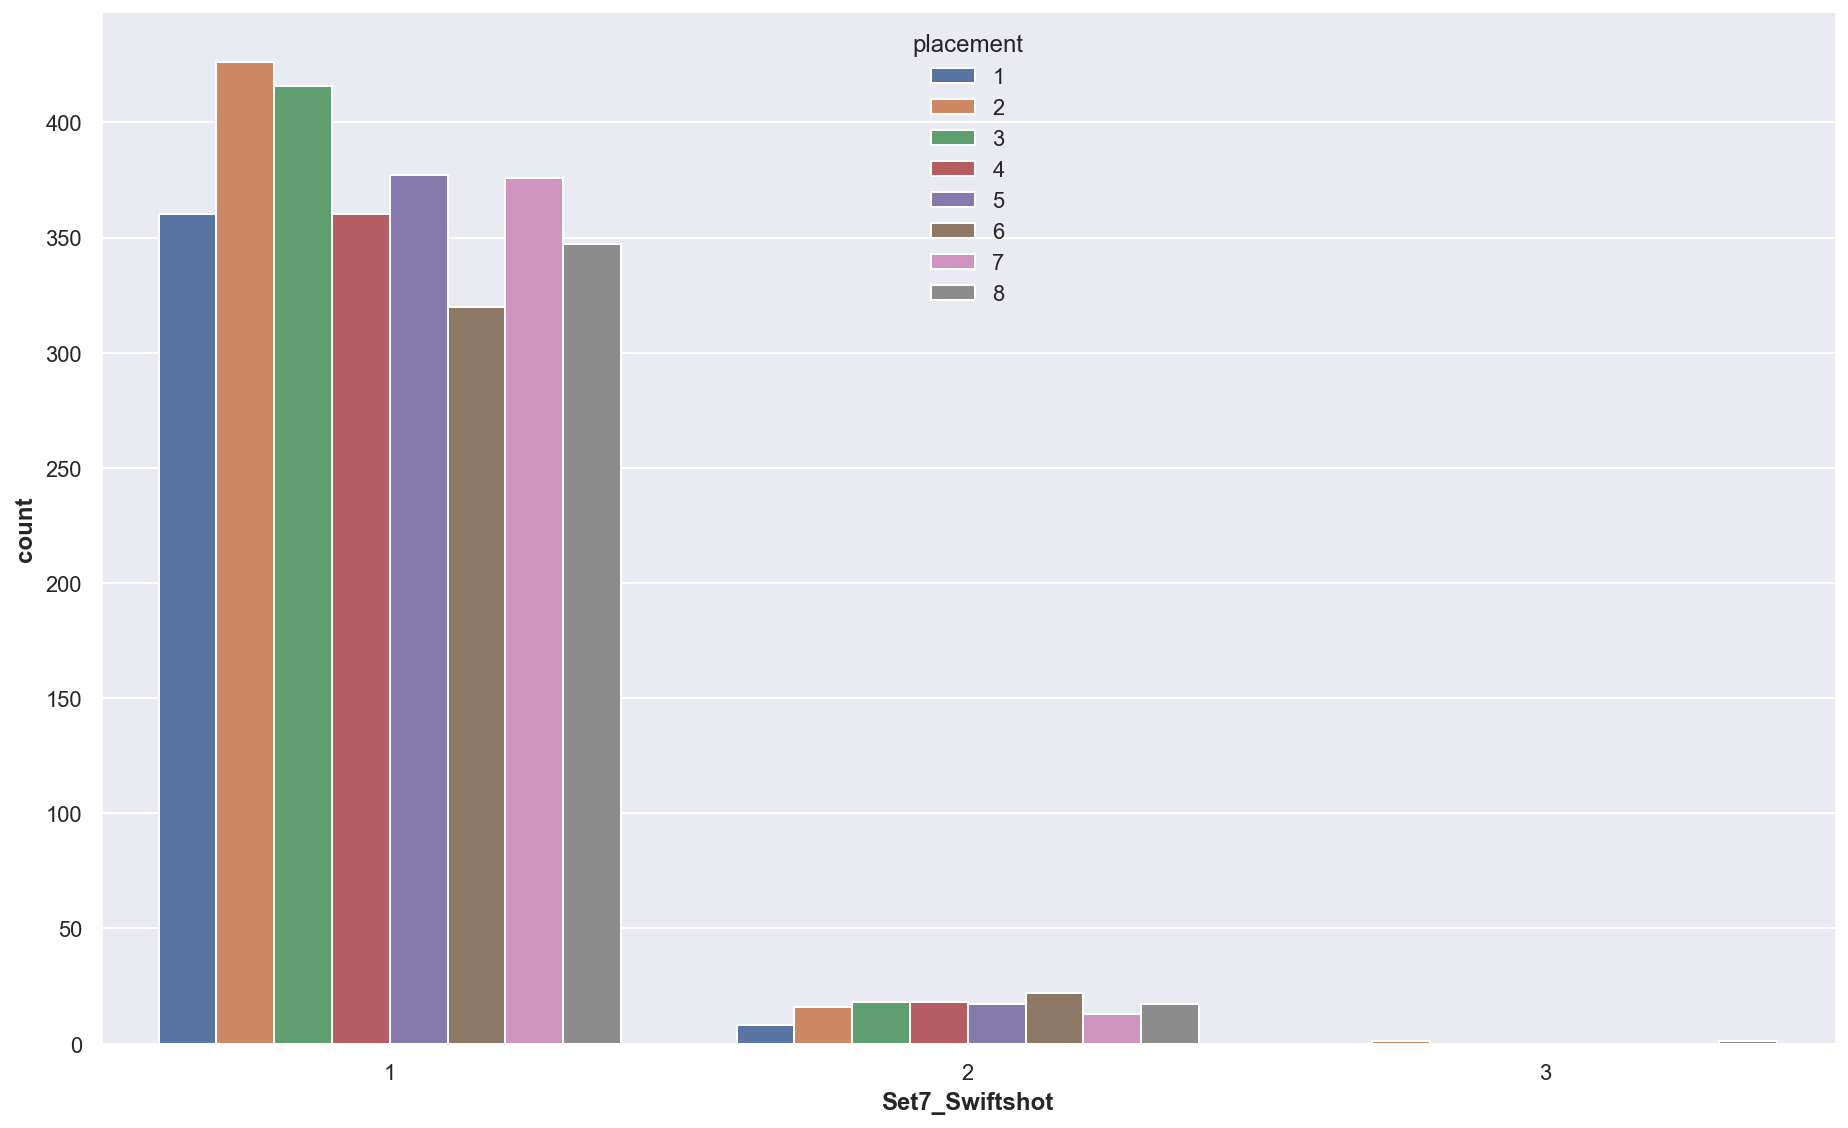

In [374]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Swiftshot']>0], x='Set7_Swiftshot', hue=TARGETNAME)
sns.despine()

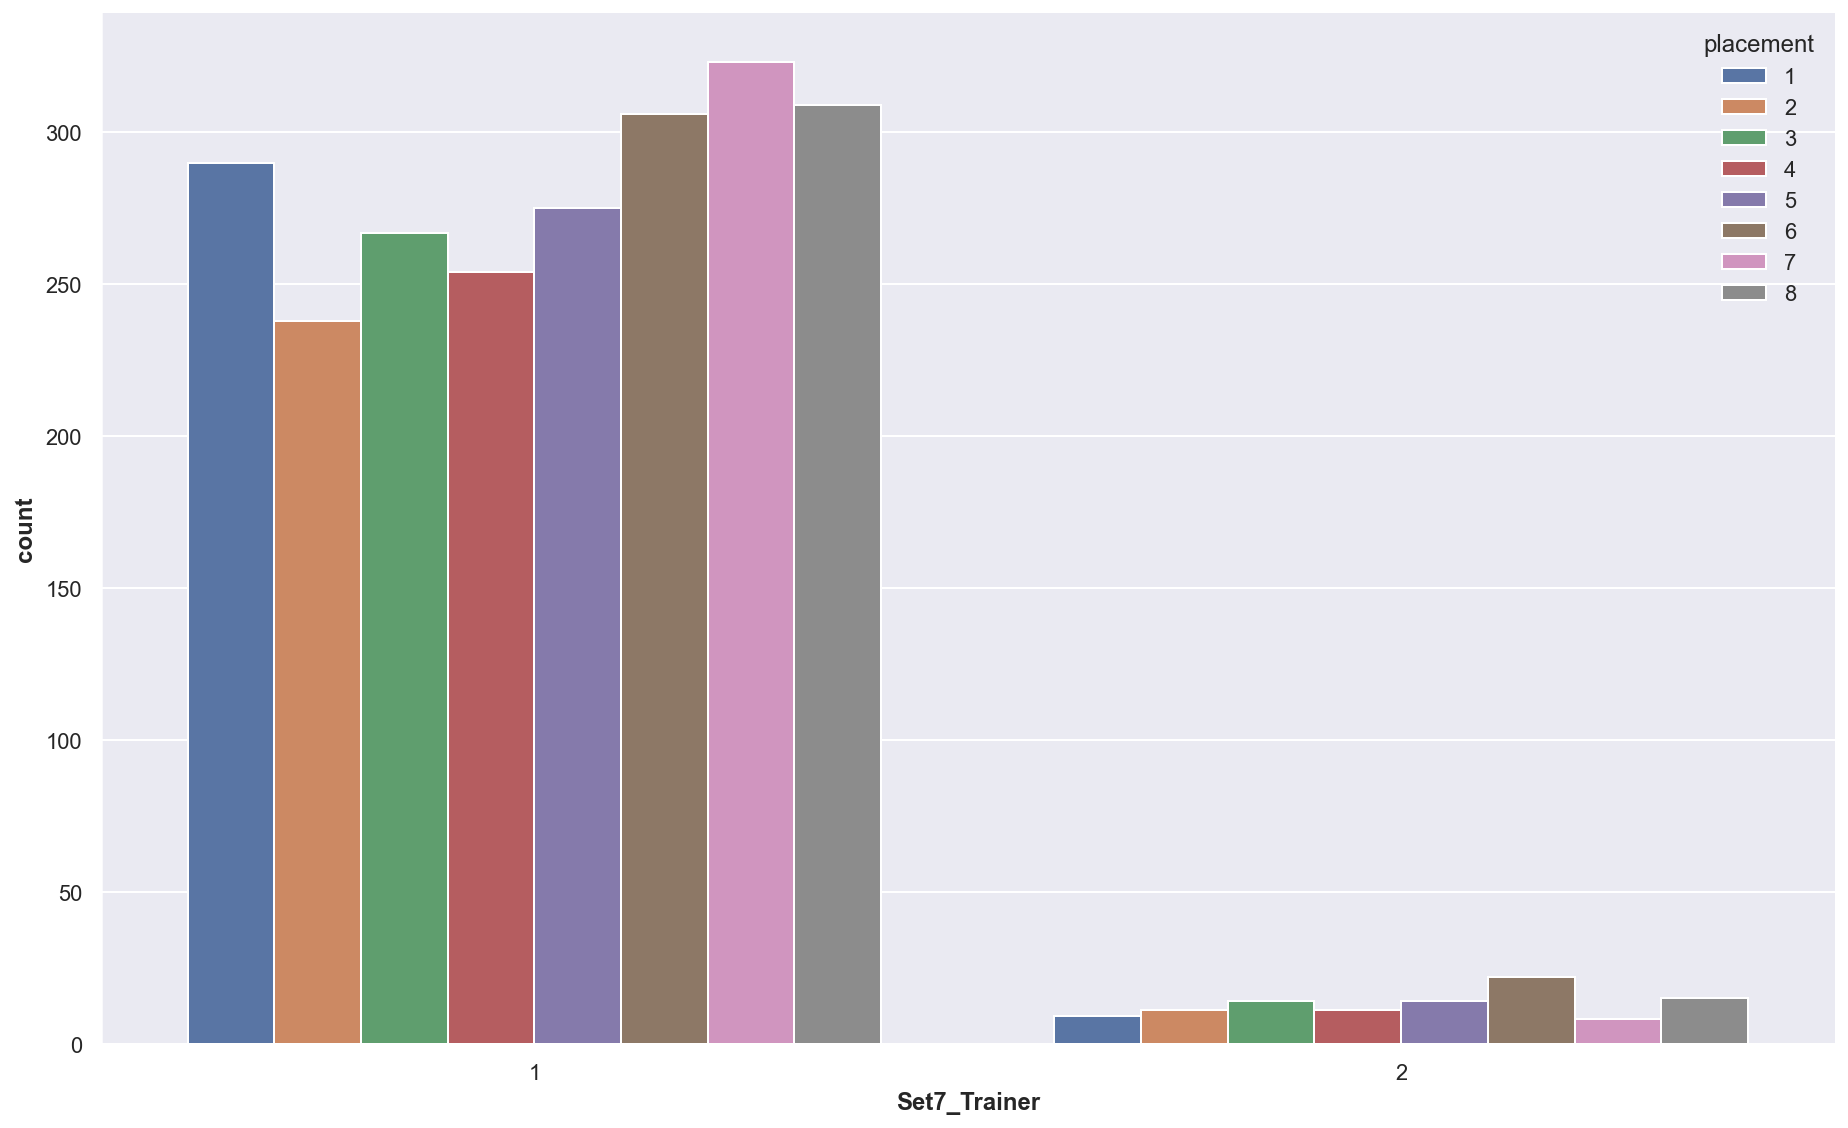

In [375]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Trainer']>0], x='Set7_Trainer', hue=TARGETNAME)
sns.despine()

This trait show the highest correlation in placement.

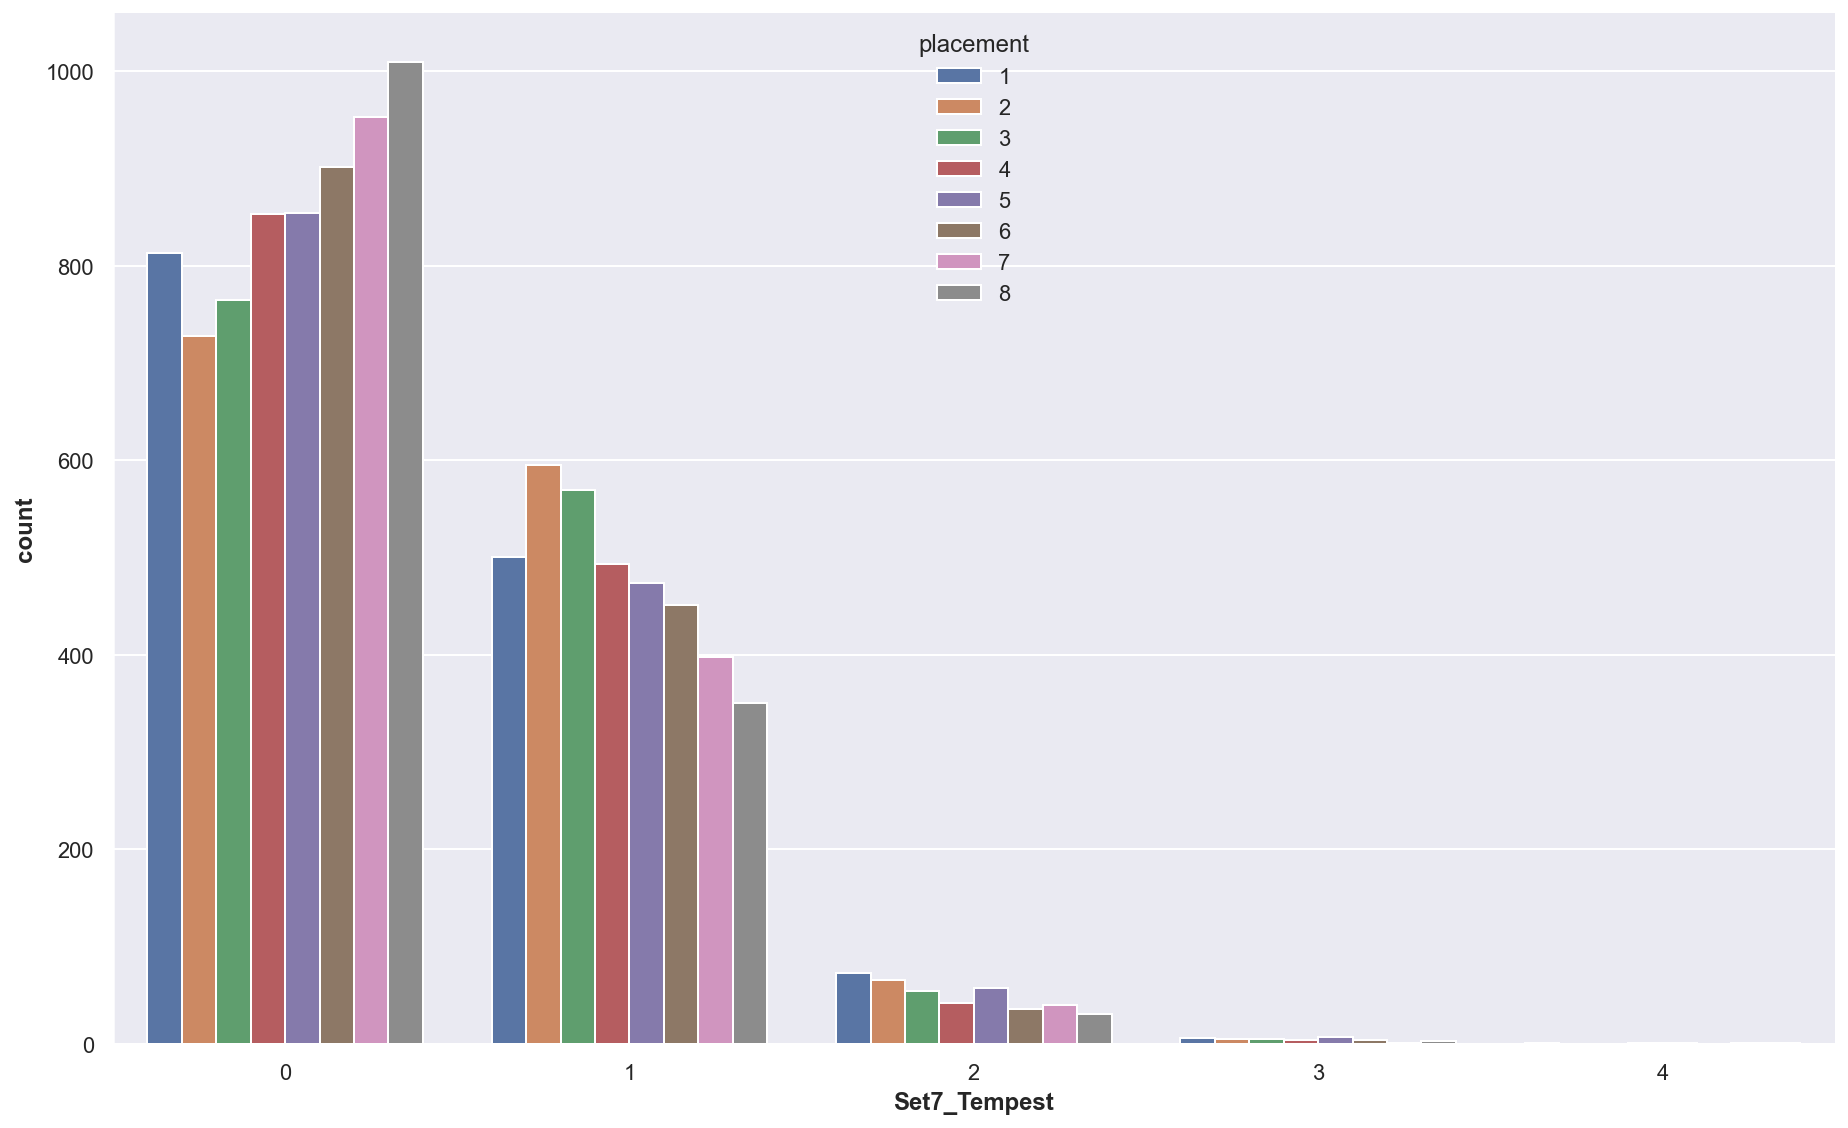

In [376]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Tempest']>=0], x='Set7_Tempest', hue=TARGETNAME)
sns.despine()

Stronger correlation at trait lvl 1.

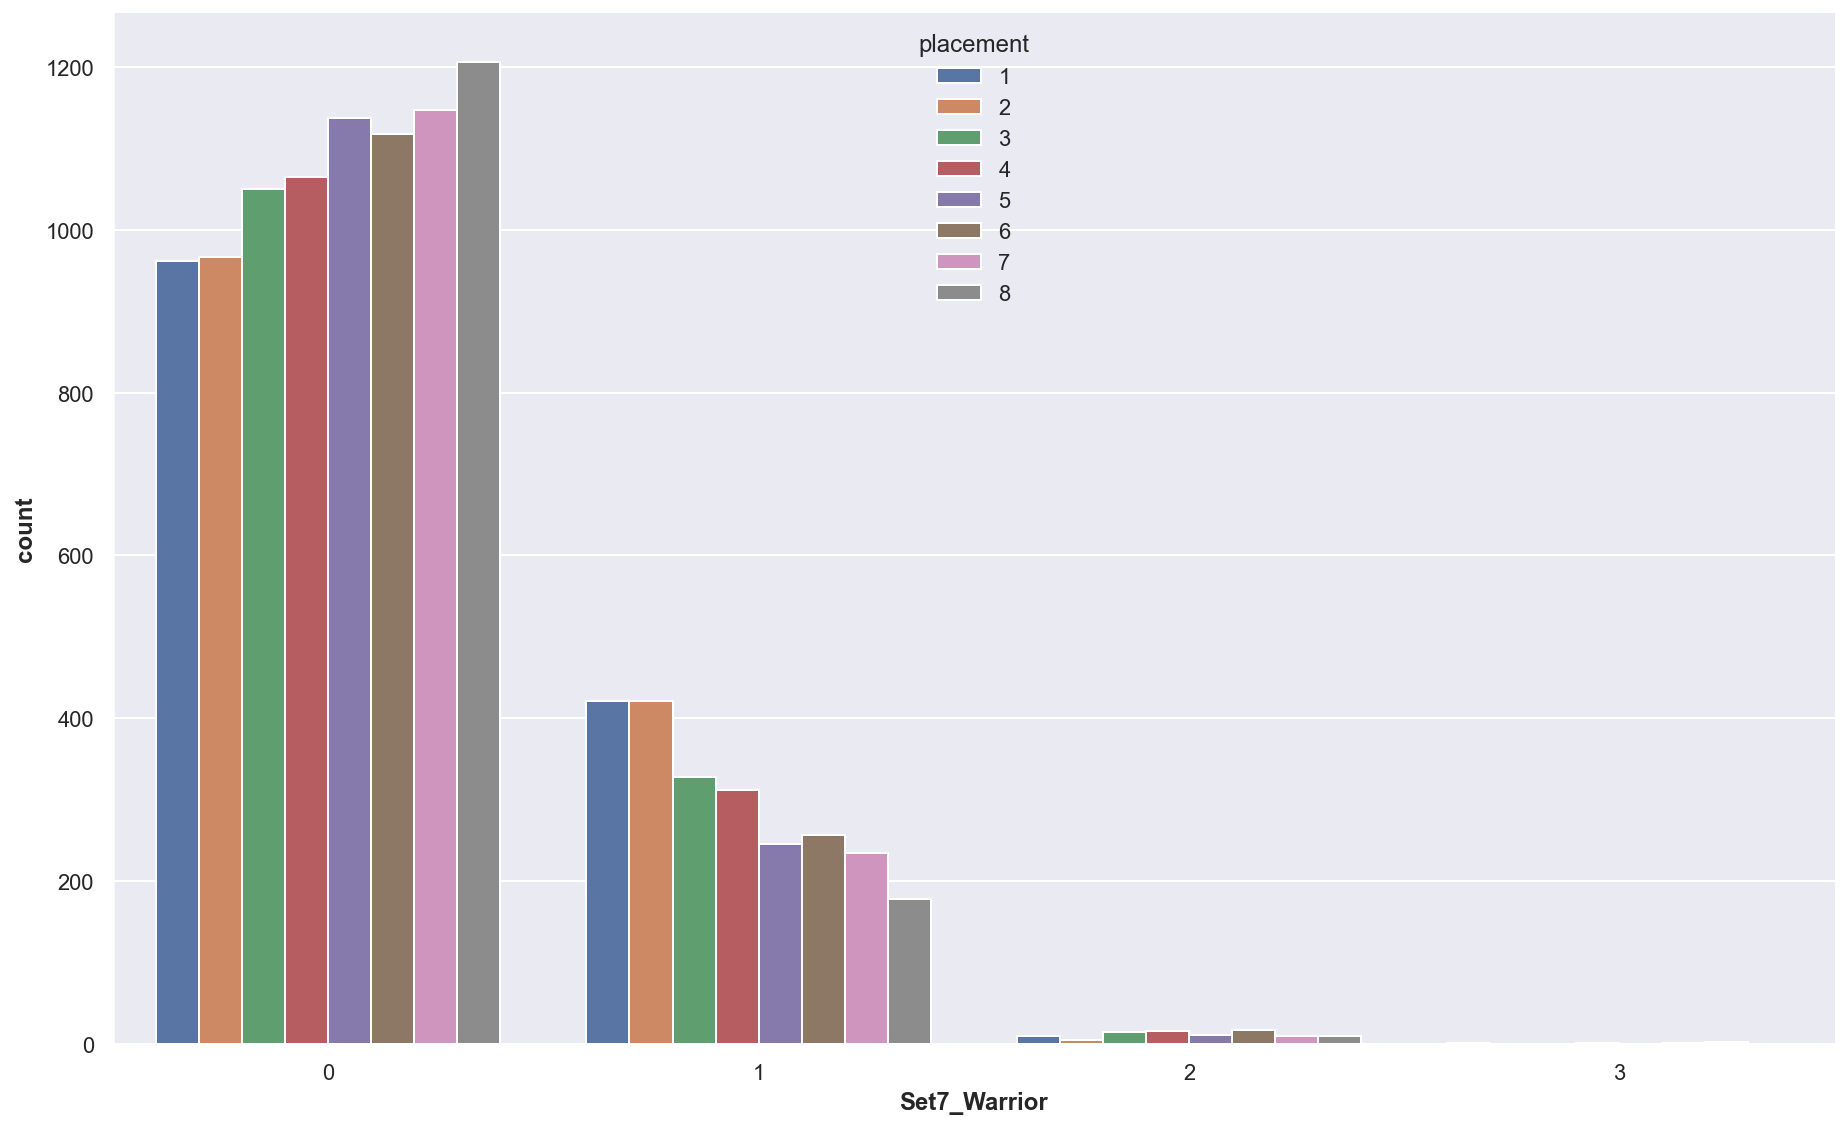

In [377]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Warrior']>=0], x='Set7_Warrior', hue=TARGETNAME)
sns.despine()

# Units

Best unit in TFT Yasuo. DIESOFYASUO

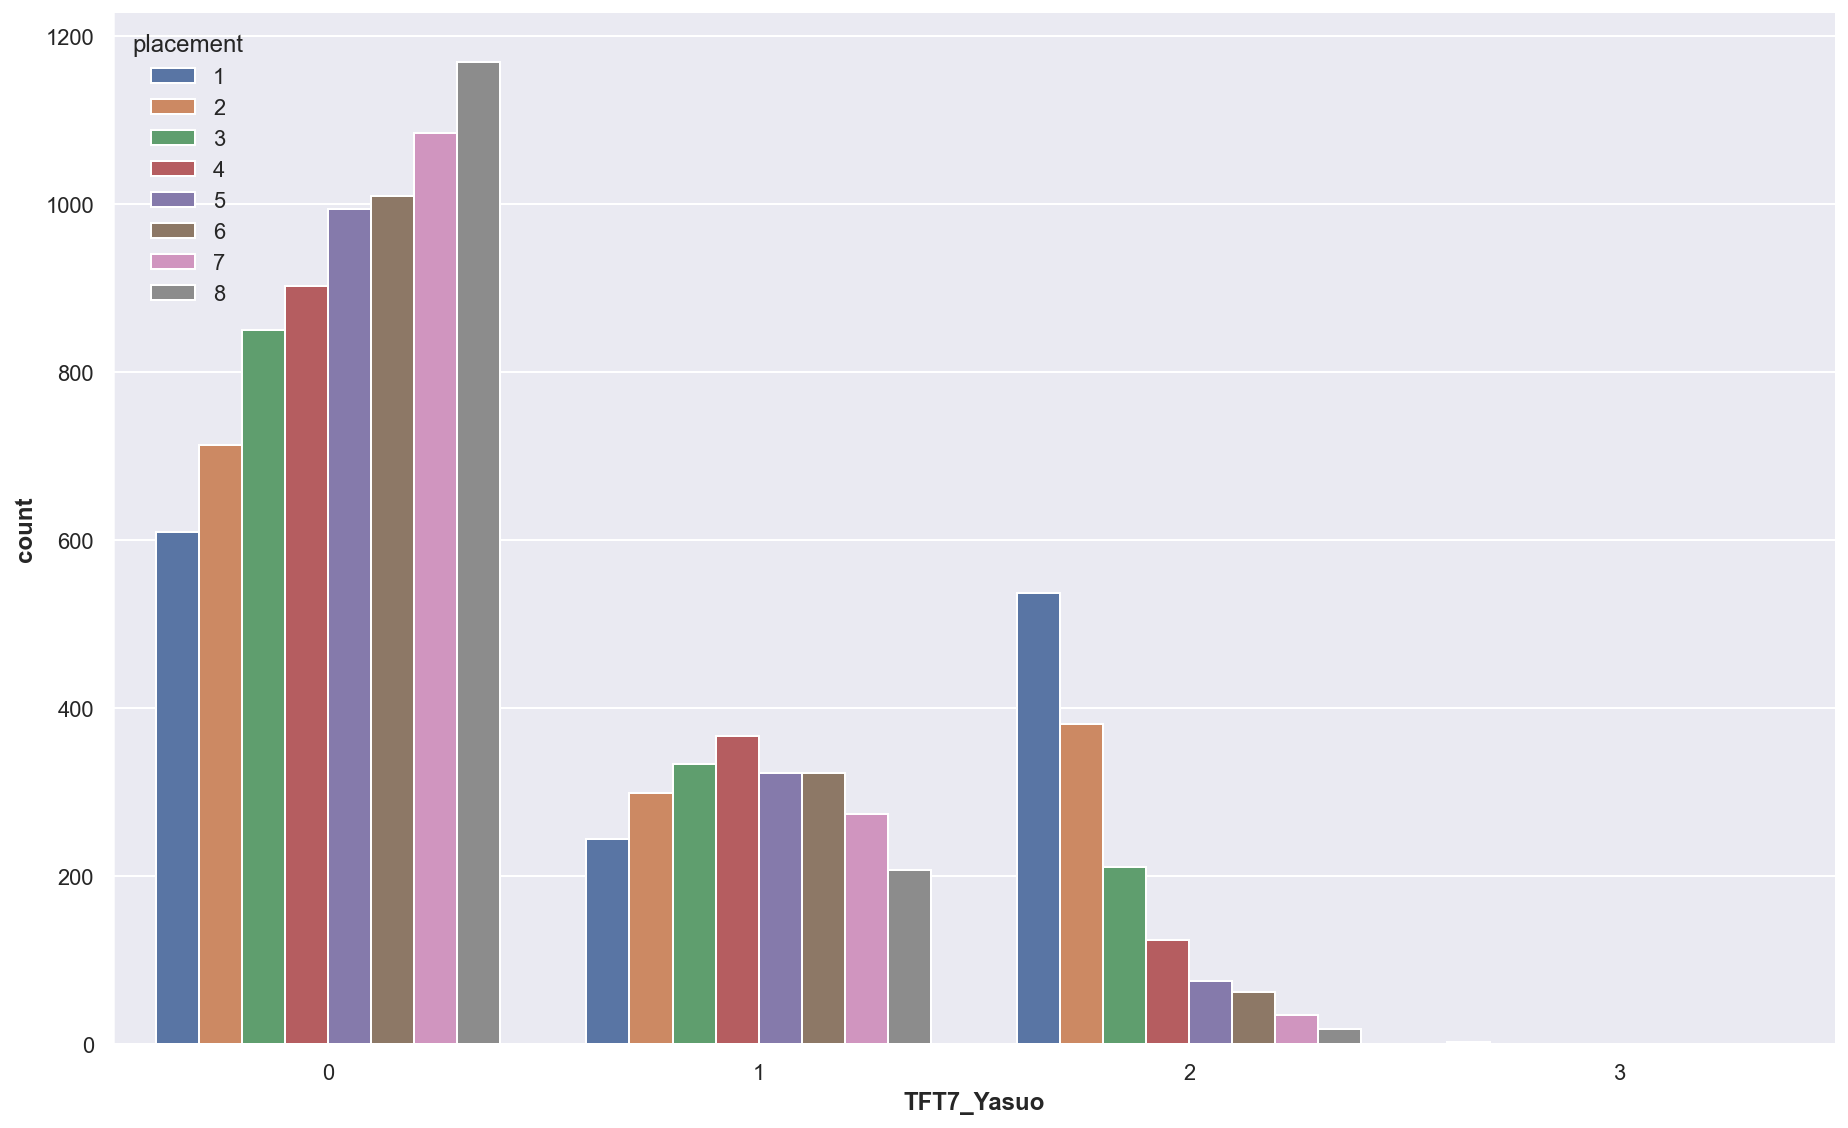

In [378]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Yasuo', hue=TARGETNAME)
sns.despine()

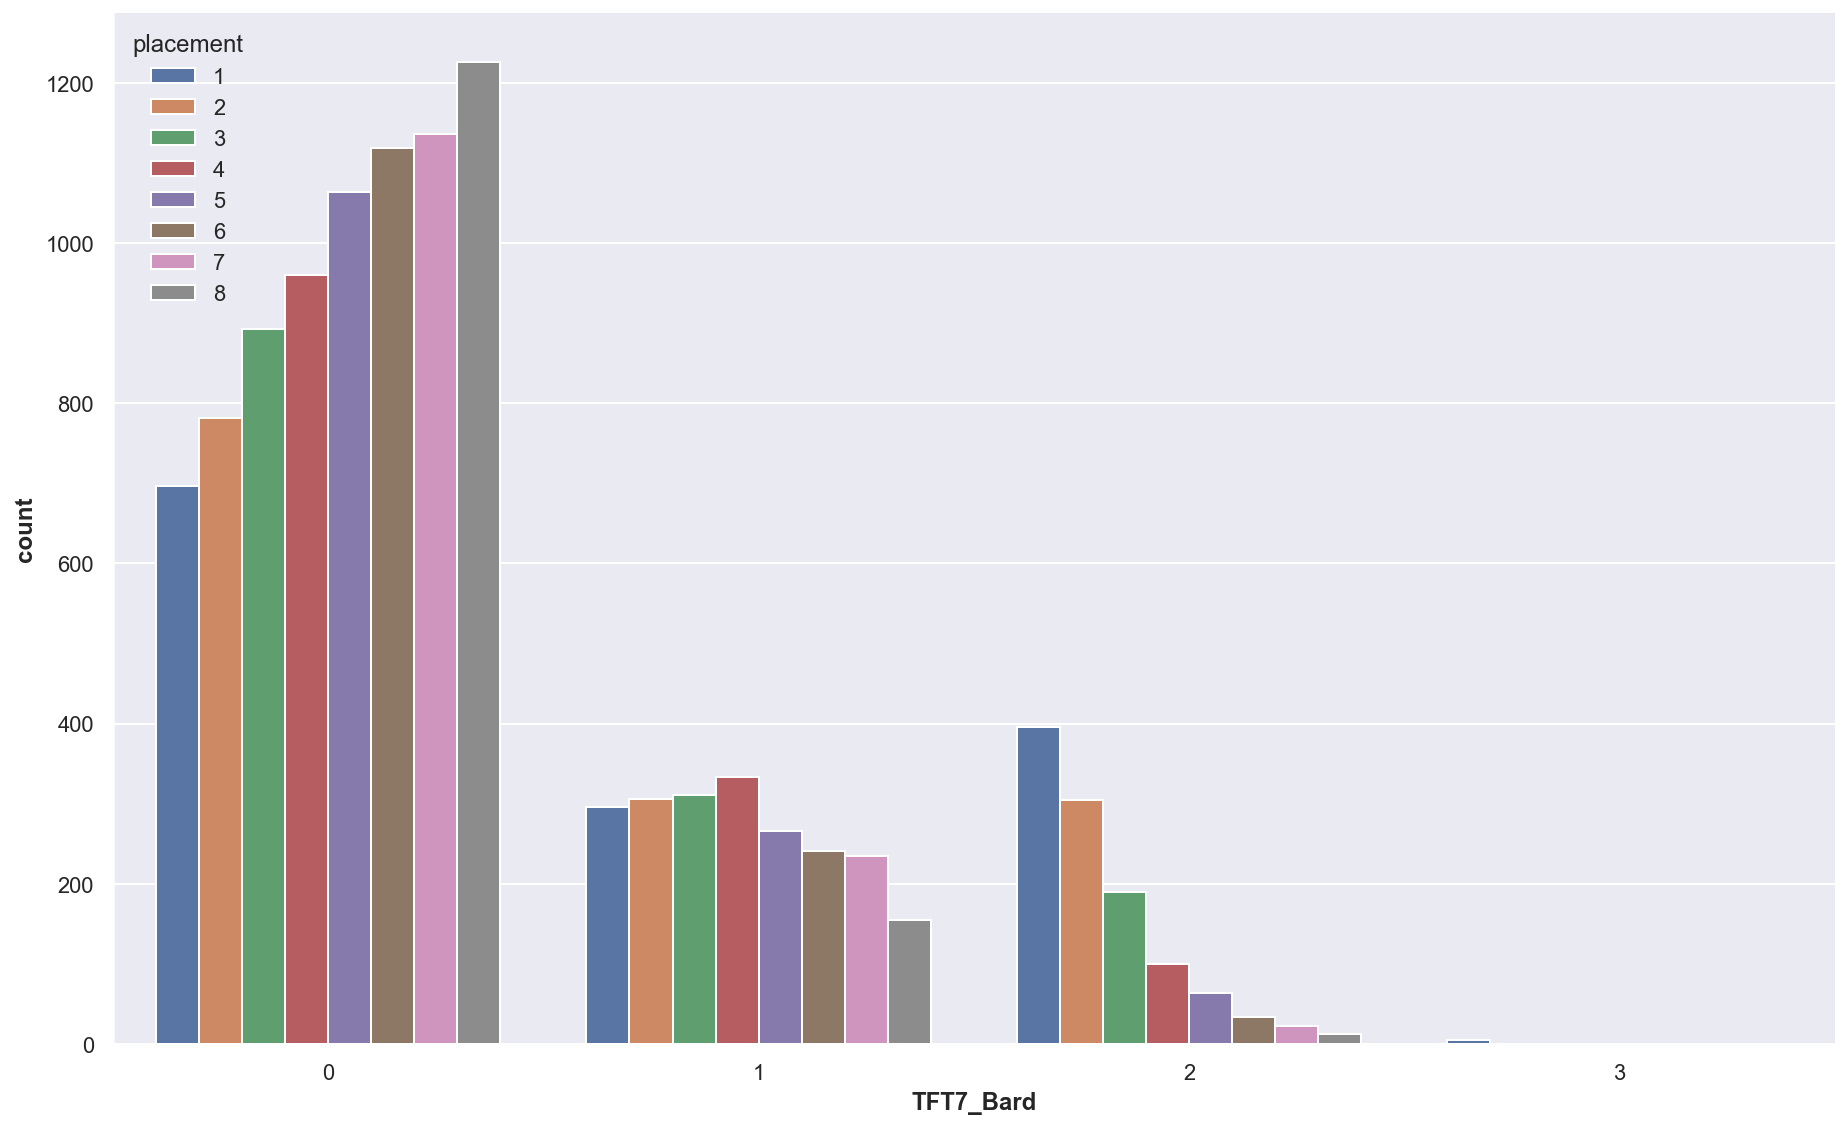

In [379]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Bard', hue=TARGETNAME)
sns.despine()

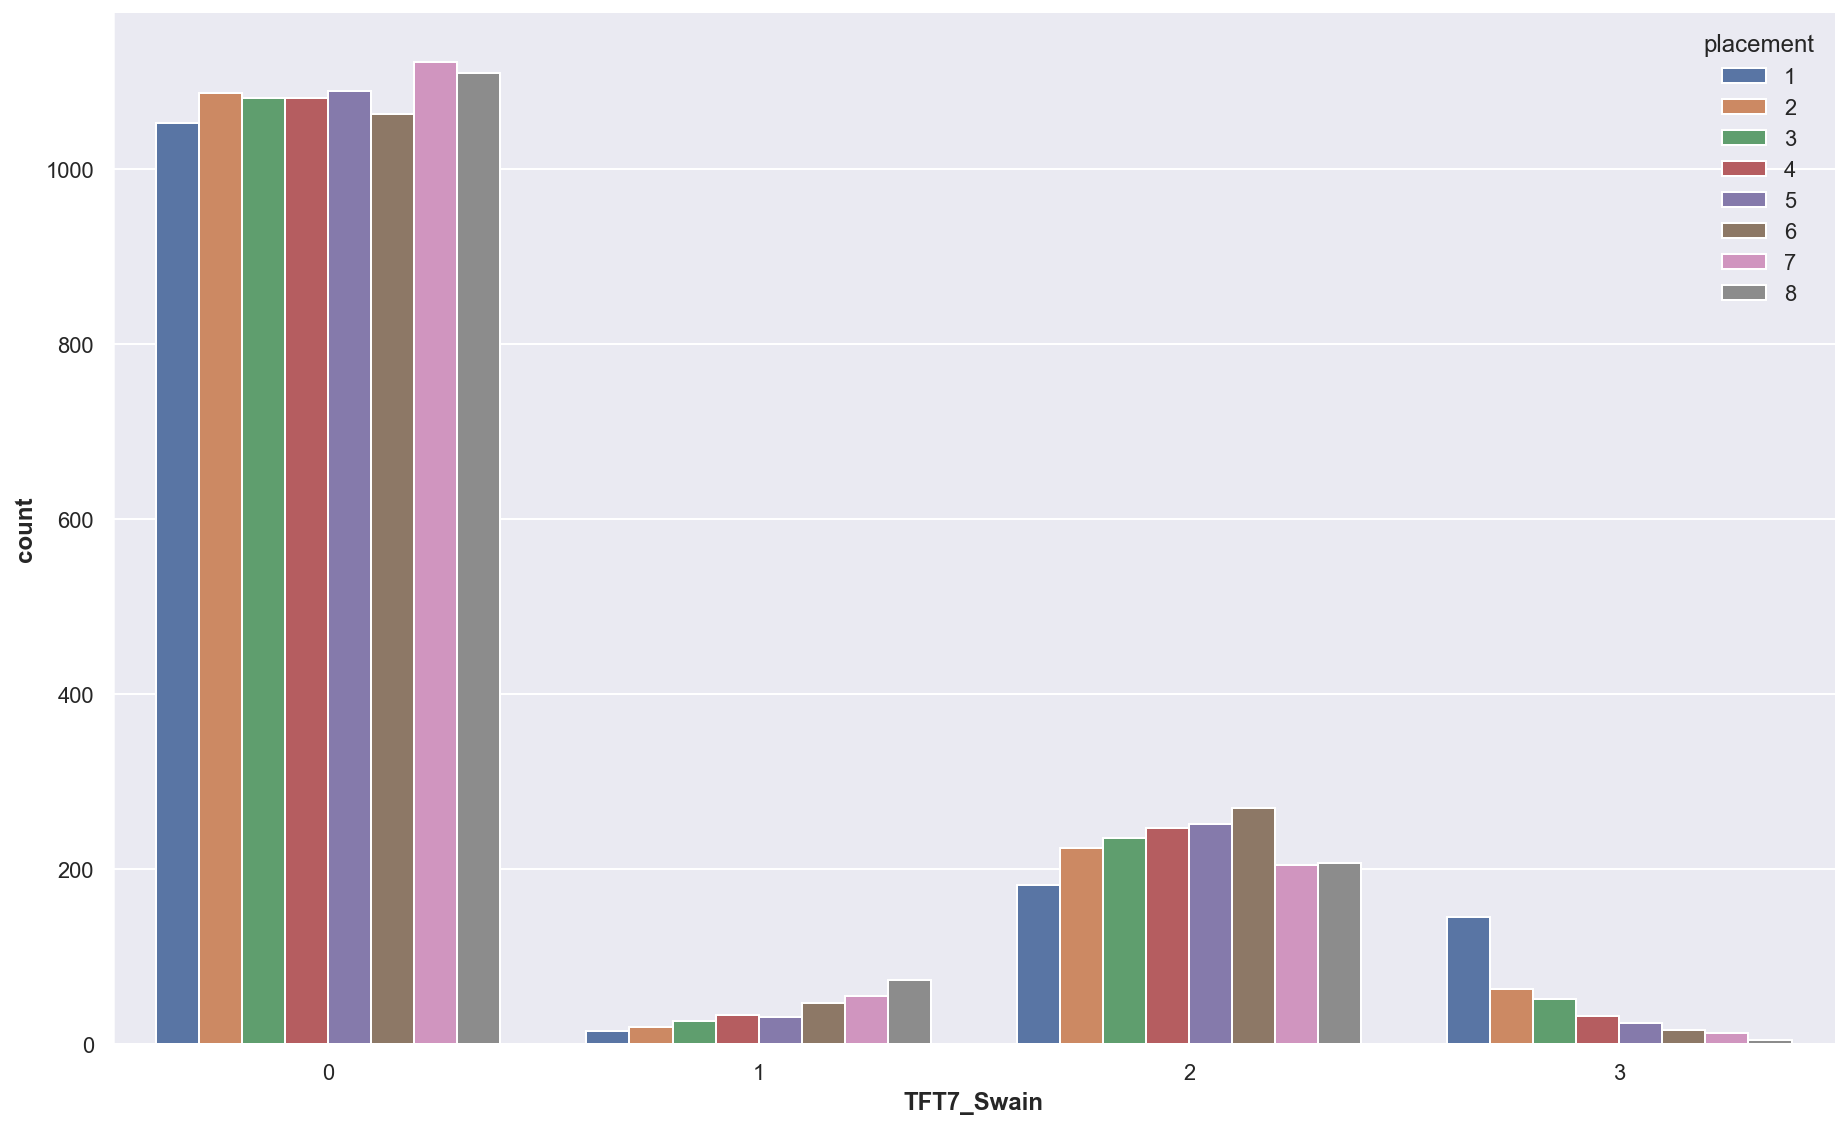

In [380]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Swain', hue=TARGETNAME)
sns.despine()

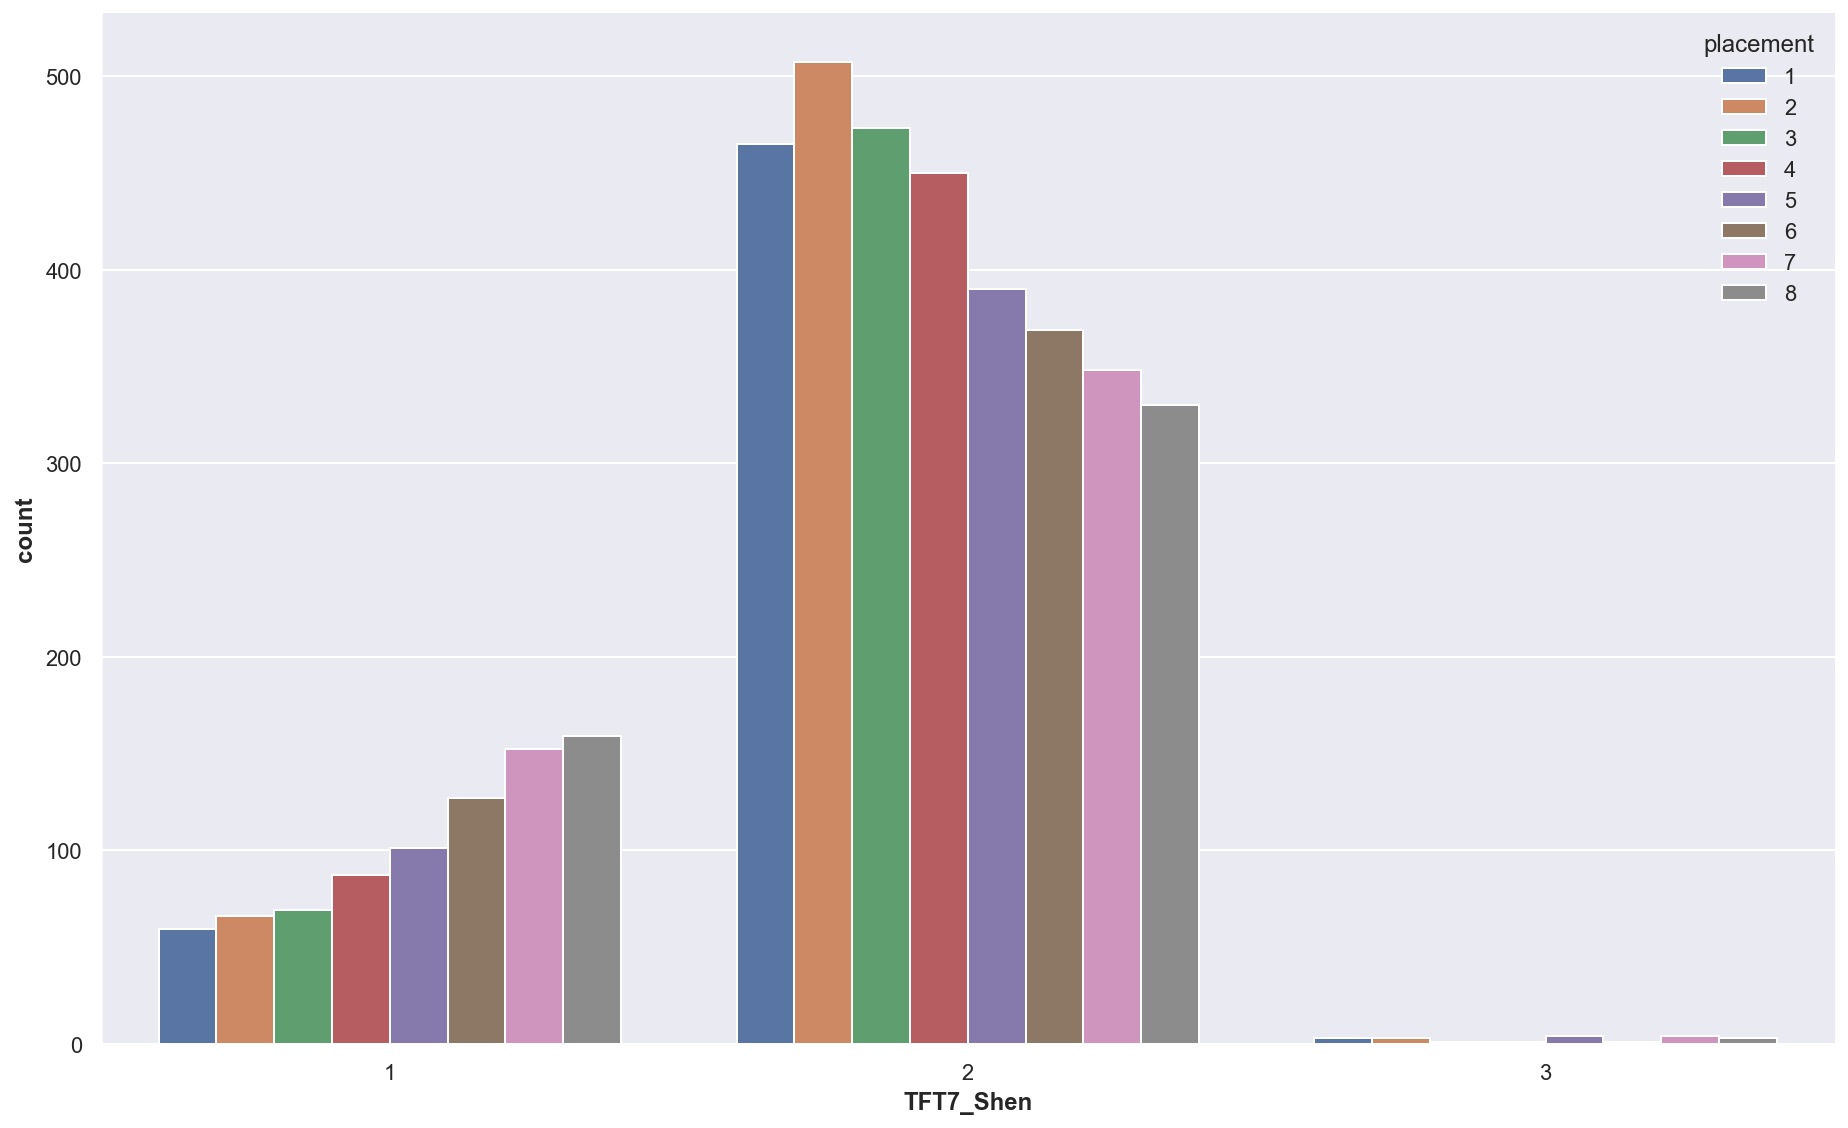

In [381]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shen']>0], x='TFT7_Shen', hue=TARGETNAME)
sns.despine()

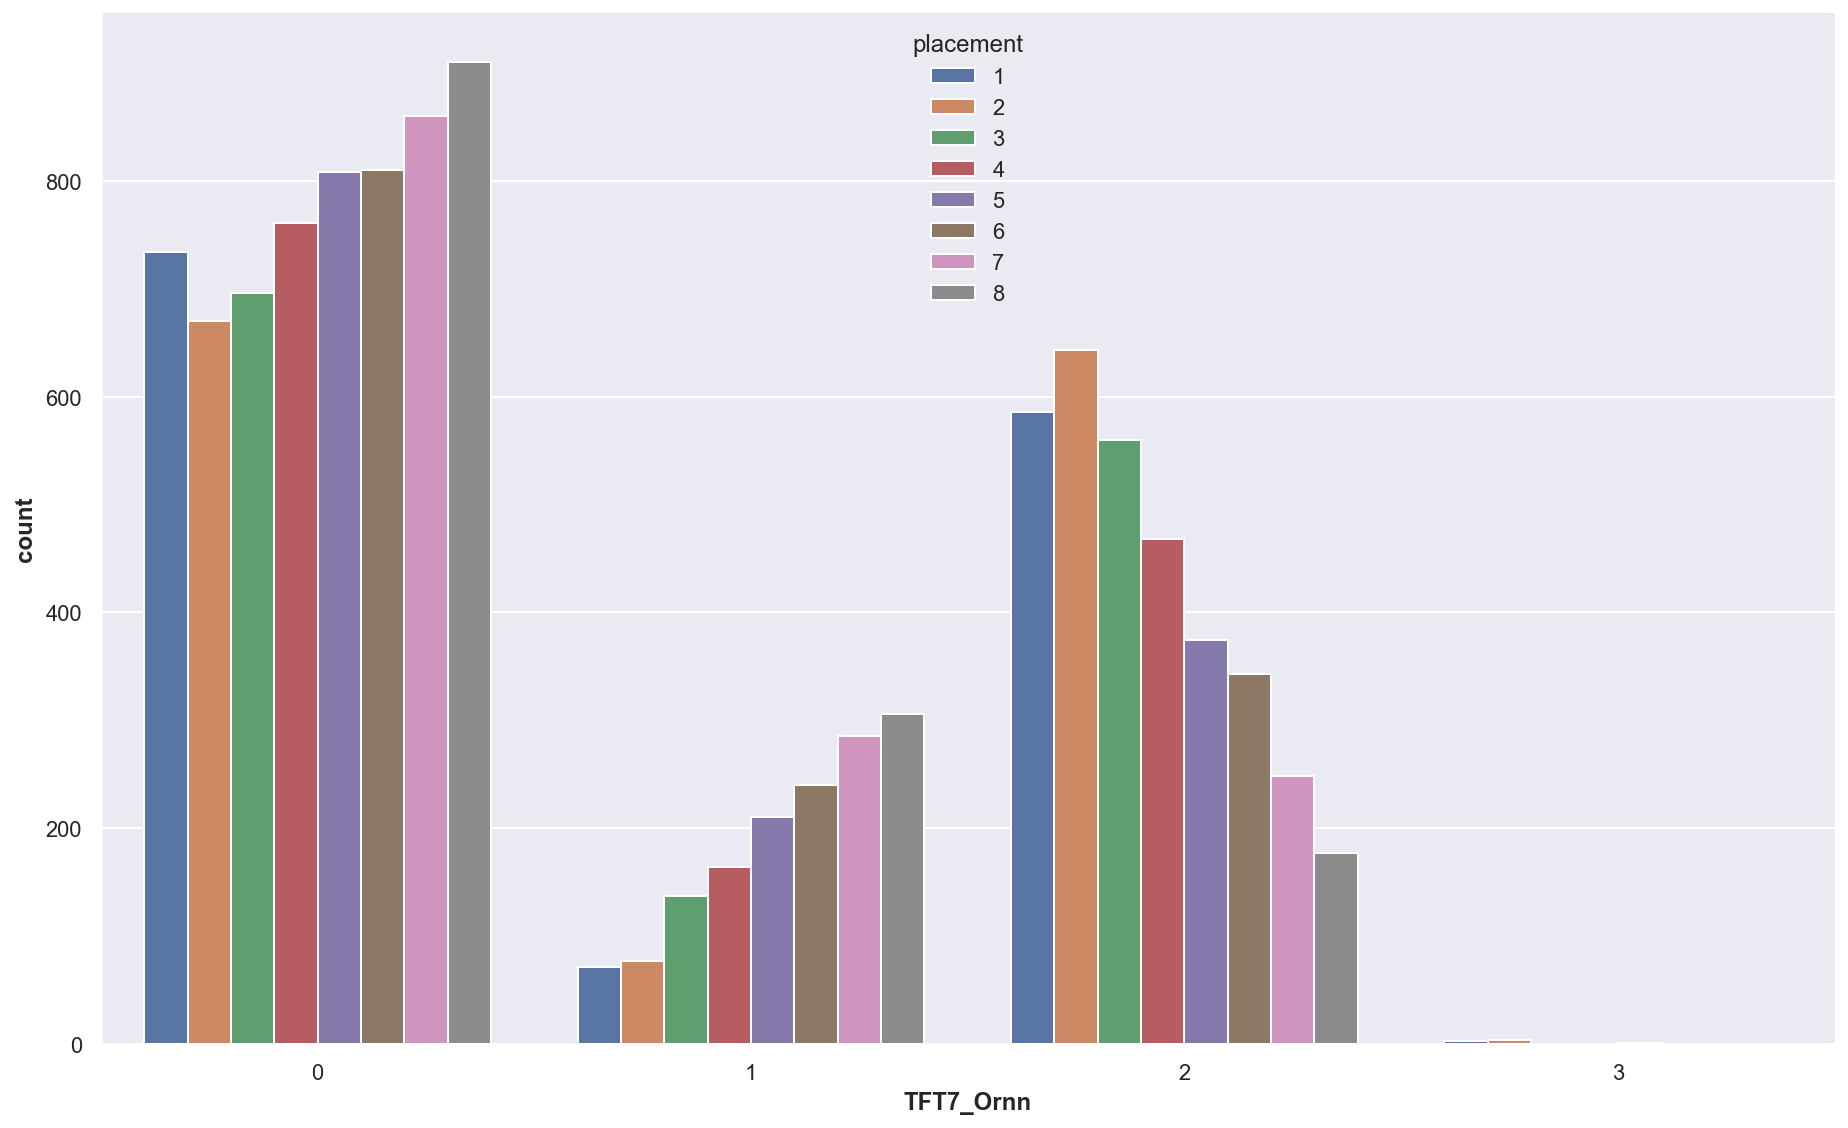

In [382]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ornn']>=0], x='TFT7_Ornn', hue=TARGETNAME)
sns.despine()

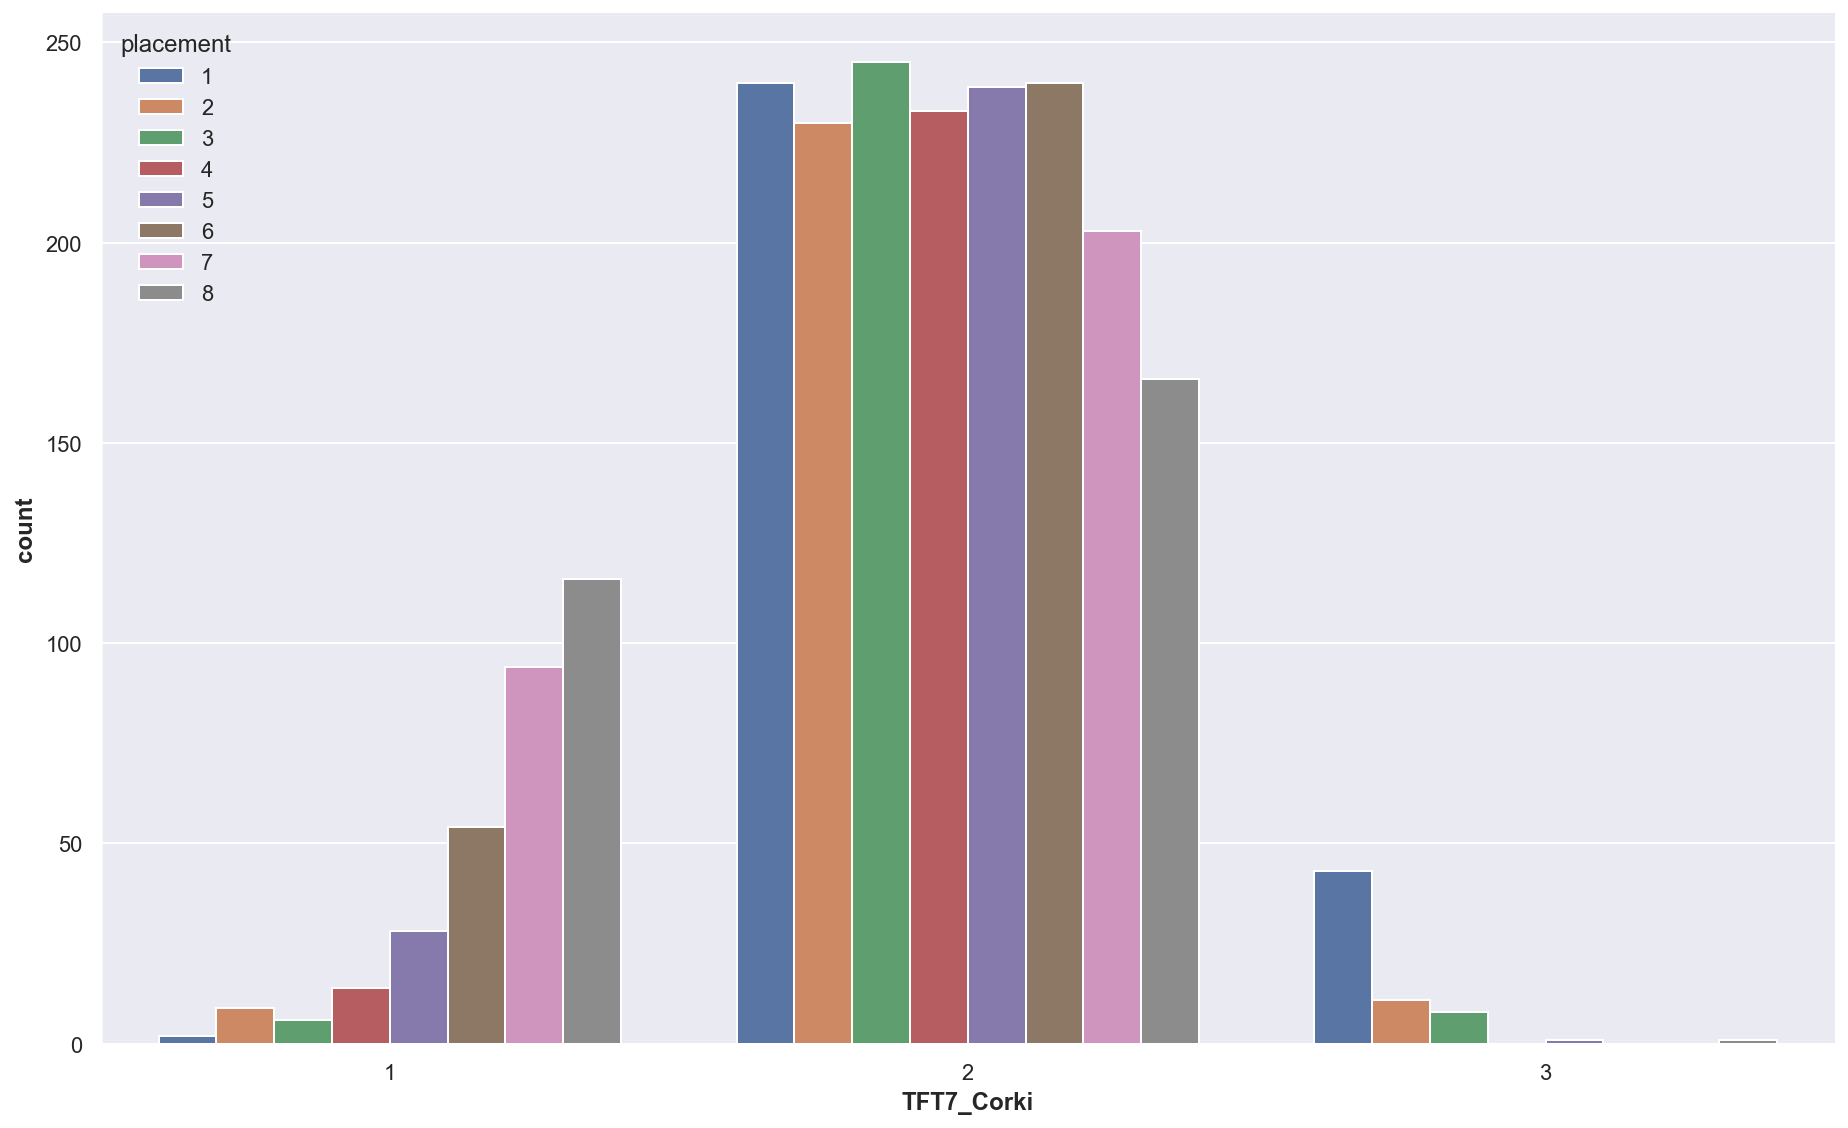

In [383]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Corki']>0], x='TFT7_Corki', hue=TARGETNAME)
sns.despine()

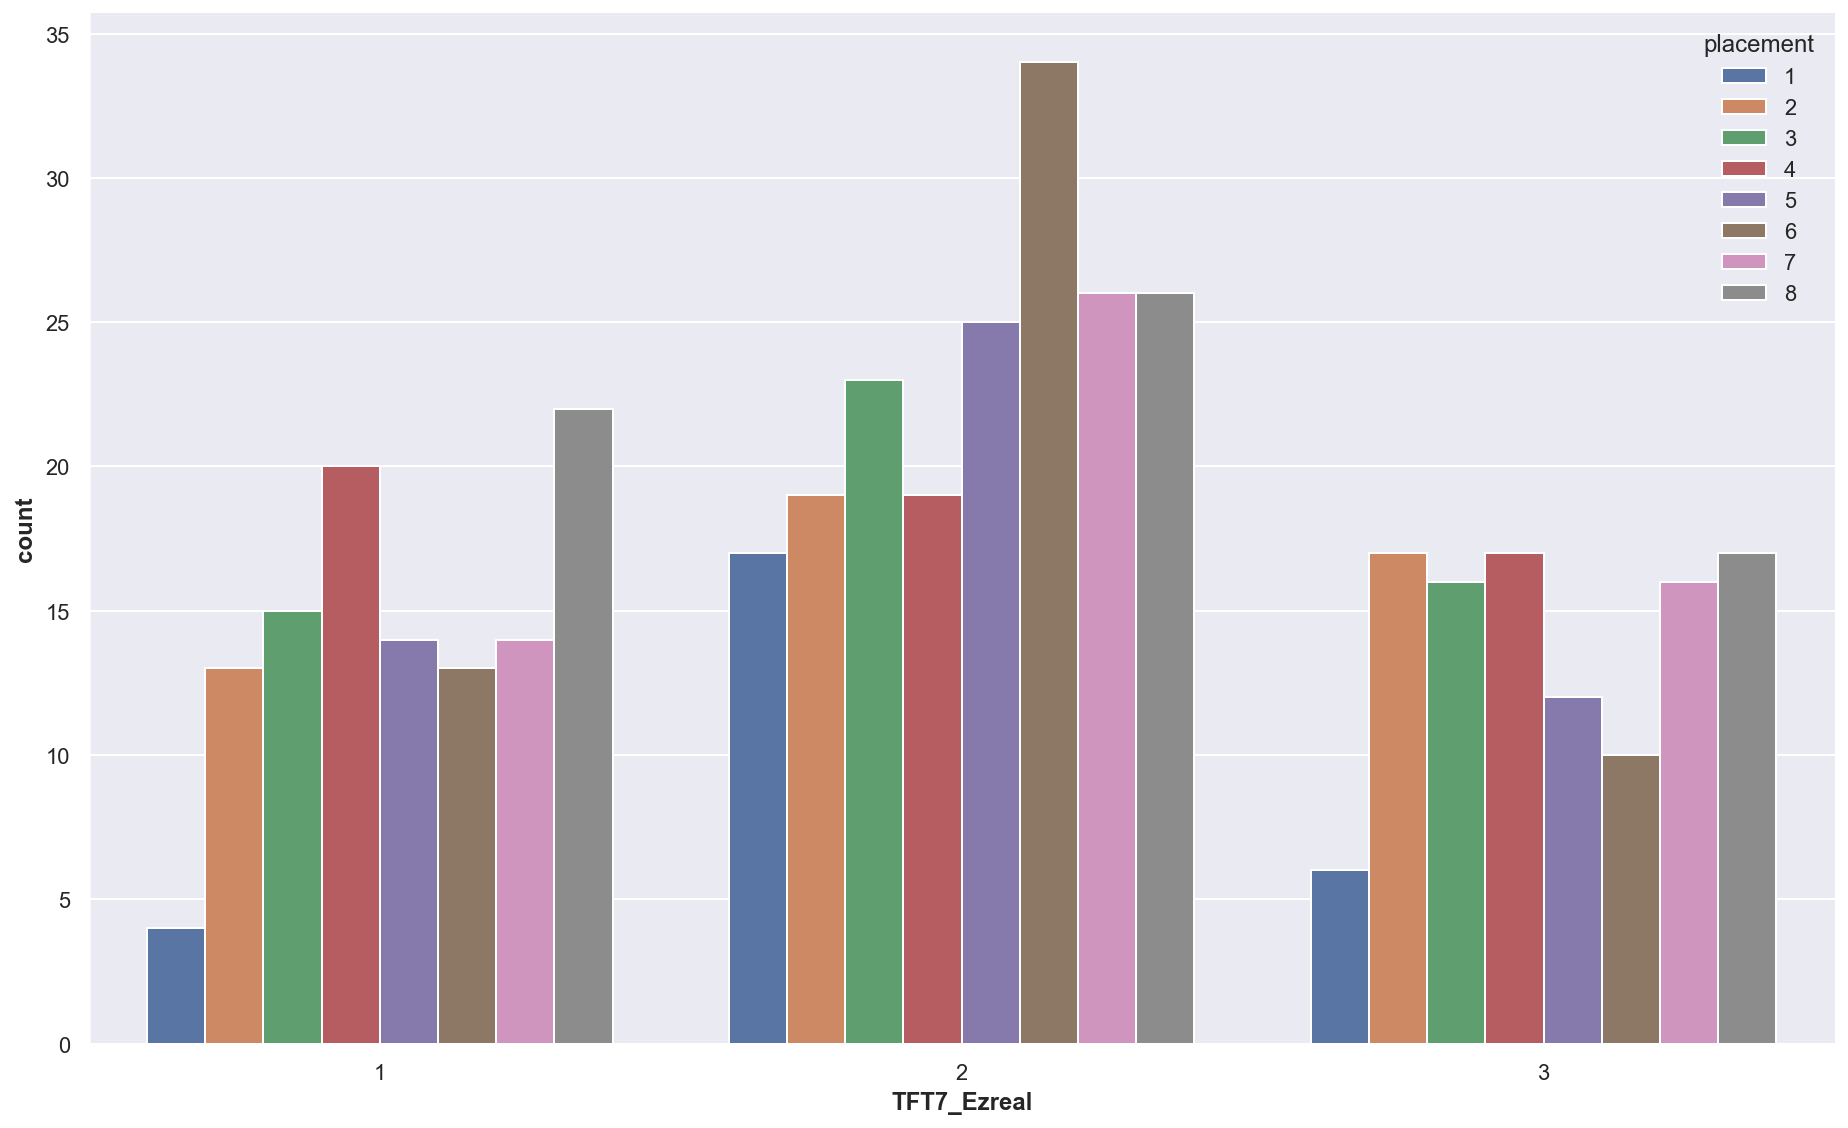

In [384]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ezreal']>0], x='TFT7_Ezreal', hue=TARGETNAME)
sns.despine()

Daeja.


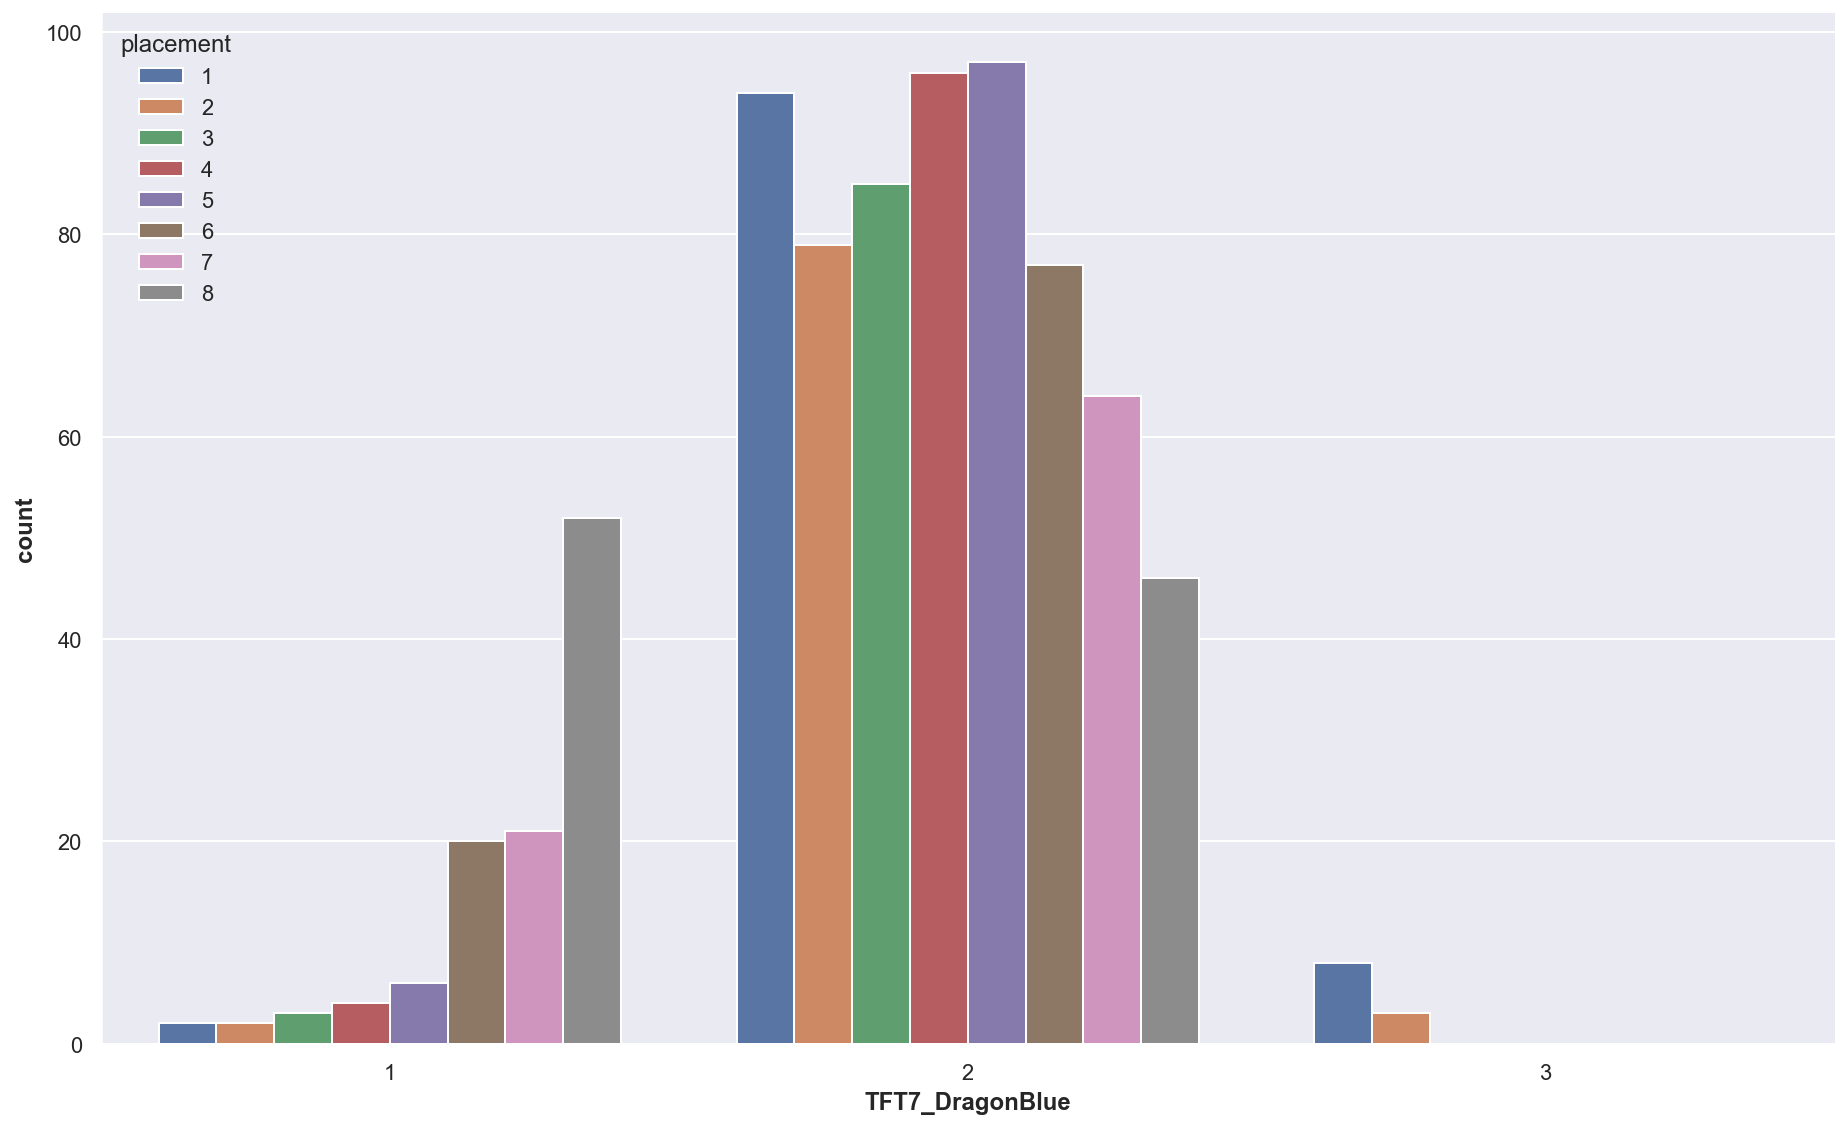

In [385]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonBlue']>0], x='TFT7_DragonBlue', hue=TARGETNAME)
sns.despine()

Nomsy best dragon at tier 4.

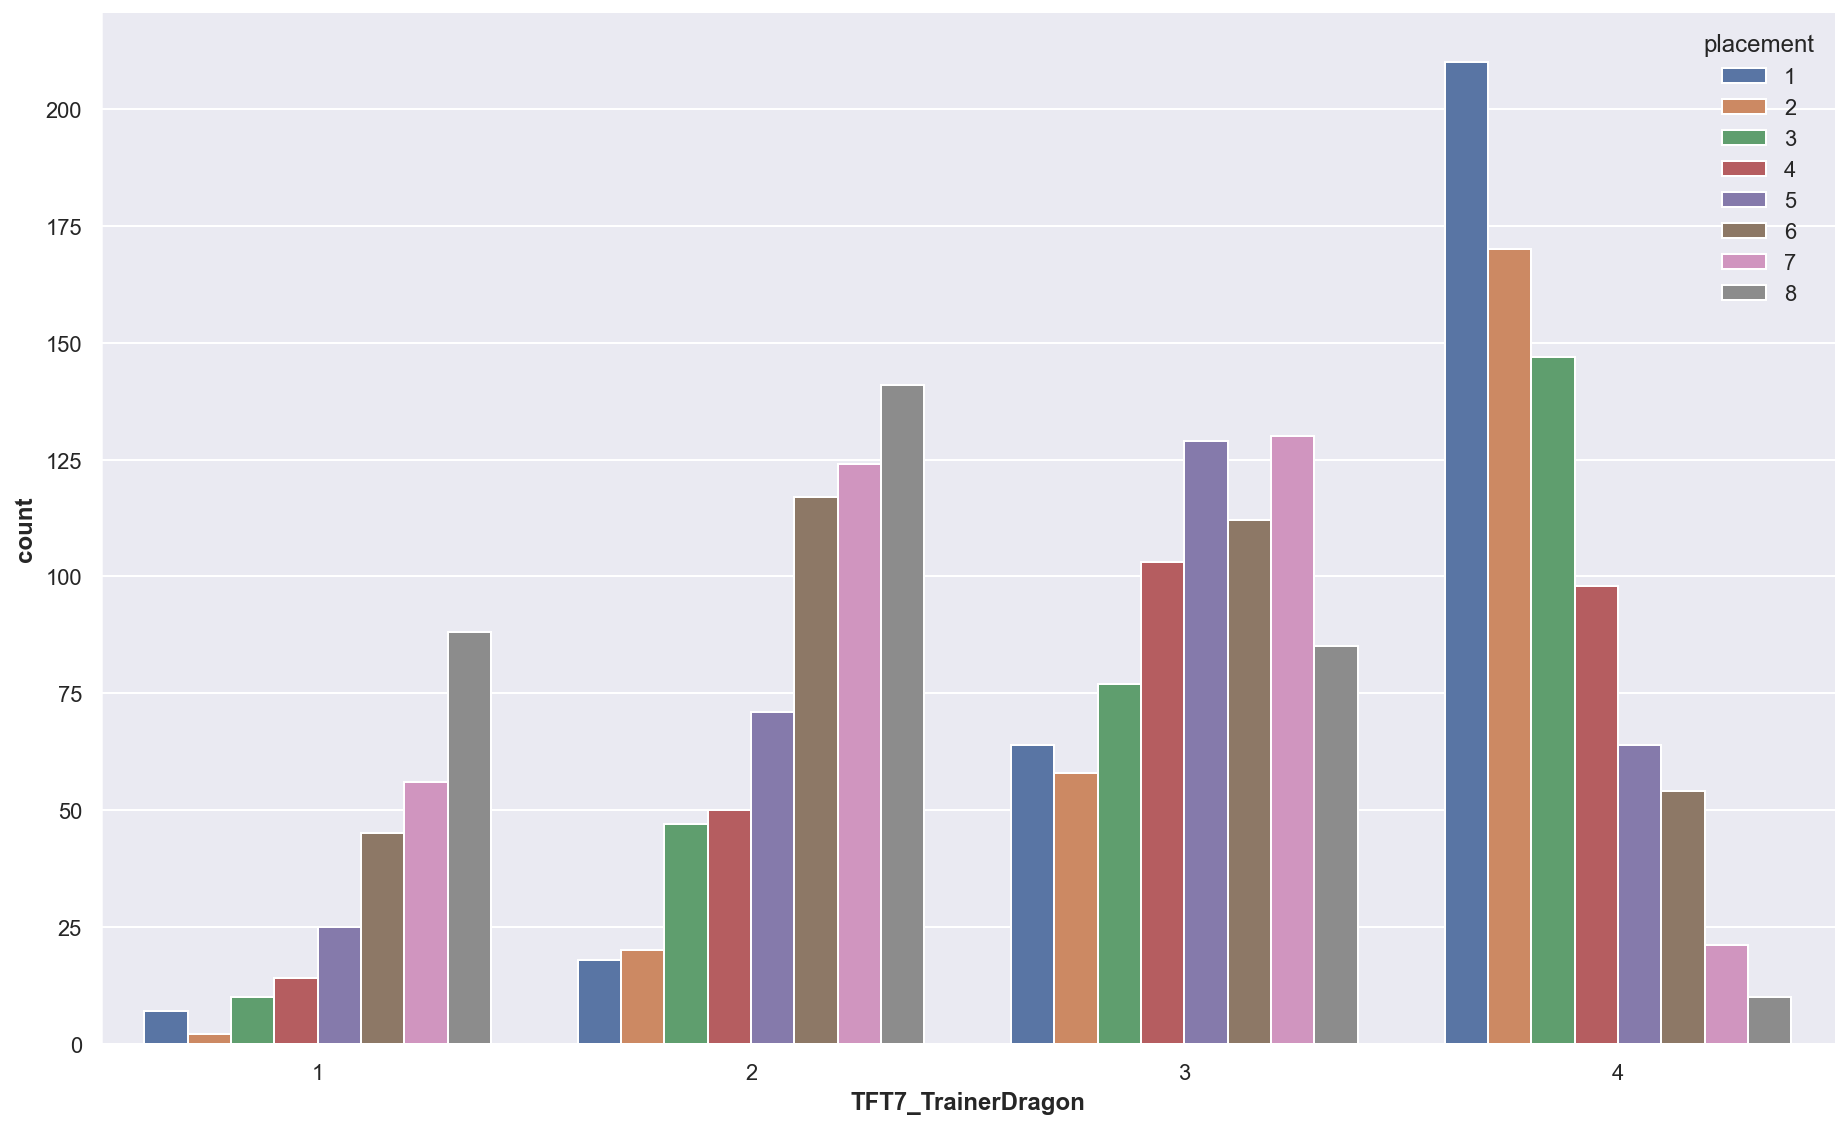

In [386]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_TrainerDragon']>0], x='TFT7_TrainerDragon', hue=TARGETNAME)
sns.despine()

Huge difference between holding Neeko1 and Neeko2.


sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Neeko']>0], x='TFT7_Neeko', hue=TARGETNAME)
sns.despine()

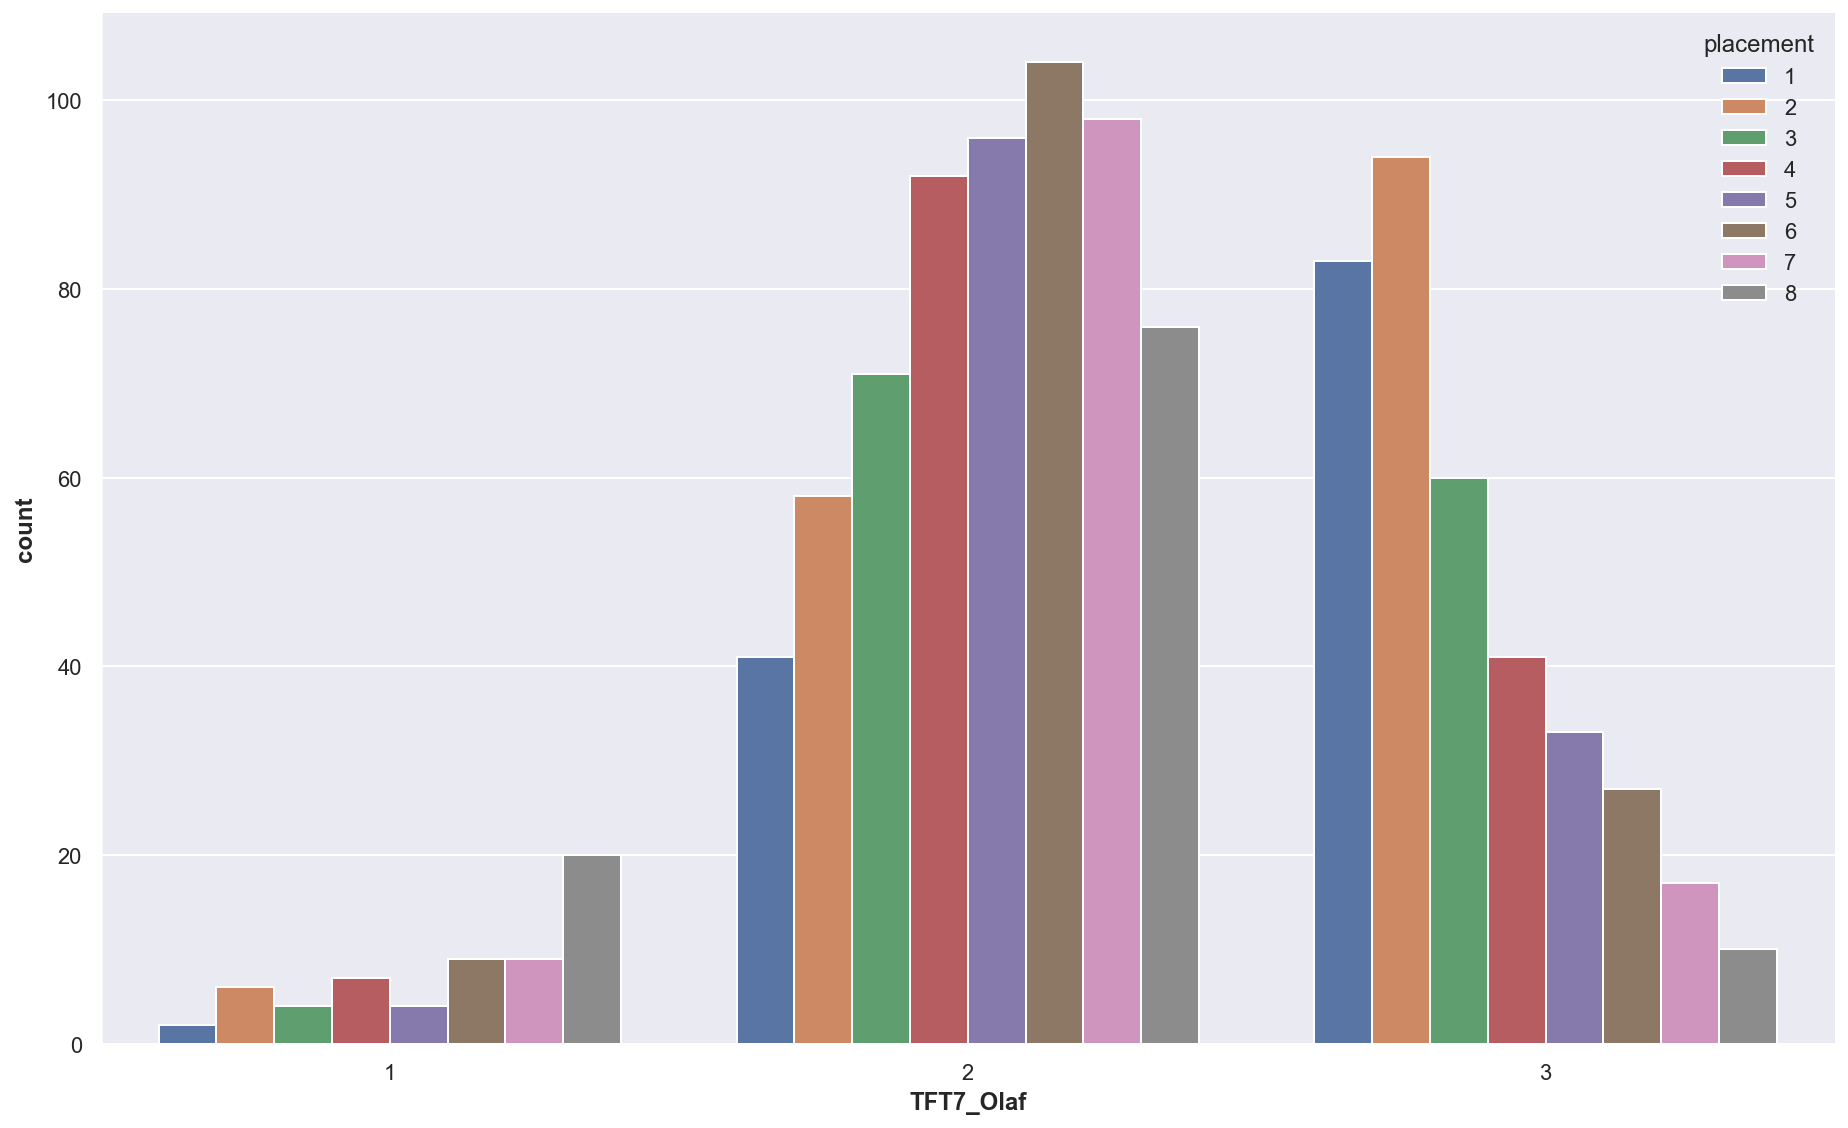

In [387]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Olaf']>0], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units

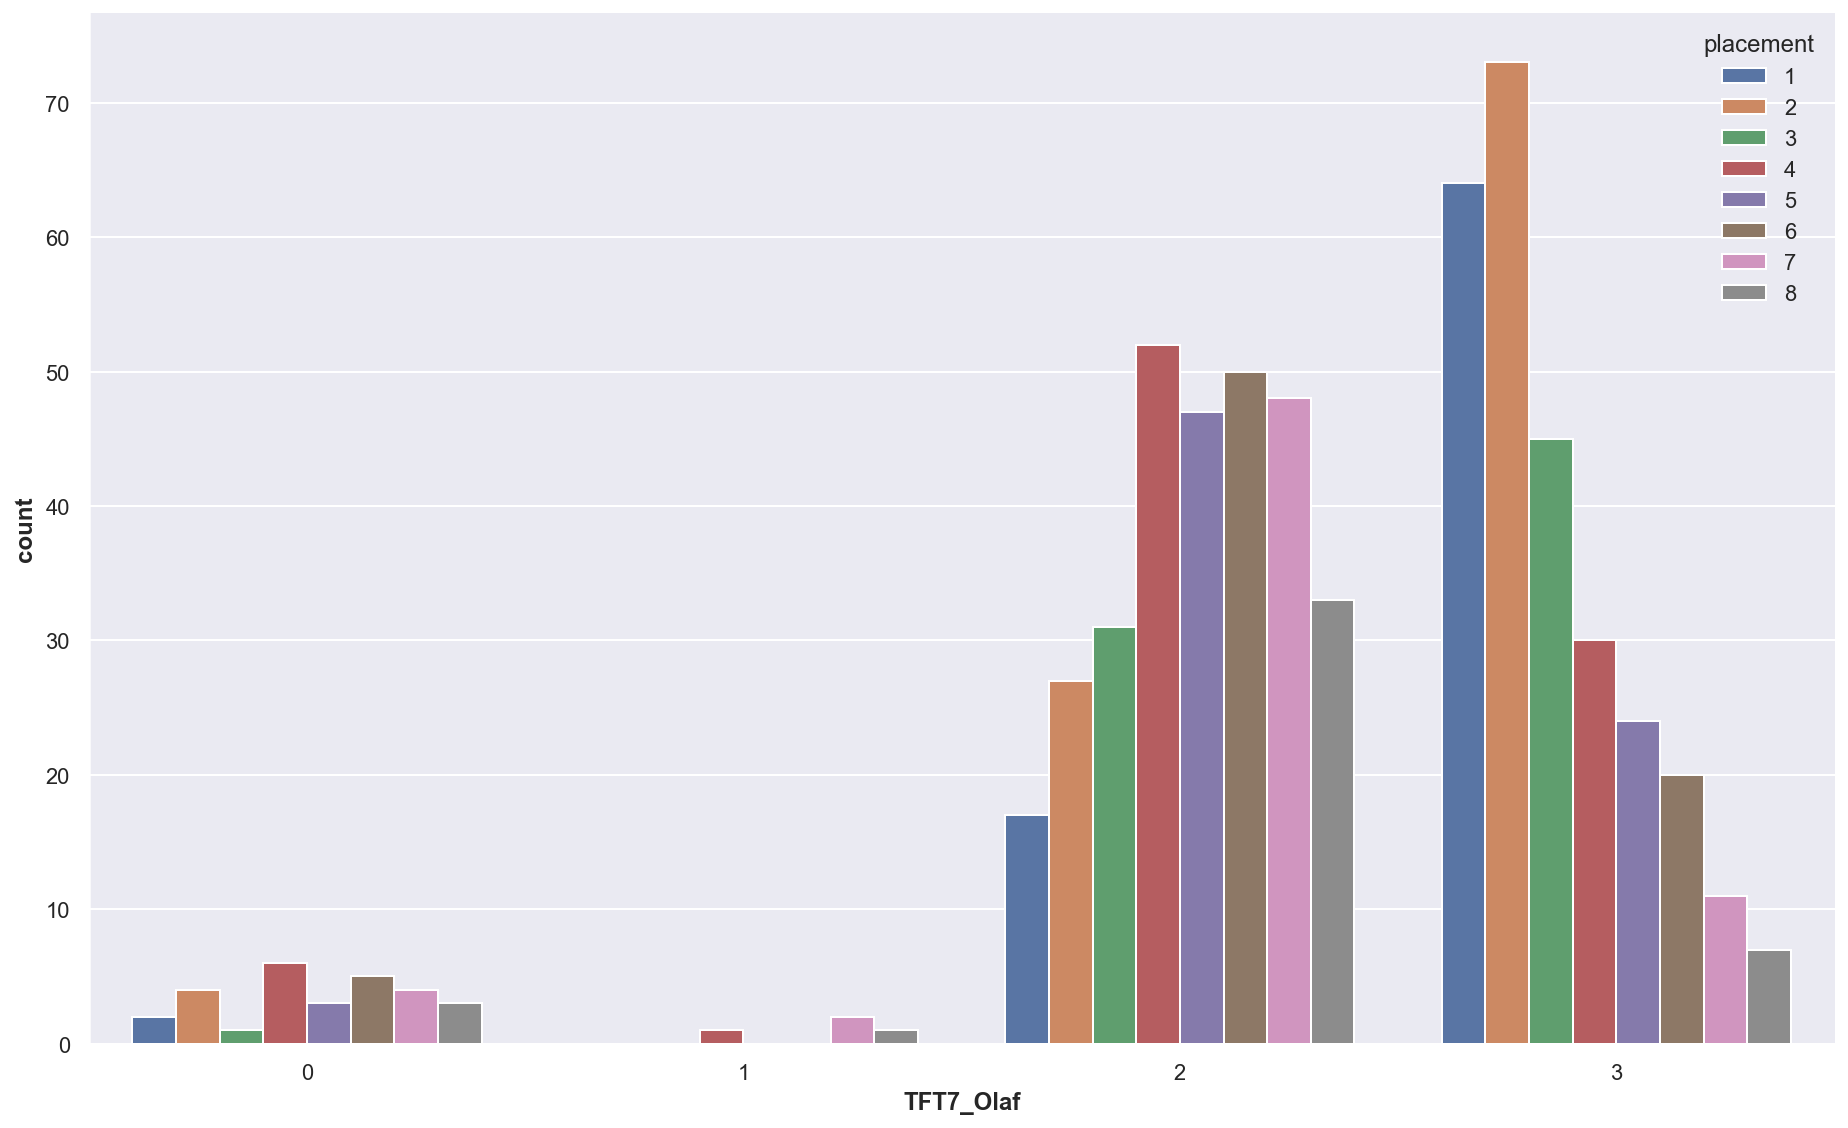

In [388]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Shen']>1) & (matches_df['TFT7_Diana']>1)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units Shen & Diana with Olaf.

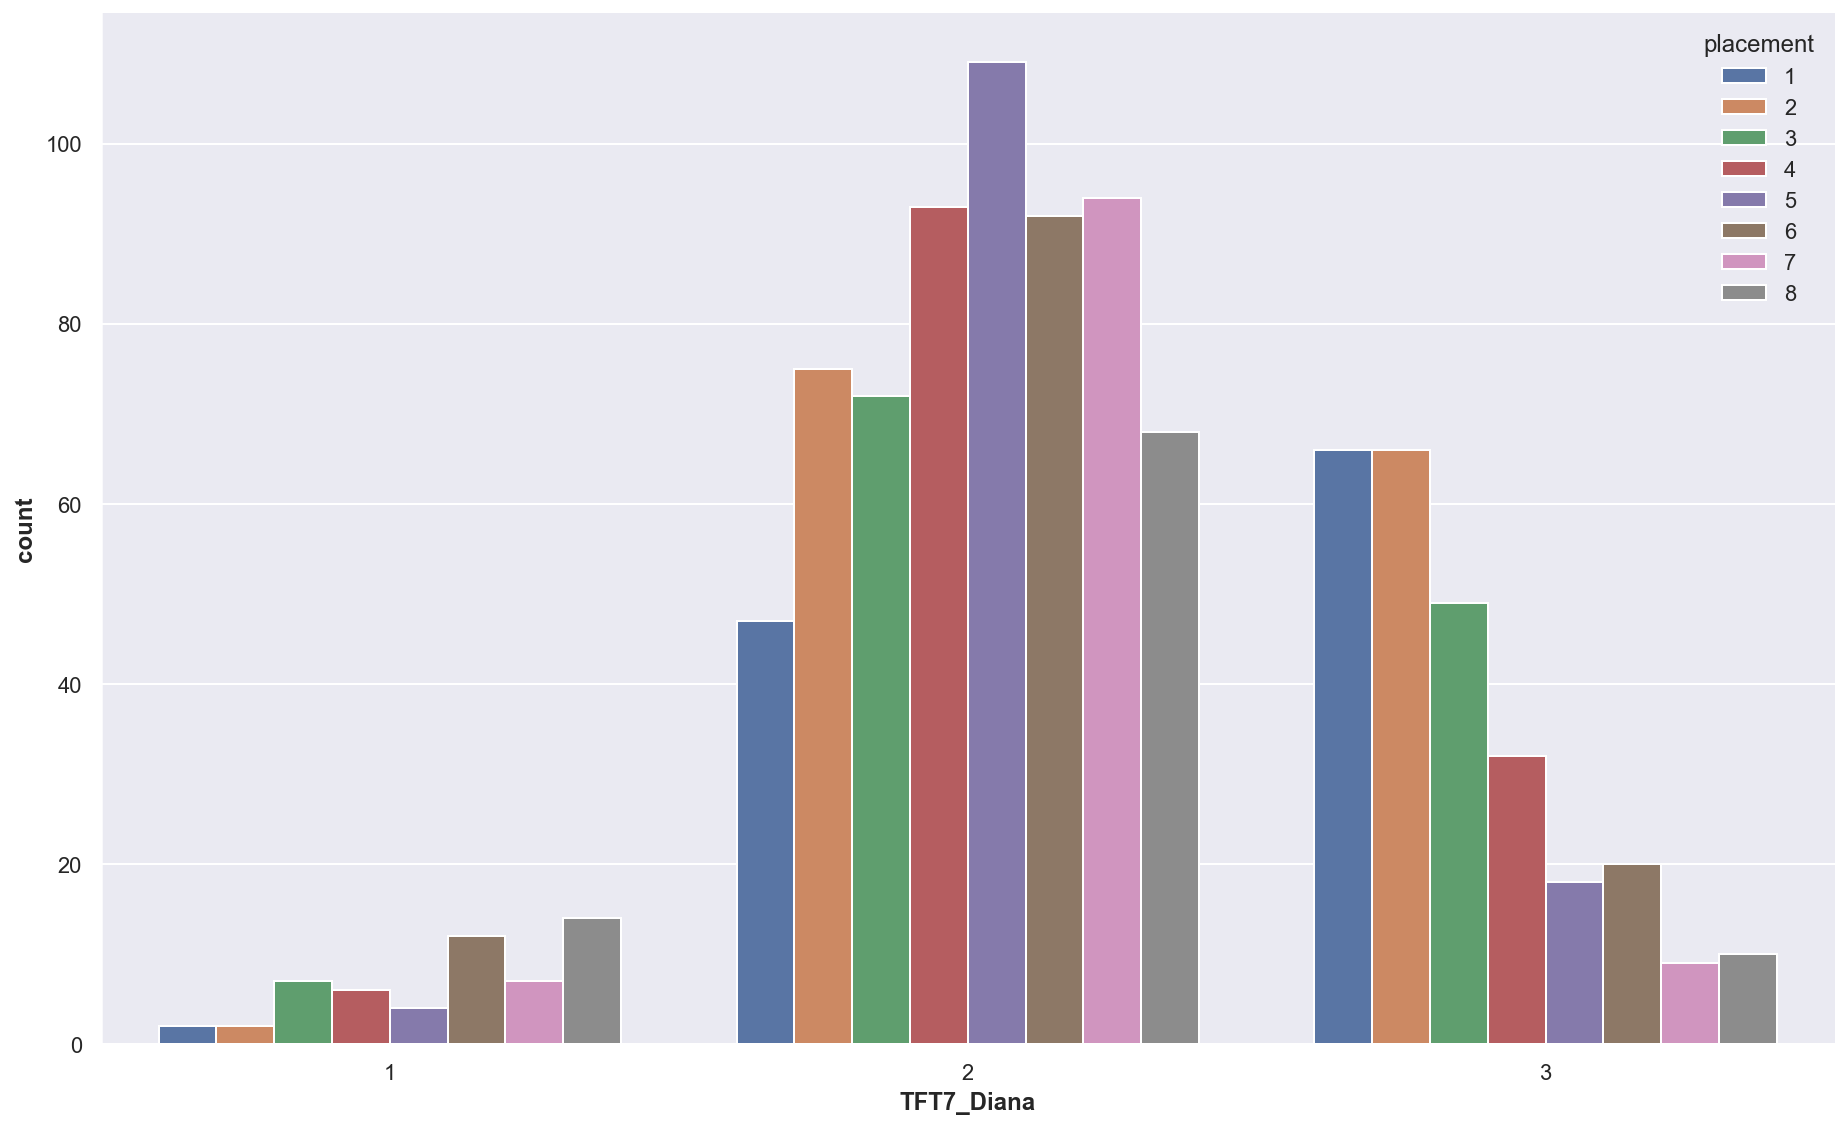

In [389]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Diana']>0], x='TFT7_Diana', hue=TARGETNAME)
sns.despine()

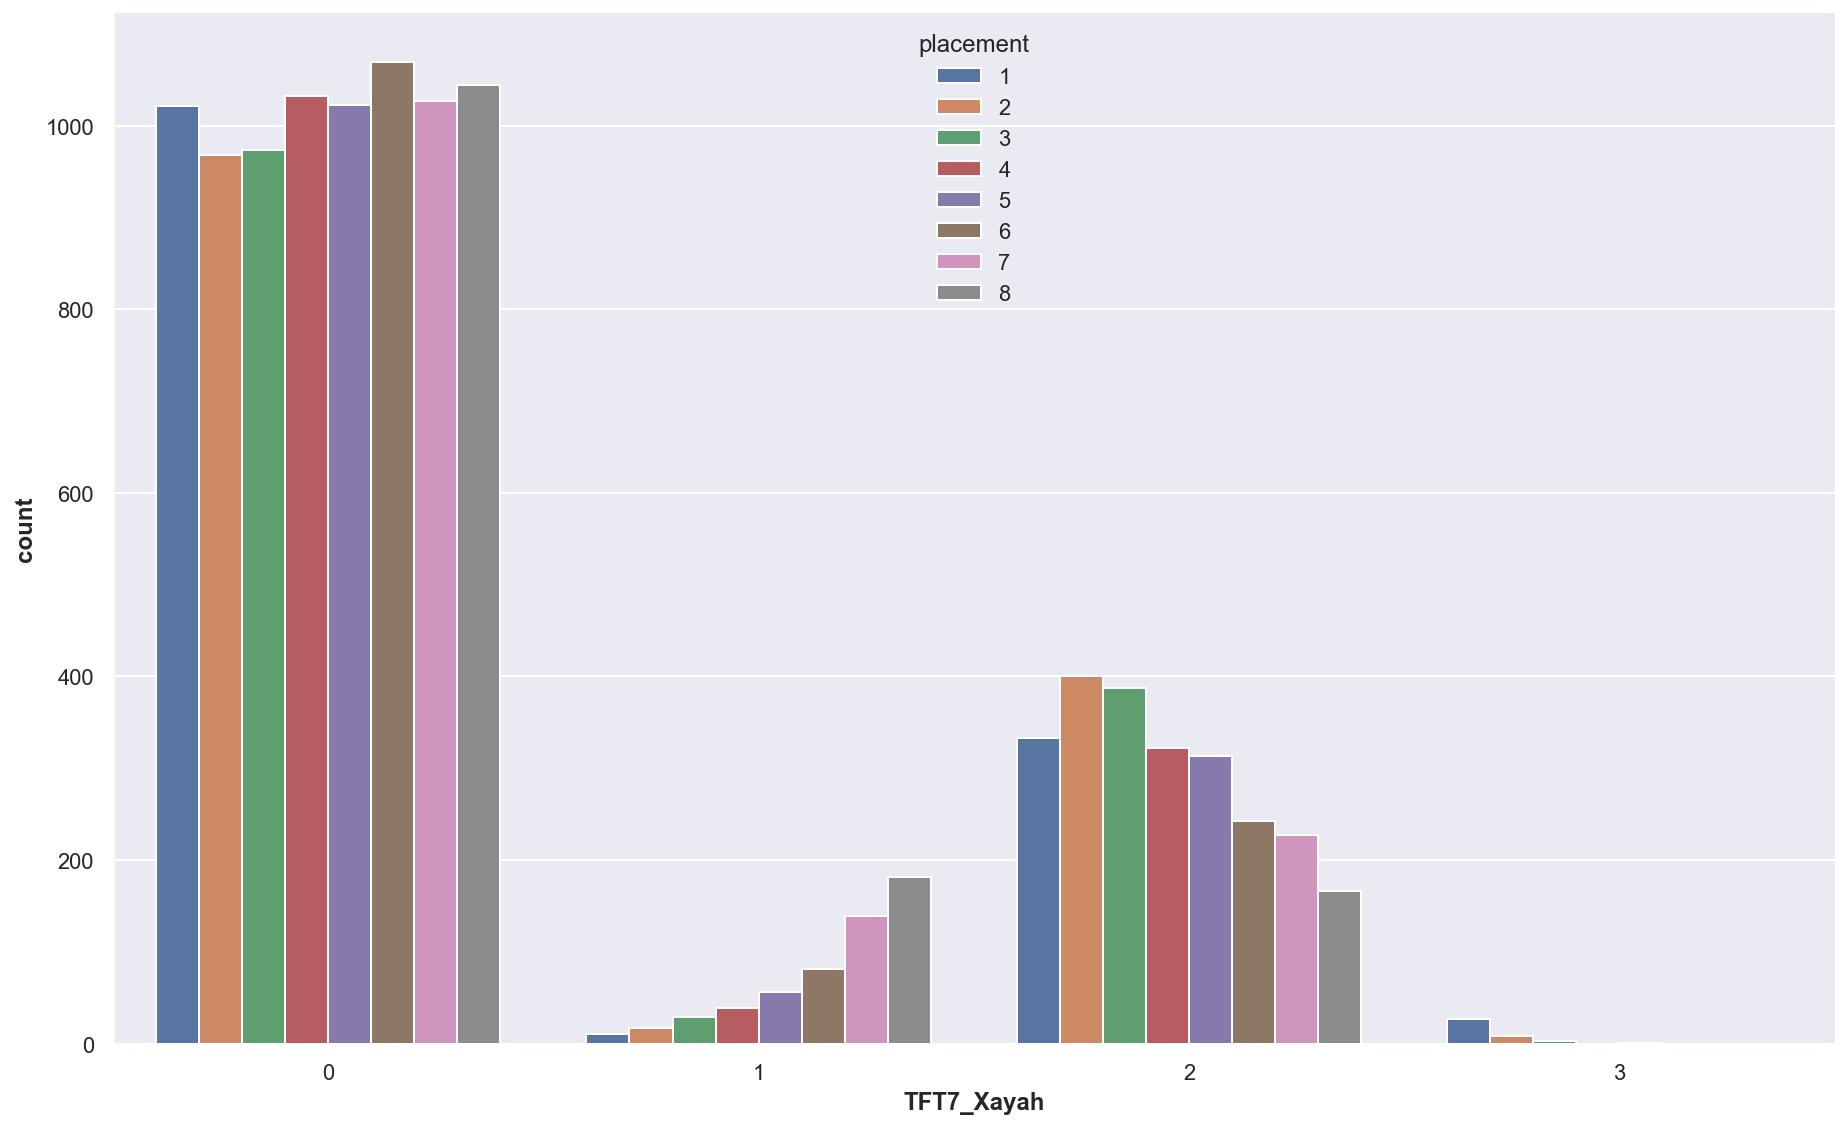

In [390]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Xayah']>=0], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

# Items

When TFT7_DragonGold (Idas) is holding item TFT7_Item_ShimmerscaleDiamondHands.

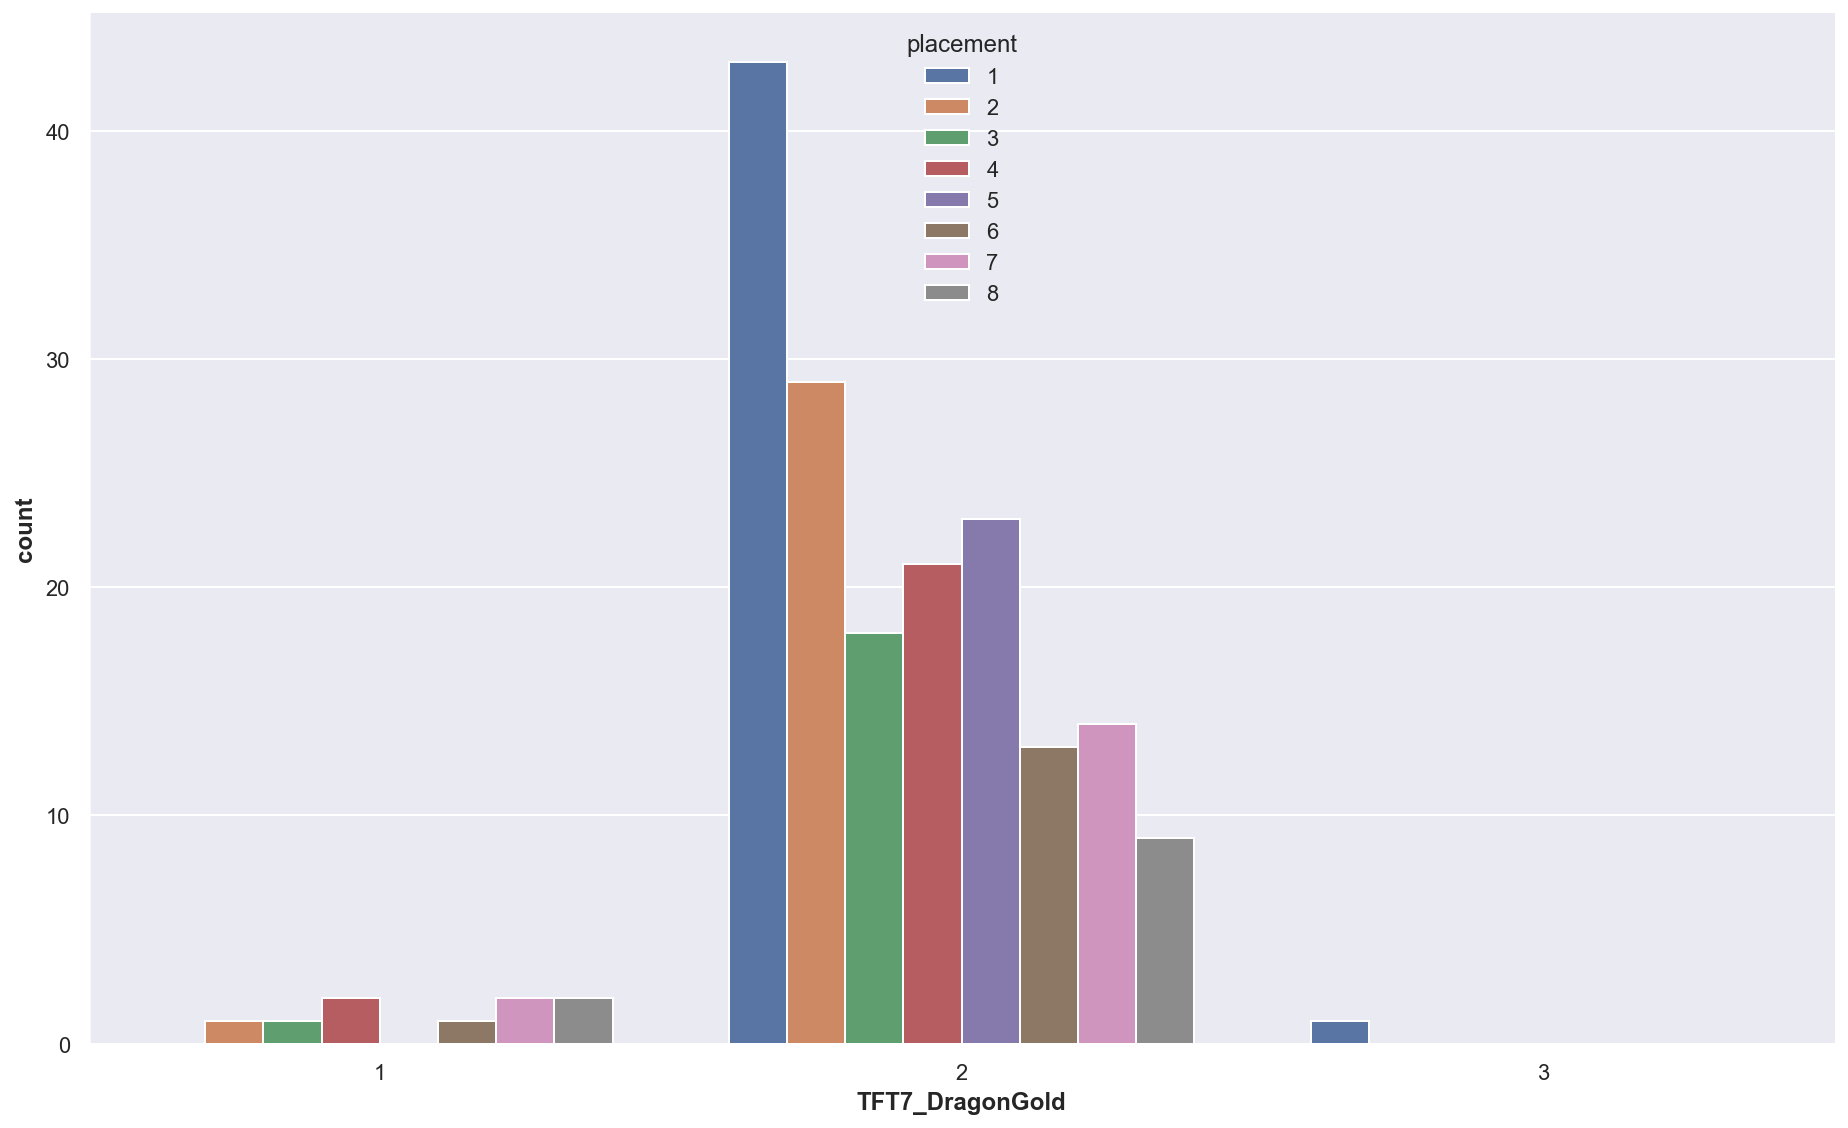

In [427]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']=='TFT7_Item_ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item1']=='TFT7_Item_ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item2']=='TFT7_Item_ShimmerscaleDiamondHands')], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

VS When TFT7_DragonGold (Idas) is **NOT** holding item TFT7_Item_ShimmerscaleDiamondHands.

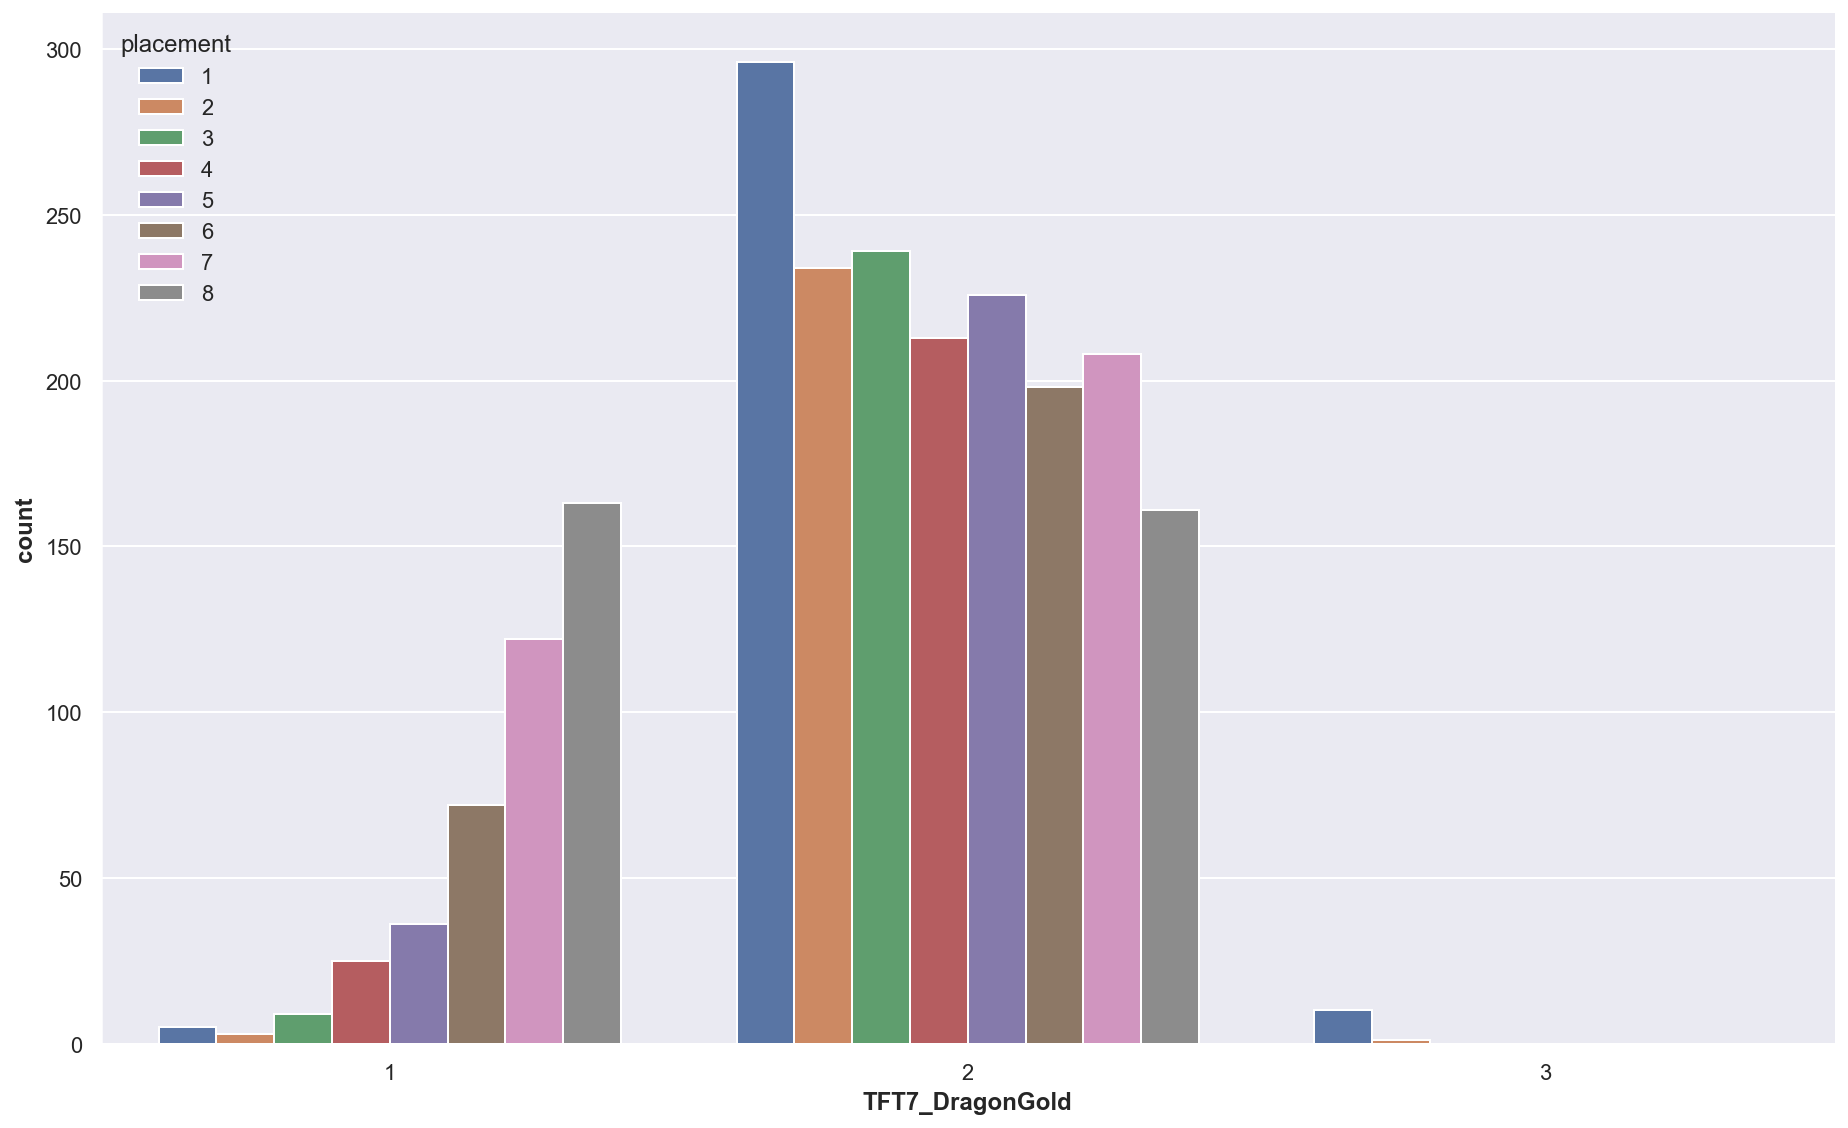

In [430]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item1']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item2']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold']>0)], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

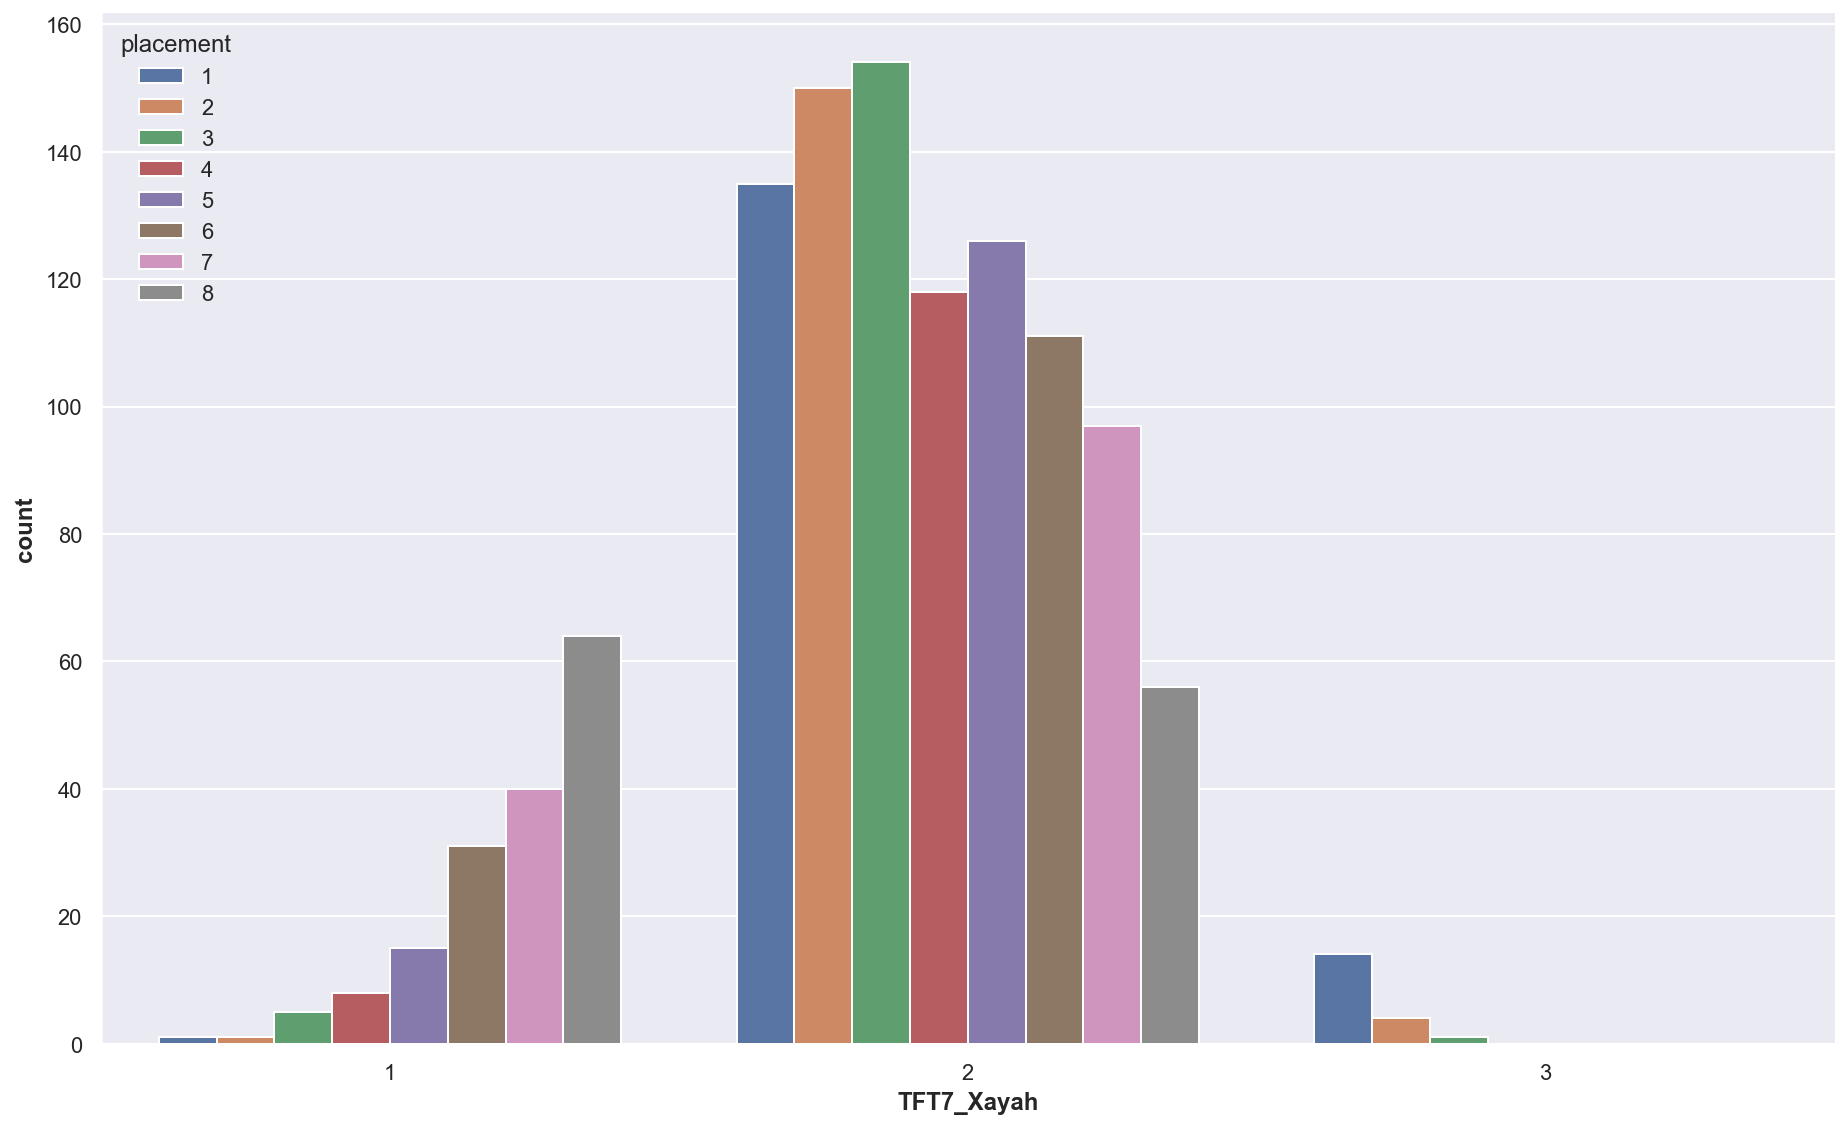

In [432]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']=='TFT_Item_Quicksilver') | (matches_df['TFT7_Xayah_item1']=='TFT_Item_Quicksilver') | (matches_df['TFT7_Xayah_item2']=='TFT_Item_Quicksilver')], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Without Quicksilver.

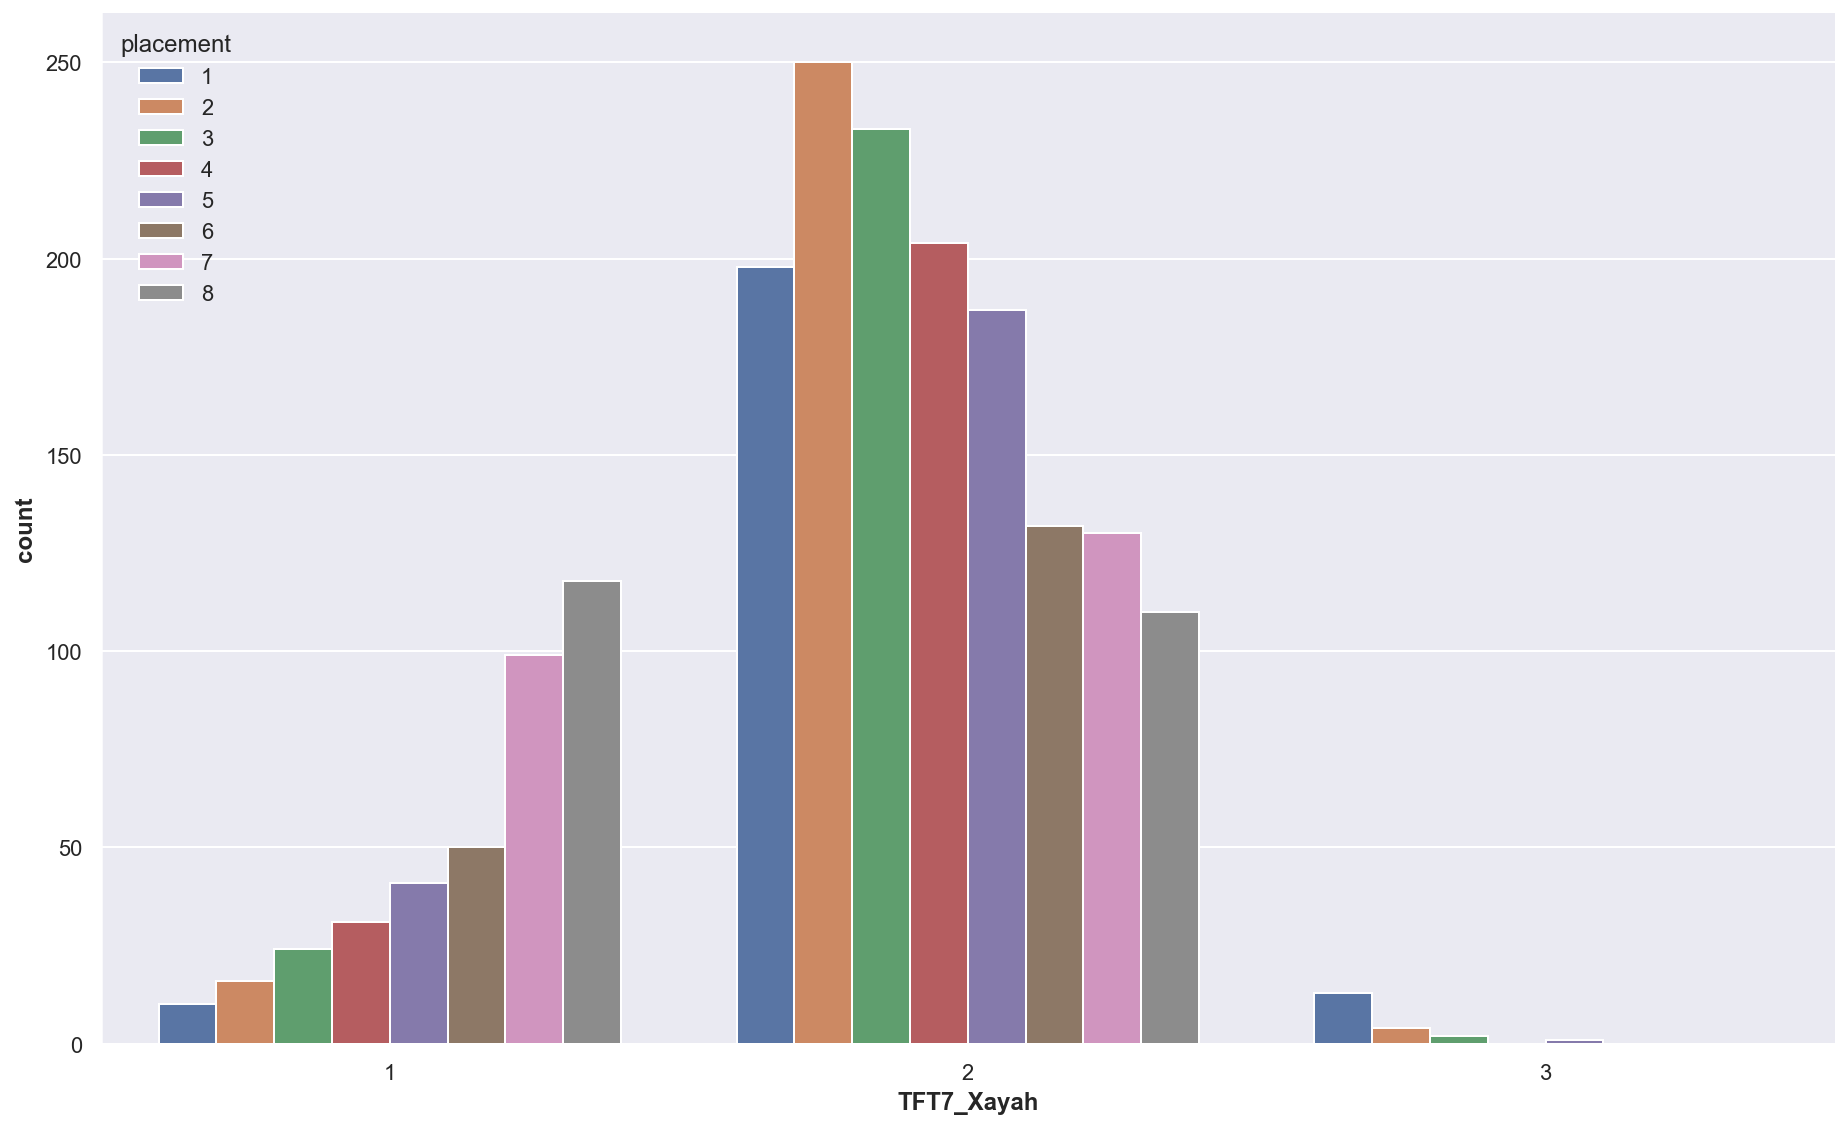

In [433]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah_item1']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah_item2']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah']>0)], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

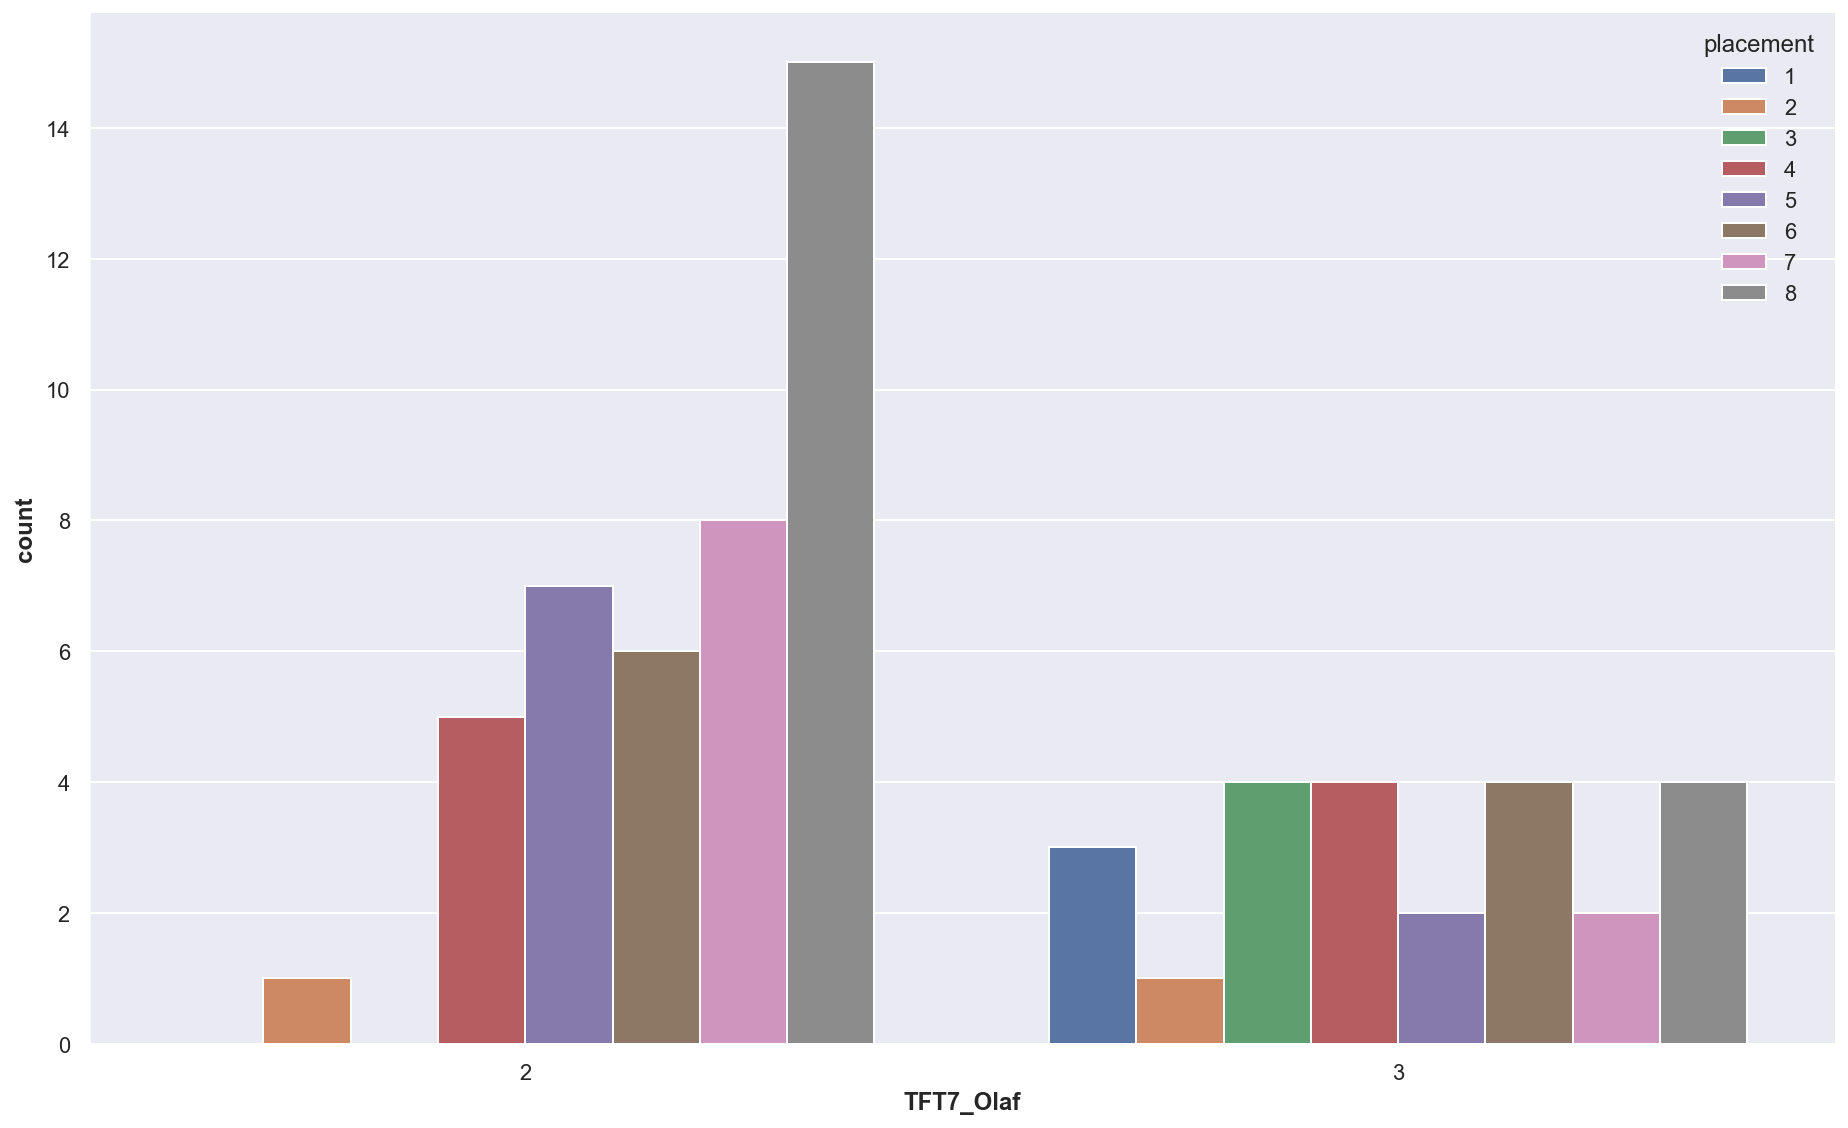

In [447]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']=='TFT_Item_GuinsoosRageblade') | (matches_df['TFT7_Olaf_item1']=='TFT_Item_GuinsoosRageblade') | (matches_df['TFT7_Olaf_item2']=='TFT_Item_GuinsoosRageblade')], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Without TFT_Item_GuinsoosRageblade

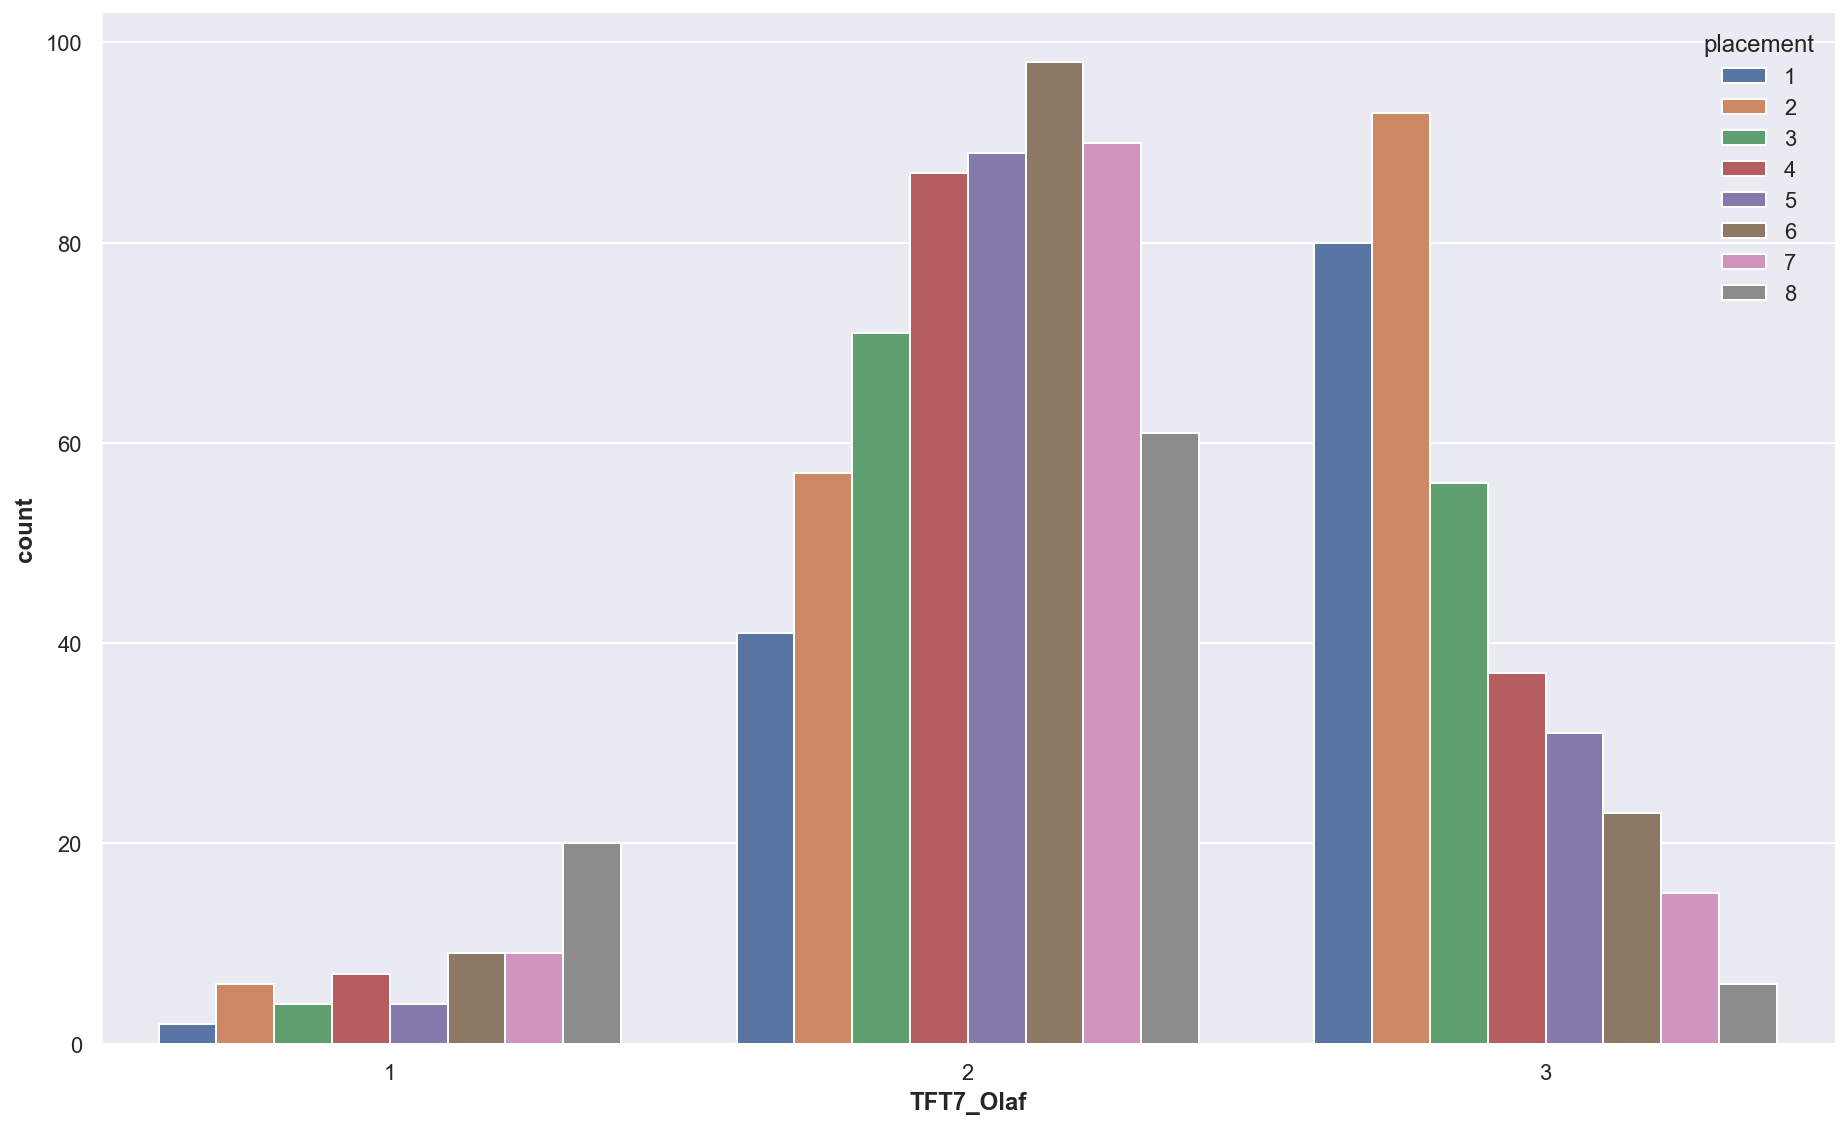

In [449]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']!='TFT_Item_GuinsoosRageblade') & (matches_df['TFT7_Olaf_item1']!='TFT_Item_GuinsoosRageblade') & (matches_df['TFT7_Olaf_item2']!='TFT_Item_GuinsoosRageblade')&(matches_df['TFT7_Olaf']>0)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

# Augment

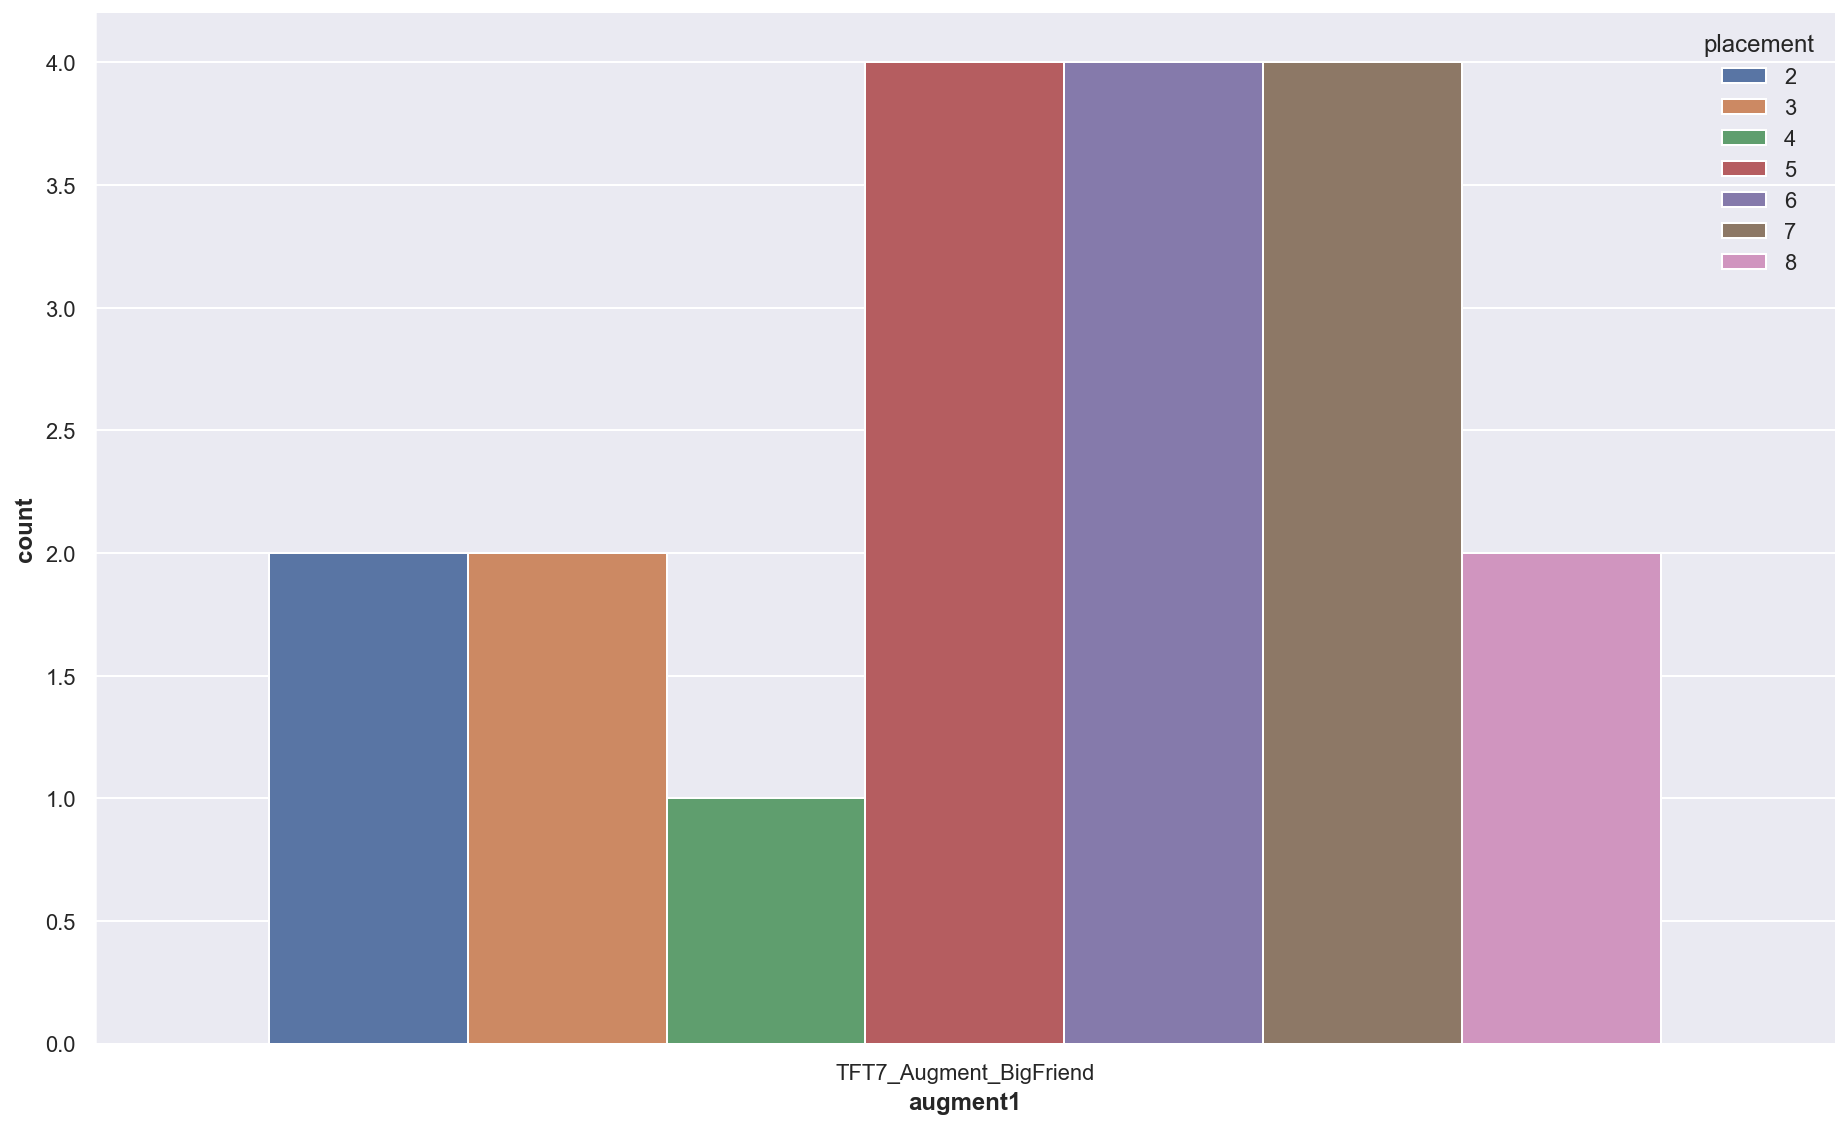

In [391]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment1']=='TFT7_Augment_BigFriend'], x='augment1', hue=TARGETNAME)
sns.despine()

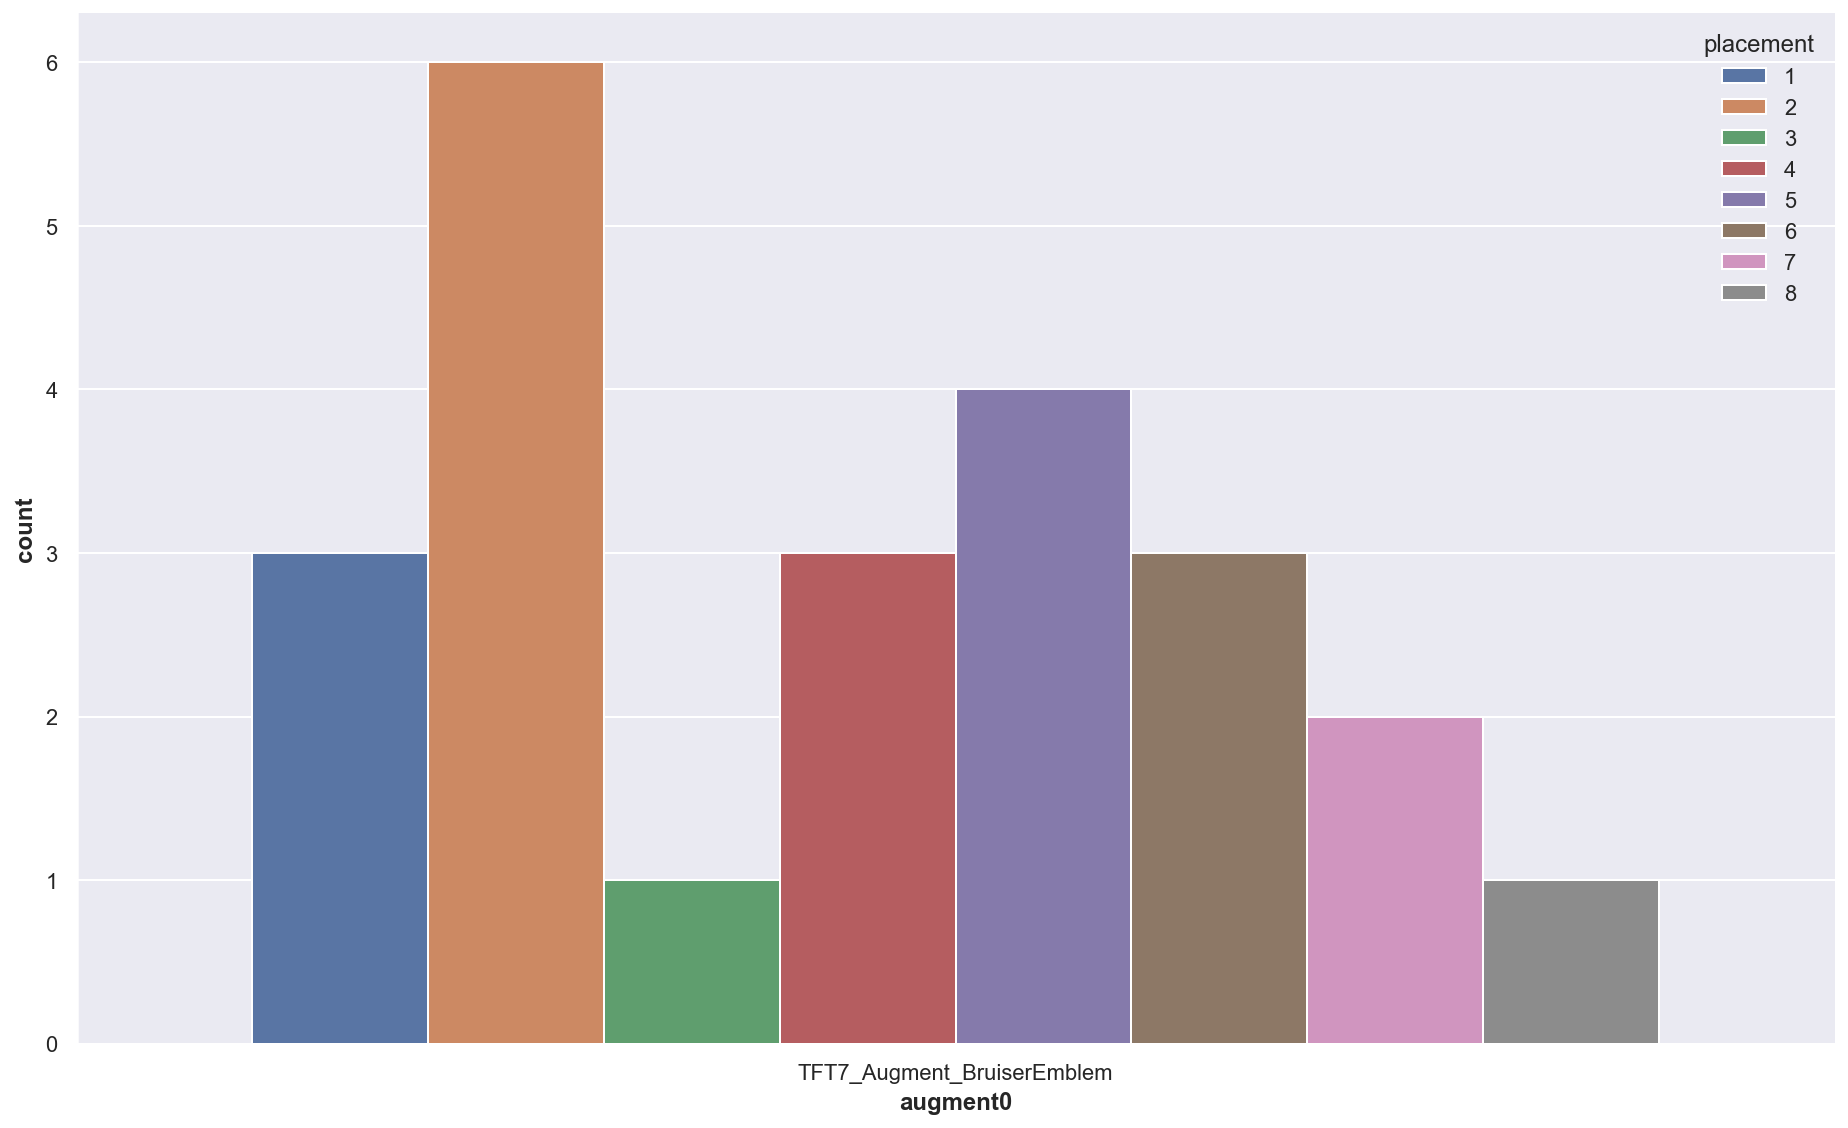

In [421]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserEmblem'], x='augment0', hue=TARGETNAME)
sns.despine()

Do not pick TFT6_Augment_WindfallPlusPlus.

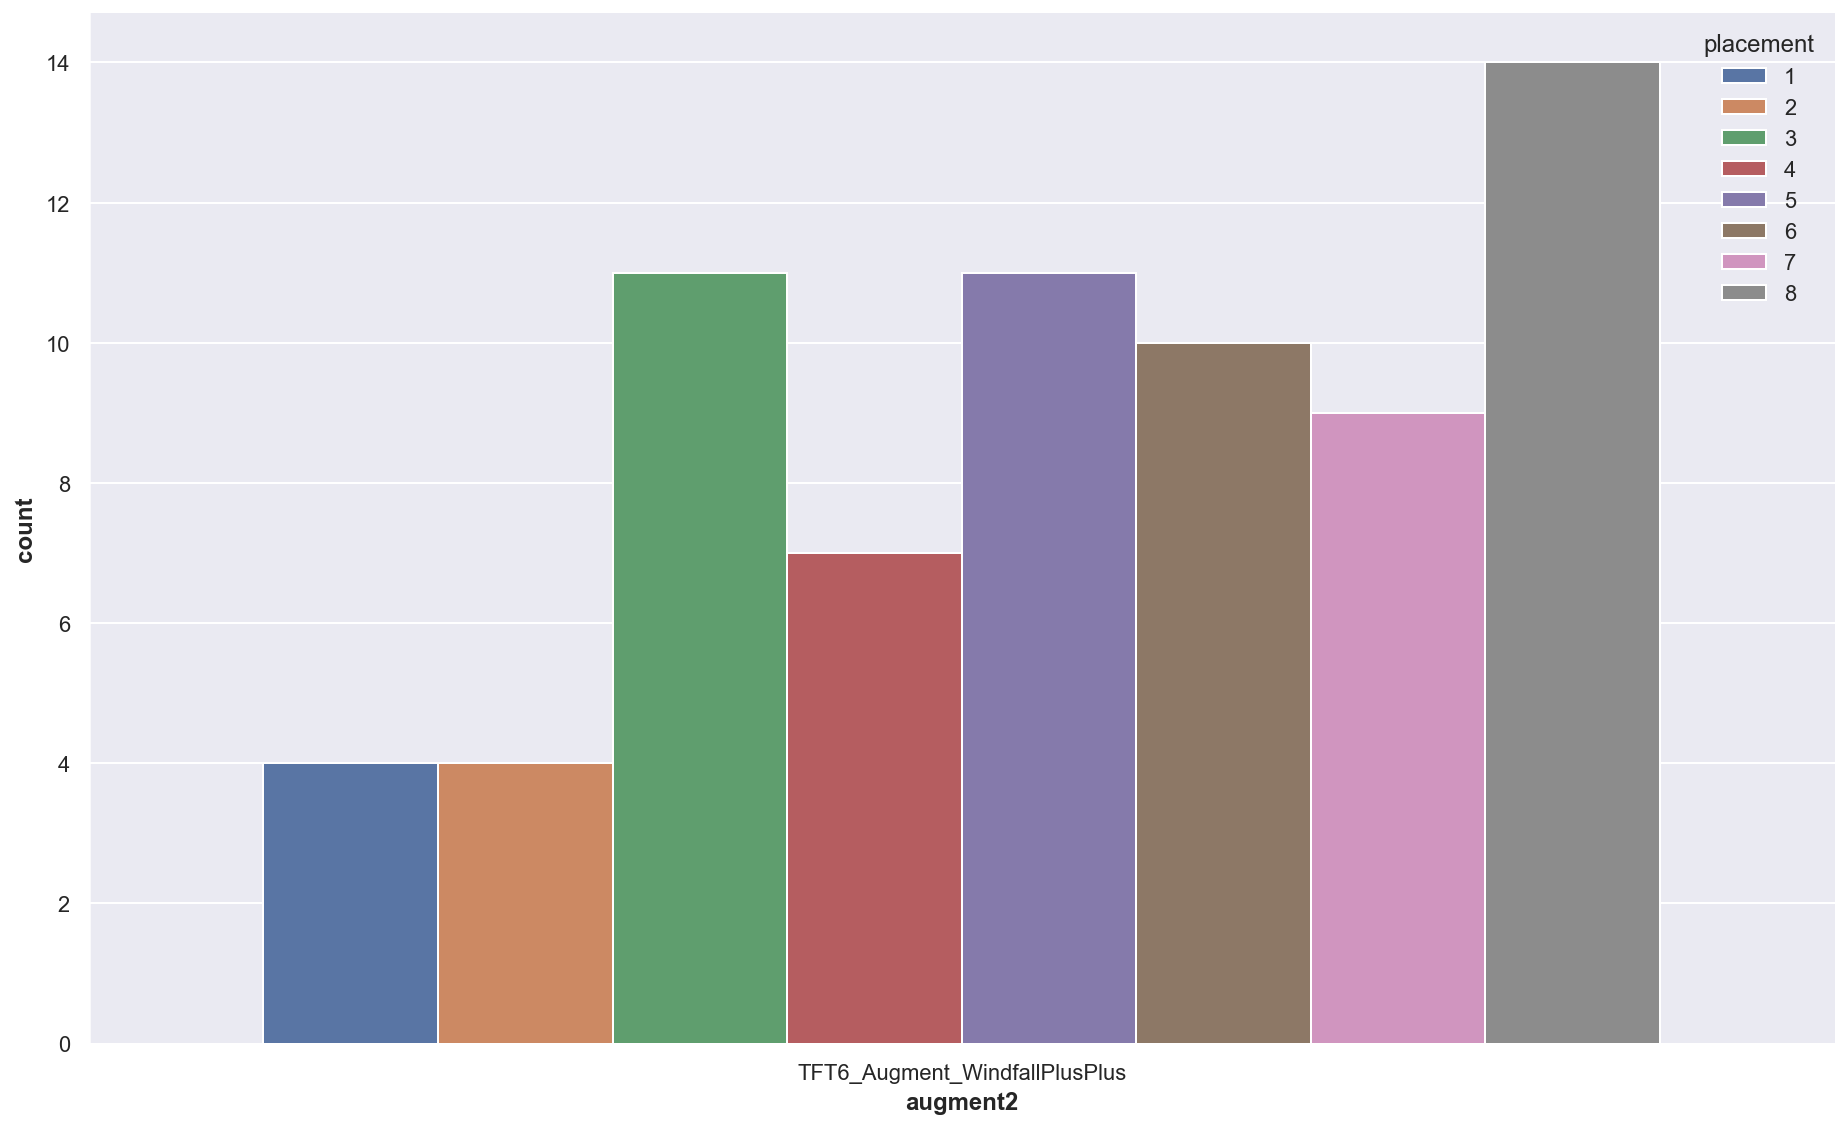

In [444]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_WindfallPlusPlus'], x='augment2', hue=TARGETNAME)
sns.despine()

Augment TFT6_Augment_CyberneticImplants2 is a good pick.

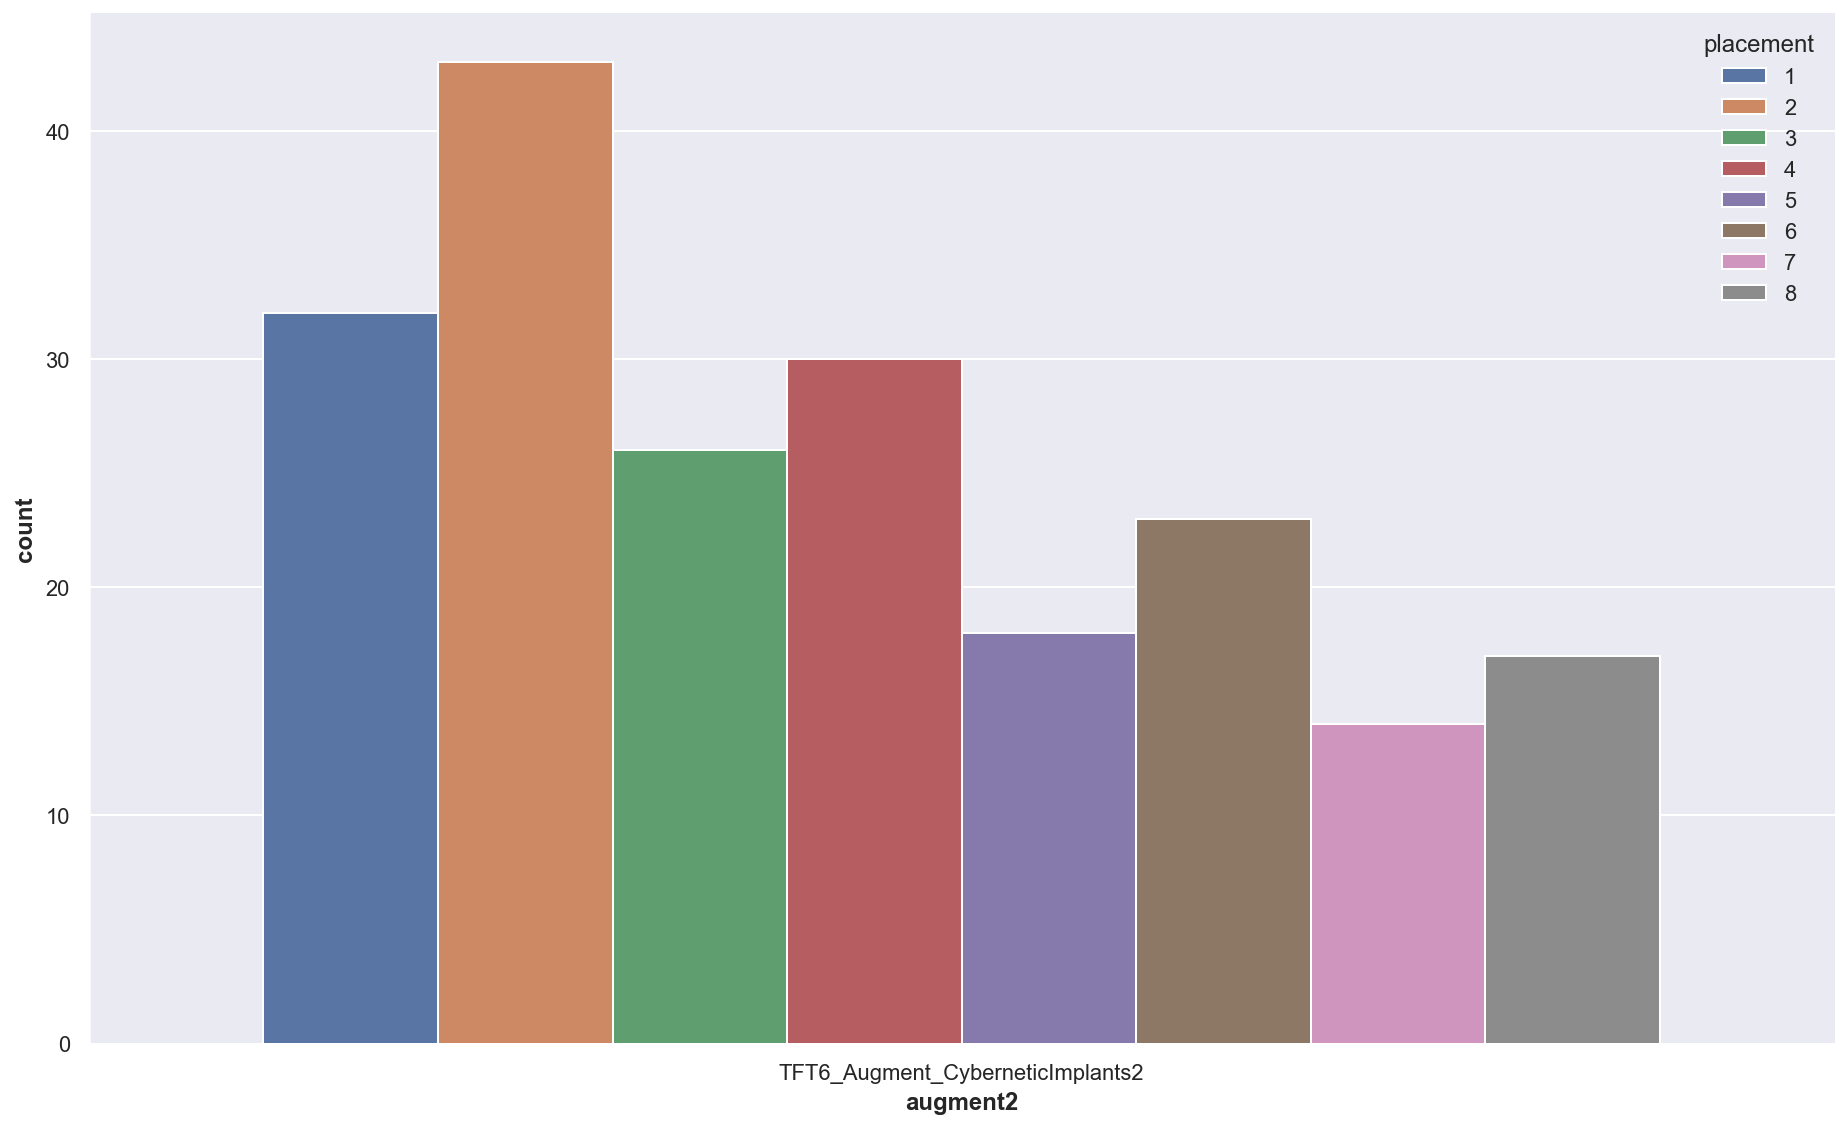

In [446]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_CyberneticImplants2'], x='augment2', hue=TARGETNAME)
sns.despine()

# Baseline Model

In [392]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, log_loss, confusion_matrix, roc_curve, precision_recall_curve
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

In [393]:
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='mae', 
                    n_estimators=250) #, use_label_encoder=False hist tree_method='hist', enable_categorical=True,

In [394]:
le_target = LabelEncoder()

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
augment_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
item_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
preproc = StandardScaler()

# Encode label.
# y = le_target.fit_transform(y)

In [395]:
# augment_oe.fit(X[categorical_cols[:3]])

In [396]:
# item_oe.fit(X[categorical_cols[3:]])

In [397]:
# Encode category columns.
logistic_regression_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("one_hot_time", one_hot_encoder, categorical_cols),
            # ("augment", augment_oe, categorical_cols[:3]),
            # ("item", item_oe, categorical_cols[3:]),
        ],
        remainder=preproc,
        verbose_feature_names_out=False,
    ),
    xgb,
)

In [398]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.85, random_state=42, stratify=match_id_df) # , stratify=match_id_df

logistic_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Nunu_item0',
                                                   'TFT7_LeeSin_item0',
                                                   'TFT7_LeeSin_item1',
                                                   'TFT7_LeeSin_item2',
                                                   'TFT7_Volibear_item0',
                                                   'TFT7_Volibear_item1',
                                                   'TFT7_Volibear_item2',
                                                   'TFT7_He...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=250, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [399]:
y_pred = logistic_regression_pipeline.predict(X_test)

In [400]:
def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis = 1 ),
        'precision': cm / cm.sum(axis = 0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout = True, figsize = (20,6))
    ax = ax.flatten()
#     mask = (np.eye(cm.shape[0]) == 0) * 1
    for idx, (name, matrix) in enumerate(metrics.items()):
        ax[idx].set_title(name)
        sns.heatmap(
            data = matrix,
            cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar = False,
#             mask=mask,
            lw = 0.25,
            annot = True,
            fmt = '.2f',
            ax = ax[idx]
        )
#         for tick in ax[idx].get_xticklabels():
#                 tick.set_rotation(60)
                
    sns.despine()
    
def plot_cm_error(cm):
    mask = (np.eye(cm.shape[0]) != 0) * 1
    fig, ax = plt.subplots(tight_layout=True, figsize=(15,8))
    sns.heatmap(
                data = pd.DataFrame(data=cm, index=le_target.classes_, columns = le_target.classes_),
#                 cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
                cbar = False,
                lw = 0.25,
                mask = mask,
                annot = True,
                fmt = '.0f',
                ax = ax
            )
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()

In [401]:
# create confusion matrix, calculate accuracy,recall & precision
# cm = pd.DataFrame(data = confusion_matrix(le_target.inverse_transform(y_test), y_pred, labels = le_target.classes_), index = le_target.classes_, columns = le_target.classes_)
# plot_cm(cm)

In [402]:
len(y_test)

1672

In [403]:
y_pred.shape

(1672,)

In [404]:
def plot_oof(y_true, y_predict):
    area = (30 * np.random.rand(len(y_predict)))**2 
    # Plot y_true vs. y_pred
    plt.figure(figsize=(10, 10))
    plt.scatter(y_true, y_predict, s=area, color='r', alpha=0.2)
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
    plt.gca().set_aspect('equal')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('OOF Predictions')
    plt.show()

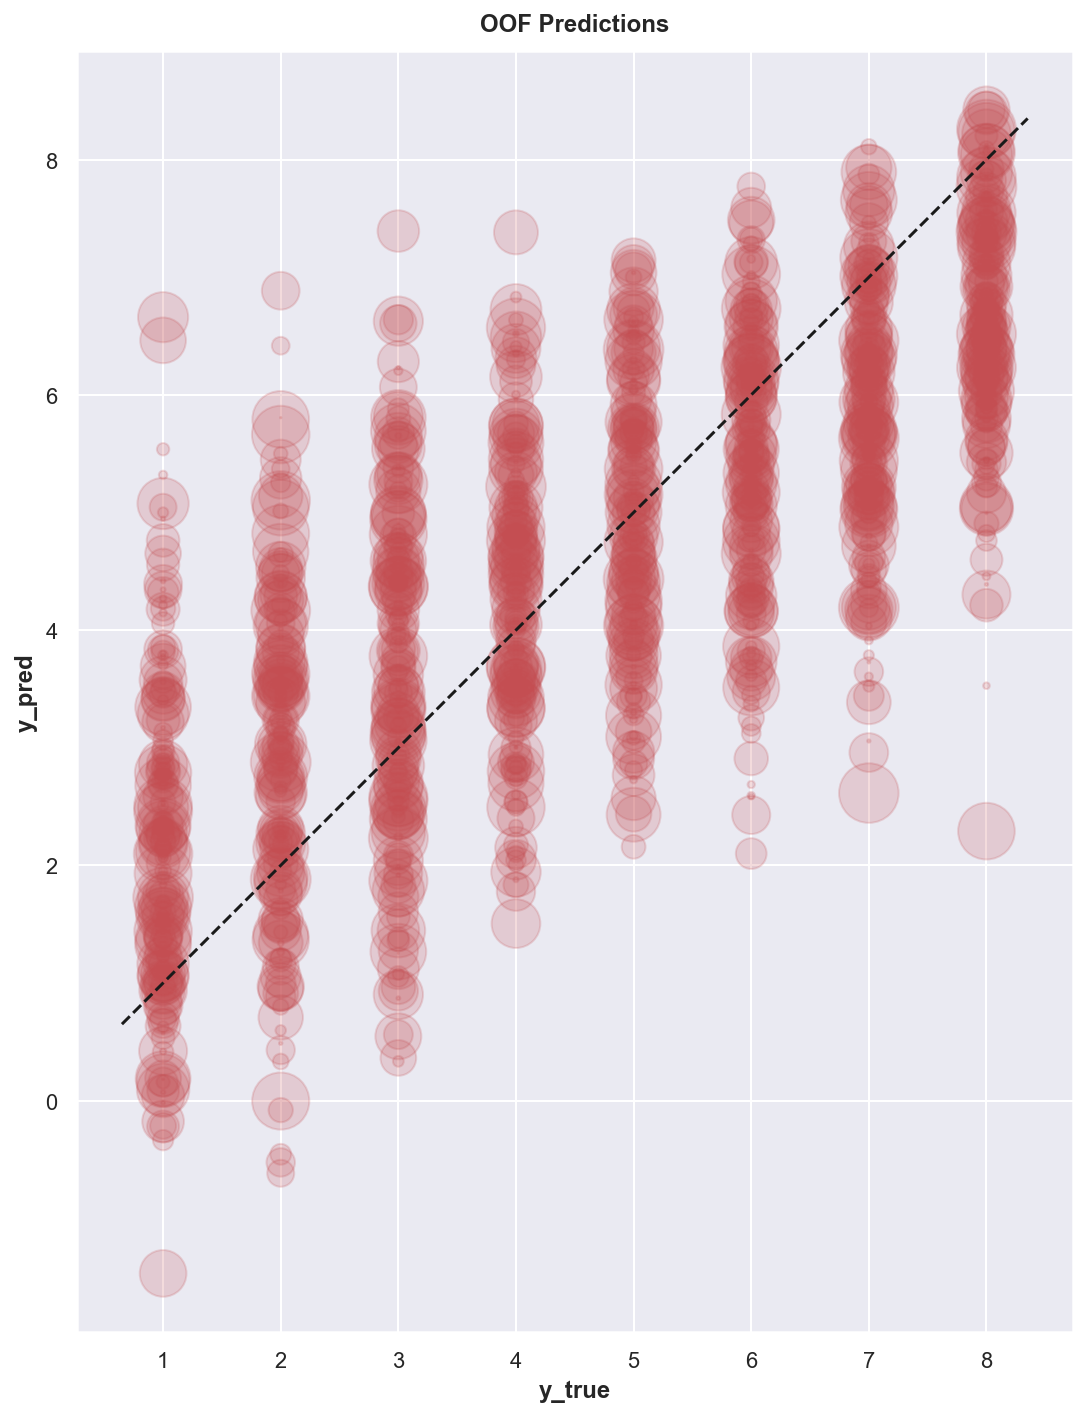

In [405]:
plot_oof(y_test, y_pred)

In [406]:
min(y_pred)

-1.4691254

In [407]:
mean_absolute_error(y_test, y_pred)

1.2174947

In [408]:
mean_squared_error(y_test, y_pred)

2.2952065

# mdi_importances

In [409]:
feature_names = logistic_regression_pipeline[:-1].get_feature_names_out()
mdi_importances = pd.Series(
    logistic_regression_pipeline[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

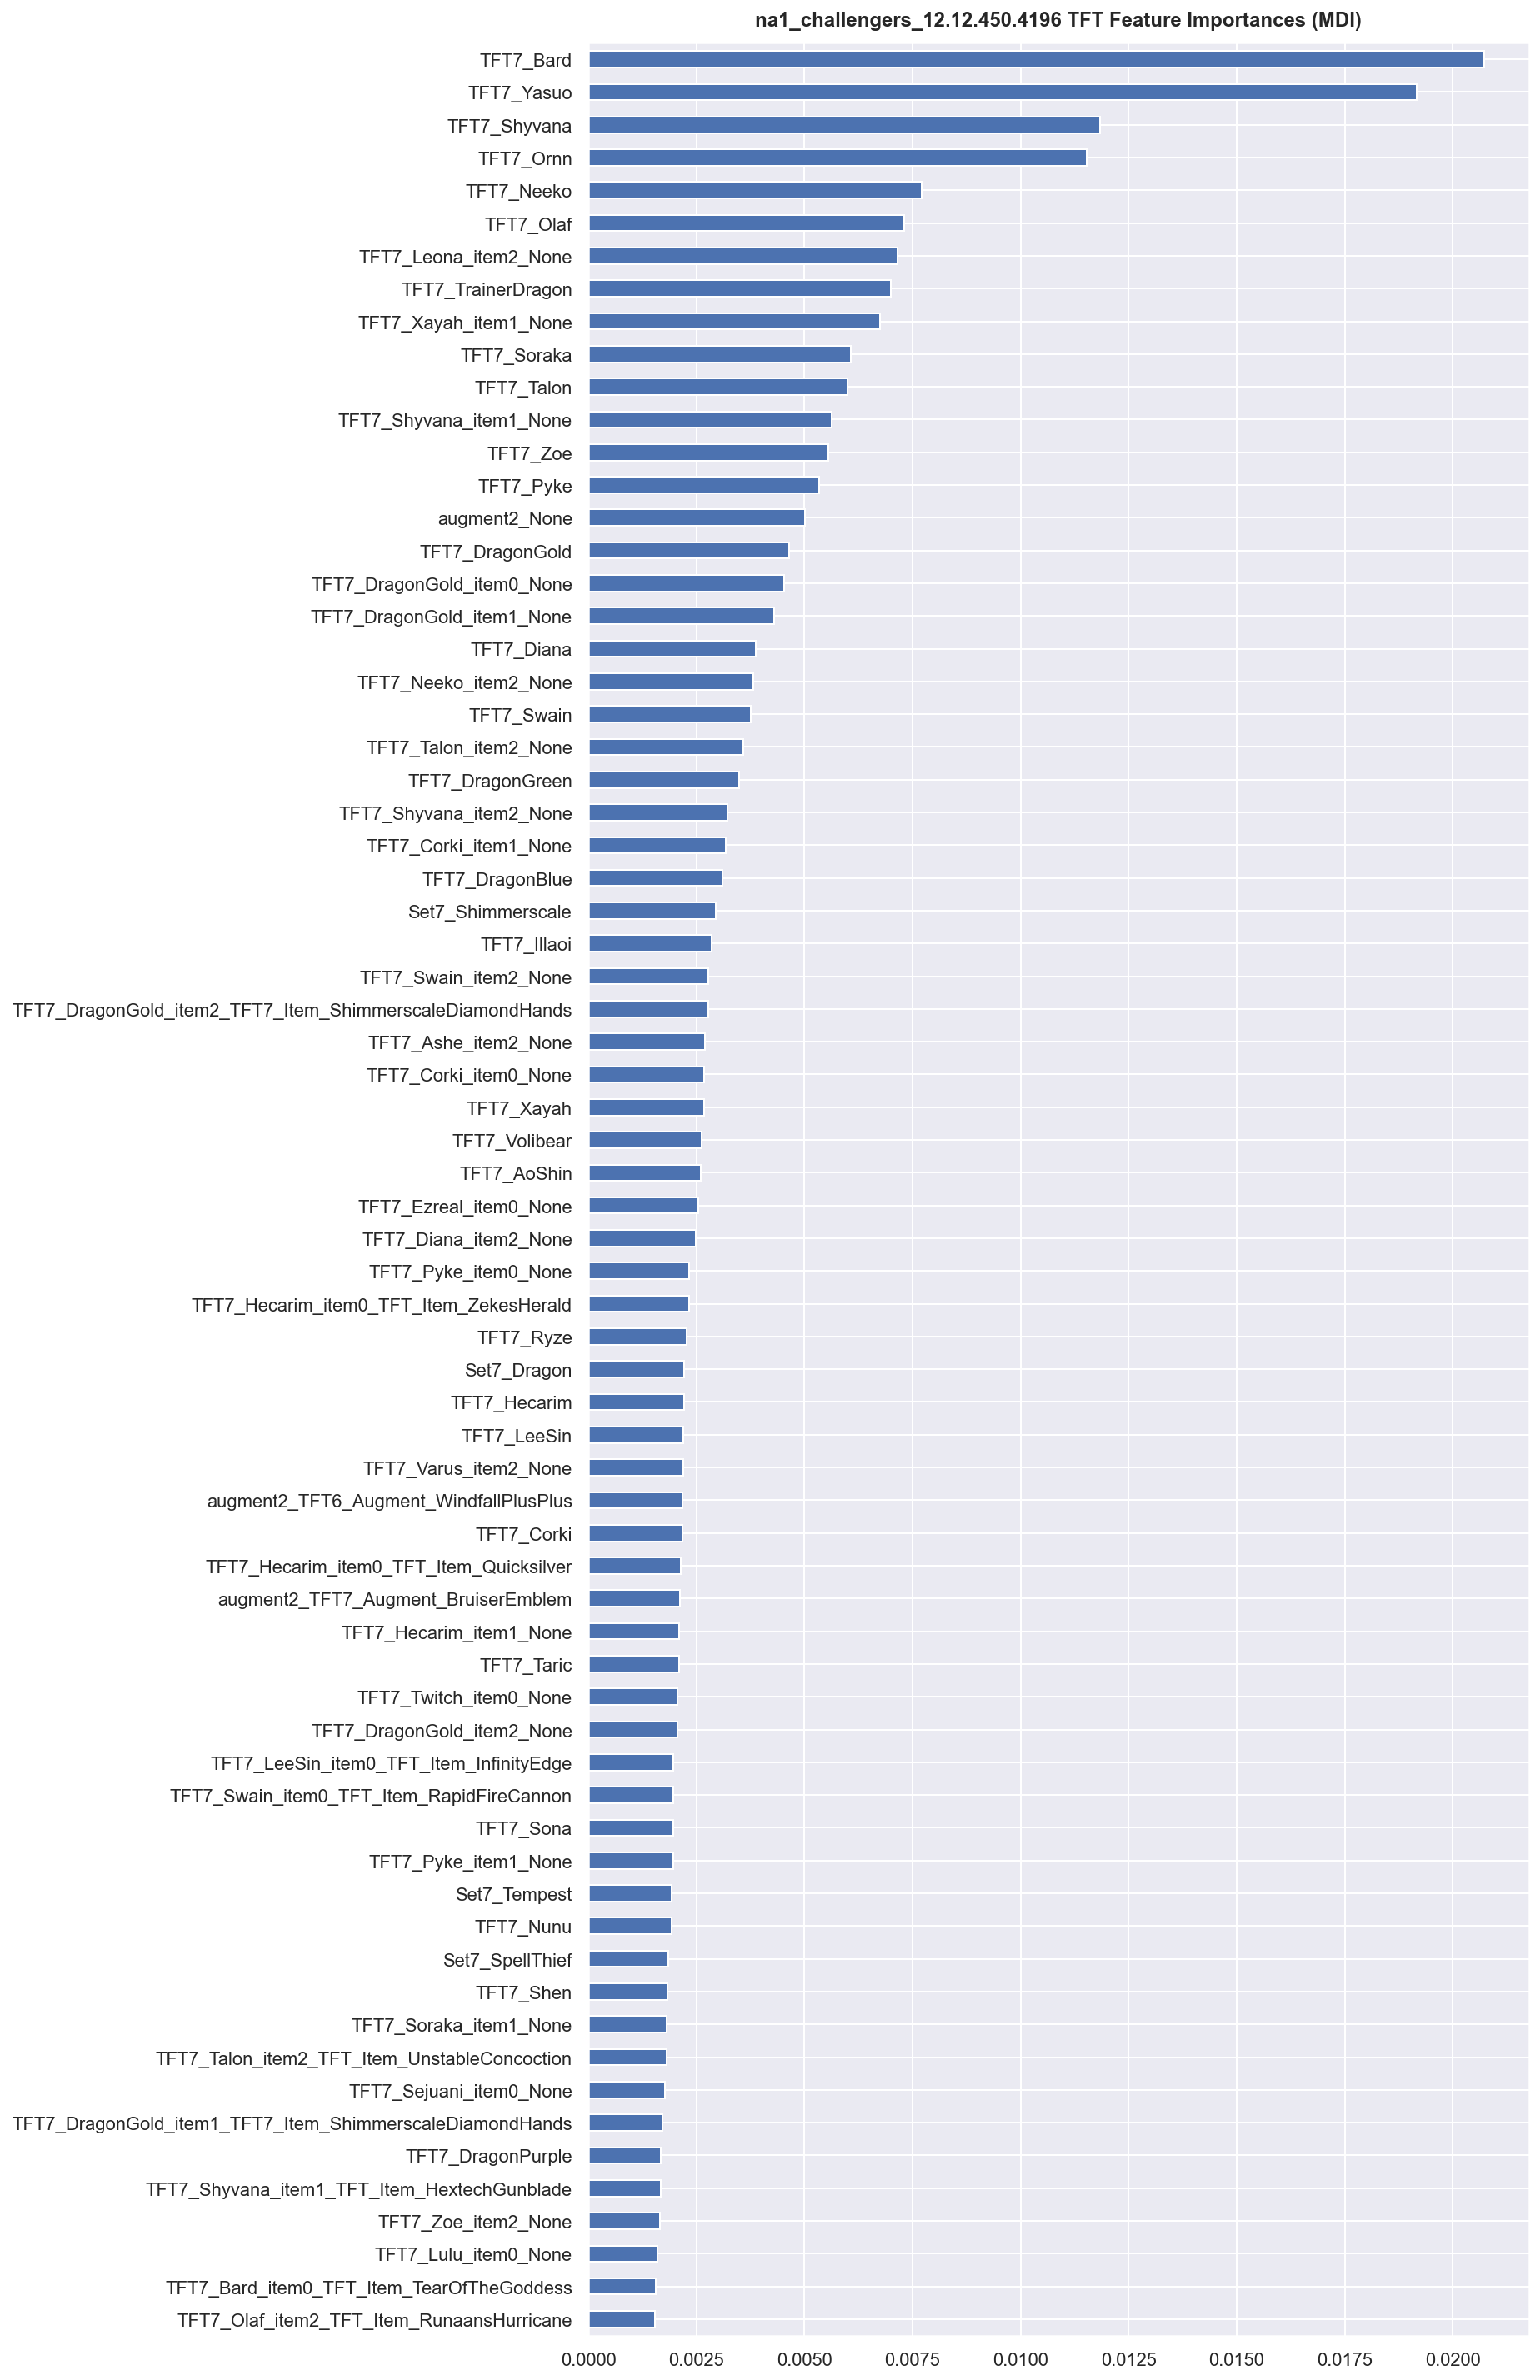

In [410]:
plt.figure(figsize=(13, 20))
ax = mdi_importances[-70:].plot.barh()
ax.set_title(f"{SERVER}_{LEAGUE}_{LATEST_RELEASE} TFT Feature Importances (MDI)")
ax.figure.tight_layout()

In [411]:
mdi_importances.to_csv(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_mdi_importances.csv'))

In [442]:
mdi_importances[-60:]

TFT7_Shen                                                   0.001825
Set7_SpellThief                                             0.001851
TFT7_Nunu                                                   0.001919
Set7_Tempest                                                0.001926
TFT7_Pyke_item1_None                                        0.001964
TFT7_Sona                                                   0.001967
TFT7_Swain_item0_TFT_Item_RapidFireCannon                   0.001971
TFT7_LeeSin_item0_TFT_Item_InfinityEdge                     0.001972
TFT7_DragonGold_item2_None                                  0.002057
TFT7_Twitch_item0_None                                      0.002070
TFT7_Taric                                                  0.002096
TFT7_Hecarim_item1_None                                     0.002105
augment2_TFT7_Augment_BruiserEmblem                         0.002127
TFT7_Hecarim_item0_TFT_Item_Quicksilver                     0.002141
TFT7_Corki                        